In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 수집할 url을 가져옵니다.
url = "https://finance.naver.com/api/sise/etfItemList.nhn?etfType=0&targetColumn=market_sum&sortOrder=desc&"
url

'https://finance.naver.com/api/sise/etfItemList.nhn?etfType=0&targetColumn=market_sum&sortOrder=desc&'

In [3]:
# requests 라이브러리를 통해 url을 받아옵니다.
response = requests.get(url)
response

<Response [200]>

In [4]:
response.json()

{'resultCode': 'success',
 'result': {'etfItemList': [{'itemcode': '069500',
    'etfTabCode': 1,
    'itemname': 'KODEX 200',
    'nowVal': 34480,
    'risefall': '5',
    'changeVal': -80,
    'changeRate': -0.23,
    'nav': 34537.0,
    'threeMonthEarnRate': 6.3728,
    'quant': 2148215,
    'amonut': 73863,
    'marketSum': 61012},
   {'itemcode': '357870',
    'etfTabCode': 6,
    'itemname': 'TIGER CD금리투자KIS(합성)',
    'nowVal': 52750,
    'risefall': '2',
    'changeVal': 5,
    'changeRate': 0.01,
    'nav': 52749.0,
    'threeMonthEarnRate': 0.899,
    'quant': 128801,
    'amonut': 6793,
    'marketSum': 51927},
   {'itemcode': '423160',
    'etfTabCode': 6,
    'itemname': 'KODEX KOFR금리액티브(합성)',
    'nowVal': 103745,
    'risefall': '2',
    'changeVal': 20,
    'changeRate': 0.02,
    'nav': 103745.0,
    'threeMonthEarnRate': 0.8998,
    'quant': 109787,
    'amonut': 11389,
    'marketSum': 34686},
   {'itemcode': '273130',
    'etfTabCode': 6,
    'itemname': 'KODEX 종합채권(

In [5]:
# requests 의 응답을 json 타입으로 받습니다.
etf_json = response.json()

### JSON 에서 원하는 데이터 찾기

In [21]:
# result > etfItemList 의 하위 구조로 목록을 찾고자 하는 데이터를 가져옵니다.
# etfItemList
etfItemList = etf_json["result"]["etfItemList"]
len(etfItemList)


694

In [23]:
# 키-값 형태의 데이터를 데이터프레임으로 만듭니다.
df = pd.DataFrame(etfItemList)
df.shape

(694, 12)

In [24]:
df.head()

itemcode  etfTabCode               itemname  nowVal risefall  changeVal  \
0   069500           1              KODEX 200   33865        2        120   
1   357870           6    TIGER CD금리투자KIS(합성)   52205        3          0   
2   423160           6    KODEX KOFR금리액티브(합성)  102685        2         20   
3   371460           4  TIGER 차이나전기차SOLACTIVE   11480        2        200   
4   273130           6   KODEX 종합채권(AA-이상)액티브  105960        5       -115   

   changeRate       nav  threeMonthEarnRate    quant  amonut  marketSum  
0        0.36   33915.0              6.2065  3163886  107297      61431  
1        0.00   52209.0              0.8597   987172   51535      47635  
2        0.02  102683.0              0.8298   335510   34451      34601  
3        1.77   11514.0             -6.6612  4647358   53037      29334  
4       -0.11  106011.0              2.1671    76308    8077      26248

In [29]:
# 날짜를 만들어 저장하기 위해 오늘 날짜를 구합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2023-04-14'

In [30]:
# eft_날짜_raw.csv 형태로 만듭니다.
file_name = f"etf_{today}_raw.csv"
file_name

'etf_2023-04-14_raw.csv'

In [33]:
# csv 형태로 저장합니다. index 가 저장되지 않도록 합니다.
df.to_csv(file_name, index = False)

In [36]:
# 저장된 csv파일을 확인합니다.
pd.read_csv(file_name,dtype={"itemcode": np.object} )

C:\Users\Vector\AppData\Local\Temp\ipykernel_35340\1126114920.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pd.read_csv(file_name,dtype={"itemcode": np.object} )


itemcode  etfTabCode               itemname  nowVal  risefall  changeVal  \
0     069500           1              KODEX 200   33865         2        120   
1     357870           6    TIGER CD금리투자KIS(합성)   52205         3          0   
2     423160           6    KODEX KOFR금리액티브(합성)  102685         2         20   
3     371460           4  TIGER 차이나전기차SOLACTIVE   11480         2        200   
4     273130           6   KODEX 종합채권(AA-이상)액티브  105960         5       -115   
..       ...         ...                    ...     ...       ...        ...   
689   433850           7     ARIRANG TDF2030액티브   10390         2         50   
690   433870           7     ARIRANG TDF2050액티브   10480         2         20   
691   287330           2        KBSTAR 200생활소비재    6560         2         50   
692   315480           2    KBSTAR 200커뮤니케이션서비스   11865         2        160   
693   287320           2          KBSTAR 200산업재   12225         2        120   

     changeRate       nav  threeMonthEarnRate    quant  amonut  marketSum  
0          0.36   33915.0              6.2065  3163886  107297      61431  
1          0.00   52209.0              0.8597   987172   51535      47635  
2          0.02  102683.0              0.8298   335510   34451      34601  
3          1.77   11514.0             -6.6612  4647358   53037      29334  
4         -0.11  106011.0              2.1671    76308    8077      26248  
..          ...       ...                 ...      ...     ...        ...  
689        0.48   10595.0              2.3762      831       8         21  
690        0.19   10594.0              4.8096      307       3         19  
691        0.77    6563.0             -5.1712   113624     747         14  
692        1.37   11897.0              0.2999      162       1         14  
693        0.99   12227.0              7.0291      204       2         12  

[694 rows x 12 columns]

In [3]:
df = pd.read_csv(file_name,dtype={"itemcode":np.object})
df.shape

C:\Users\Vector\AppData\Local\Temp\ipykernel_28436\648968902.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = pd.read_csv(file_name,dtype={"itemcode":np.object})


(694, 12)

In [6]:
# info를 통해서 각 column들의 데이터타입과 결측치, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   itemcode            694 non-null    object 
 1   etfTabCode          694 non-null    int64  
 2   itemname            694 non-null    object 
 3   nowVal              694 non-null    int64  
 4   risefall            694 non-null    int64  
 5   changeVal           694 non-null    int64  
 6   changeRate          694 non-null    float64
 7   nav                 694 non-null    float64
 8   threeMonthEarnRate  668 non-null    float64
 9   quant               694 non-null    int64  
 10  amonut              694 non-null    int64  
 11  marketSum           694 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 65.2+ KB


In [7]:
# 거래량(quant) 기준으로 내림차순으로 정렬하여 상위 10개의 데이터를 봅니다.
df.sort_values("quant", ascending=False).head(10)

itemcode  etfTabCode               itemname  nowVal  risefall  changeVal  \
6    252670           3       KODEX 200선물인버스2X    2615         5        -15   
26   251340           3      KODEX 코스닥150선물인버스    3880         5        -55   
9    122630           3             KODEX 레버리지   16525         2        135   
25   114800           3              KODEX 인버스    4555         5        -20   
24   233740           3       KODEX 코스닥150레버리지   12070         2        355   
54   371160           4          TIGER 차이나항셍테크    5945         5         -5   
3    371460           4  TIGER 차이나전기차SOLACTIVE   11480         2        200   
17   214980           6         KODEX 단기채권PLUS  106355         2         20   
36   196230           6           KBSTAR 단기통안채  107510         3          0   
19   305540           2           TIGER 2차전지테마   31900         2        965   

    changeRate       nav  threeMonthEarnRate      quant  amonut  marketSum  
6        -0.57    2615.0            -11.5967  108251775  281901      21736  
26       -1.40    3897.0            -26.8588   45746977  177699       8552  
9         0.82   16621.0             10.7058   21480654  355905      20020  
25       -0.44    4562.0             -5.1814   16105469   73308       8741  
24        3.03   12121.0             79.2654   15129717  182420       9185  
54       -0.08    5951.0             -4.4177    5875043   34828       3924  
3         1.77   11514.0             -6.6612    4647358   53037      29334  
17        0.02  106359.0              1.0260    4236305  450573      12366  
36        0.00  107527.0              0.9294    3731372  401212       5481  
19        3.12   31847.0             69.7859    3244042  102106      12250

In [8]:
# etfTabCode는 해당 사이트에서 
# 전체(0), 국내 시장지수(1), 국내 업종/테마(2), 국내 파생(3) ~
# 해외 주식(4), 원자재(5), 채권(6), 기타(7)로 자료가 구분되어 있습니다.
df["etfTabCode"].value_counts().sort_index()

1     71
2    219
3     37
4    184
5     18
6     96
7     69
Name: etfTabCode, dtype: int64

In [9]:
# pandas 의 boolean Indexing을 사용해서
# 국내 시장지수(etfTabCode == 1)의 데이터들만 확인하여 봅니다.
df[df["etfTabCode"] == 1]

itemcode  etfTabCode             itemname  nowVal  risefall  changeVal  \
0     069500           1            KODEX 200   33865         2        120   
7     278530           1          KODEX 200TR   11395         2         45   
8     102110           1            TIGER 200   33895         2        120   
13    310970           1  TIGER MSCI Korea TR   14260         2         65   
16    148020           1           KBSTAR 200   34095         2        120   
..       ...         ...                  ...     ...       ...        ...   
584   304760           1        HANARO KRX300   15670         2        110   
610   391670           1         HK 베스트일레븐액티브    7820         5        -15   
630   295820           1      ARIRANG 200동일가중    9985         2         85   
649   391680           1            HK 하이볼액티브    8165         2        110   
666   301400           1       ARIRANG 코스닥150   13950         2        120   

     changeRate      nav  threeMonthEarnRate    quant  amonut  marketSum  
0          0.36  33915.0              6.2065  3163886  107297      61431  
7          0.40  11409.0              6.2236   773335    8817      20904  
8          0.36  33951.0              6.2474  1018307   34588      20862  
13         0.46  14245.0              8.1523   103021    1470      15201  
16         0.35  34145.0              6.4279   195789    6686      12615  
..          ...      ...                 ...      ...     ...        ...  
584        0.71  15660.0              8.6516       87       1         63  
610       -0.19   7807.0              4.6061       24       0         55  
630        0.86   9975.0              4.5958       45       0         50  
649        1.37   8170.0              8.8513     2883      23         45  
666        0.87  14030.0             36.5251      325       4         35  

[71 rows x 12 columns]

In [10]:
### 데이터 전처리
#etf name을 구분하기 위한 list를 만듭니다.
# """ 를 이용해 \n을 포함하는 string을 만들고 split으로 나누어서 list를 간편히 만들수 있습니다.
eftcode = """전체
국내 시장지수
국내 업종/테마
국내 파생
해외 주식
원자재
채권
기타"""
eftcode

'전체\n국내 시장지수\n국내 업종/테마\n국내 파생\n해외 주식\n원자재\n채권\n기타'

In [12]:
# split으로 나누어 list형 데이터를 만듭니다.
# etf_tab_name
etf_tab_name = eftcode.split("\n")
etf_tab_name 

['전체', '국내 시장지수', '국내 업종/테마', '국내 파생', '해외 주식', '원자재', '채권', '기타']

In [13]:
# def find_eft_tab_name(no):
etf_tab_name[0]

'전체'

In [14]:
# etfTabName 이름이 직관적이지 않기 때문에 한글로 변경해 줍니다.
# map과 lambda 함수를 이용하여 eftTabCode column들의 각 cell의 내용에 따라
# etf_tab_name list의 원소값에 따라 이름을 만들어 주고 etfTabName 이라는 새로운 컬럼을 생성합니다.
# 즉 etfTabCode 숫자 -> list의 원소 인덱스로 한글 이름을 매핑해 줍니다. -> etfTabName에 한글로 저장
#df["etfTabName"]
def find_etf_tab_name(no):
    return etf_tab_name[no]

find_etf_tab_name(1)


'국내 시장지수'

In [29]:
# etfTabName column이 제대로 만들어졌는지 확인합니다.
df["etfTabName"] = df["etfTabCode"].map(lambda x  : etf_tab_name[x])
df.loc[df["etfTabCode"] == 3, ["itemname", "etfTabName"]]

itemname etfTabName
6        KODEX 200선물인버스2X      국내 파생
9              KODEX 레버리지      국내 파생
24       KODEX 코스닥150레버리지      국내 파생
25              KODEX 인버스      국내 파생
26      KODEX 코스닥150선물인버스      국내 파생
118   KBSTAR 코스닥150선물레버리지      국내 파생
127      TIGER 200선물인버스2X      국내 파생
143       TIGER 200선물레버리지      국내 파생
175     KBSTAR 국고채3년선물인버스      국내 파생
176     TIGER 코스닥150 레버리지      국내 파생
191     TIGER 코스닥150선물인버스      국내 파생
200            TIGER 레버리지      국내 파생
213             TIGER 인버스      국내 파생
240      HANARO 200선물레버리지      국내 파생
281     KBSTAR 200선물인버스2X      국내 파생
313      KBSTAR 200선물레버리지      국내 파생
335       KBSTAR 200선물인버스      국내 파생
387      KODEX KRX300레버리지      국내 파생
442    ARIRANG 200선물인버스2X      국내 파생
450      TIGER 200커버드콜ATM      국내 파생
453     KBSTAR KRX300레버리지      국내 파생
455              ACE 레버리지      국내 파생
461     ARIRANG 200선물레버리지      국내 파생
493      KOSEF 200선물인버스2X      국내 파생
503       KOSEF 200선물레버리지      국내 파생
522    KOSEF 코스닥150선물레버리지      국내 파생
524     마이다스 200커버드콜5%OTM      국내 파생
595    TIGER 200커버드콜5%OTM      국내 파생
596  KBSTAR 200고배당커버드콜ATM      국내 파생
639       HANARO 200선물인버스      국내 파생
652    마이티 200커버드콜ATM레버리지      국내 파생
654        KOSEF 200선물인버스      국내 파생
657     KOSEF 코스닥150선물인버스      국내 파생
658   ARIRANG 코스닥150선물인버스      국내 파생
660   HANARO 코스닥150선물레버리지      국내 파생
661    KBSTAR 코스닥150선물인버스      국내 파생
667               ACE 인버스      국내 파생

In [30]:
"""종목명
현재가
전일비
등락률
NAV
3개월수익률
거래량
거래대금(백만)
시가총액(억)
"""

'종목명\n현재가\n전일비\n등락률\nNAV\n3개월수익률\n거래량\n거래대금(백만)\n시가총액(억)\n'

In [33]:
# DataFrame df의 column 이름을 list로 만들어서 cols 라는 변수에 담습니다.
# cols
cols = df.columns.tolist()
cols

['itemcode',
 'etfTabCode',
 'itemname',
 'nowVal',
 'risefall',
 'changeVal',
 'changeRate',
 'nav',
 'threeMonthEarnRate',
 'quant',
 'amonut',
 'marketSum',
 'etfTabName']

In [37]:
# 영어로 되어있는 column 이름을 한글로 바꾸기 위한 list를 만듭니다.
# 빠진 column이 있는지 리스트와 길이를 확인합니다.
col_name = """종목코드
탭코드
종목명
현재가
등락구분
전일비
등락률
순자산가치(NAV)
3개월수익률
거래량
거래대금(백만)
시가총액(억)
유형"""
col_name = col_name.split("\n")
col_name

['종목코드',
 '탭코드',
 '종목명',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)',
 '유형']

In [38]:
# 컬럼 영문명과 한글명을 딕셔너리 형태로 만들어 비교해 볼 수도 있습니다.
# 하지만 좀 더 간단하게 여기에서는 리스트 값을 그대로 컬럼에 넣어주는 방법을 사용할거에요.
# 딕셔너리로 키-값 쌍을 만들어 컬럼의 키와 값이 잘 매치되었는지 확인해 봅니다.
dict(zip(cols, col_name))

{'itemcode': '종목코드',
 'etfTabCode': '탭코드',
 'itemname': '종목명',
 'nowVal': '현재가',
 'risefall': '등락구분',
 'changeVal': '전일비',
 'changeRate': '등락률',
 'nav': '순자산가치(NAV)',
 'threeMonthEarnRate': '3개월수익률',
 'quant': '거래량',
 'amonut': '거래대금(백만)',
 'marketSum': '시가총액(억)',
 'etfTabName': '유형'}

In [41]:
# 기존의 데이터프레임 컬럼명에 위에서 만든 컬럼명을 할당연산자로 대입해 주면 컬럼명이 변경됩니다.
# 컬럼 변경 후 한글로 컬럼명이 잘 변경되었는지 확인해 봅니다.
df.columns = col_name
df

종목코드  탭코드                    종목명     현재가  등락구분  전일비   등락률  순자산가치(NAV)  \
0    069500    1              KODEX 200   33865     2  120  0.36     33915.0   
1    357870    6    TIGER CD금리투자KIS(합성)   52205     3    0  0.00     52209.0   
2    423160    6    KODEX KOFR금리액티브(합성)  102685     2   20  0.02    102683.0   
3    371460    4  TIGER 차이나전기차SOLACTIVE   11480     2  200  1.77     11514.0   
4    273130    6   KODEX 종합채권(AA-이상)액티브  105960     5 -115 -0.11    106011.0   
..      ...  ...                    ...     ...   ...  ...   ...         ...   
689  433850    7     ARIRANG TDF2030액티브   10390     2   50  0.48     10595.0   
690  433870    7     ARIRANG TDF2050액티브   10480     2   20  0.19     10594.0   
691  287330    2        KBSTAR 200생활소비재    6560     2   50  0.77      6563.0   
692  315480    2    KBSTAR 200커뮤니케이션서비스   11865     2  160  1.37     11897.0   
693  287320    2          KBSTAR 200산업재   12225     2  120  0.99     12227.0   

     3개월수익률      거래량  거래대금(백만)  시가총액(억)        유형  
0    6.2065  3163886    107297    61431   국내 시장지수  
1    0.8597   987172     51535    47635        채권  
2    0.8298   335510     34451    34601        채권  
3   -6.6612  4647358     53037    29334     해외 주식  
4    2.1671    76308      8077    26248        채권  
..      ...      ...       ...      ...       ...  
689  2.3762      831         8       21        기타  
690  4.8096      307         3       19        기타  
691 -5.1712   113624       747       14  국내 업종/테마  
692  0.2999      162         1       14  국내 업종/테마  
693  7.0291      204         2       12  국내 업종/테마  

[694 rows x 13 columns]

In [46]:
#파생변수
#종목명 column의 데이터를 space(" ")를 이용해 나누고 제일 앞부분[0]을 새로운 column을 만들어 저장하고 확인합니다.
# expand = True 옵션을 사용하면 문자열을 나눈 값을 인덱스 순서대로 가져와서 사용할 수 있습니다.
# df["브랜드"]
df["브랜드"] = df["종목명"].str.split(" ", expand=True)[0]
df[["종목명", "브랜드"]].head()

종목명    브랜드
0              KODEX 200  KODEX
1    TIGER CD금리투자KIS(합성)  TIGER
2    KODEX KOFR금리액티브(합성)  KODEX
3  TIGER 차이나전기차SOLACTIVE  TIGER
4   KODEX 종합채권(AA-이상)액티브  KODEX

In [48]:
df["브랜드"].unique()

array(['KODEX', 'TIGER', 'KBSTAR', 'ARIRANG', 'ACE', 'HANARO', 'KOSEF',
       'SOL', 'KTOP', '히어로즈', 'TIMEFOLIO', '에셋플러스', '파워', '대신343',
       'WOORI', '마이티', 'FOCUS', 'BNK', 'VITA', '마이다스', 'TREX', 'UNICORN',
       'MASTER', 'HK'], dtype=object)

In [50]:
# 인버스ETF는 지수가 하락하면 오히려 수익률이 오르도록 설계된 상품입니다.
df["인버스"] = df["종목명"].str.contains("인버스")
df["인버스"].value_counts()

False    652
True      42
Name: 인버스, dtype: int64

In [54]:
# df["레버리지"]
df["레버리지"] = df["종목명"].str.contains("레버리지")
df["레버리지"].value_counts(normalize = True) * 100

False    93.948127
True      6.051873
Name: 레버리지, dtype: float64

In [58]:
# (H)의 의미는 환율변동 위험을 막기 위해 Hedge를 한다는 뜻입니다.
# df["환헤지H"]
df["환헤지H"] = df["종목명"].str.endswith("H)")
df[["종목명", "환헤지H"]].tail()

종목명   환헤지H
689   ARIRANG TDF2030액티브  False
690   ARIRANG TDF2050액티브  False
691      KBSTAR 200생활소비재  False
692  KBSTAR 200커뮤니케이션서비스  False
693        KBSTAR 200산업재  False

In [63]:
# 전처리가 잘 되었는지 확인하기
# 등락구분에 있는 값의 빈도수를 세어봅니다.
df["등락구분"].value_counts()

2    488
5    174
3     32
Name: 등락구분, dtype: int64

In [65]:
# 전체적으로 데이터 전처리가 끝났다면 info를 통해 데이터 요약정보 보기
df

종목코드  탭코드                    종목명     현재가  등락구분  전일비   등락률  순자산가치(NAV)  \
0    069500    1              KODEX 200   33865     2  120  0.36     33915.0   
1    357870    6    TIGER CD금리투자KIS(합성)   52205     3    0  0.00     52209.0   
2    423160    6    KODEX KOFR금리액티브(합성)  102685     2   20  0.02    102683.0   
3    371460    4  TIGER 차이나전기차SOLACTIVE   11480     2  200  1.77     11514.0   
4    273130    6   KODEX 종합채권(AA-이상)액티브  105960     5 -115 -0.11    106011.0   
..      ...  ...                    ...     ...   ...  ...   ...         ...   
689  433850    7     ARIRANG TDF2030액티브   10390     2   50  0.48     10595.0   
690  433870    7     ARIRANG TDF2050액티브   10480     2   20  0.19     10594.0   
691  287330    2        KBSTAR 200생활소비재    6560     2   50  0.77      6563.0   
692  315480    2    KBSTAR 200커뮤니케이션서비스   11865     2  160  1.37     11897.0   
693  287320    2          KBSTAR 200산업재   12225     2  120  0.99     12227.0   

     3개월수익률      거래량  거래대금(백만)  시가총액(억)        유형      브랜드    인버스   레버리지  \
0    6.2065  3163886    107297    61431   국내 시장지수    KODEX  False  False   
1    0.8597   987172     51535    47635        채권    TIGER  False  False   
2    0.8298   335510     34451    34601        채권    KODEX  False  False   
3   -6.6612  4647358     53037    29334     해외 주식    TIGER  False  False   
4    2.1671    76308      8077    26248        채권    KODEX  False  False   
..      ...      ...       ...      ...       ...      ...    ...    ...   
689  2.3762      831         8       21        기타  ARIRANG  False  False   
690  4.8096      307         3       19        기타  ARIRANG  False  False   
691 -5.1712   113624       747       14  국내 업종/테마   KBSTAR  False  False   
692  0.2999      162         1       14  국내 업종/테마   KBSTAR  False  False   
693  7.0291      204         2       12  국내 업종/테마   KBSTAR  False  False   

      환헤지H  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
689  False  
690  False  
691  False  
692  False  
693  False  

[694 rows x 17 columns]

In [4]:
# 시각화 폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
# 사용가능한 그래프 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [6]:
# 운영체제에 맞는 font_family 찾기 
font_family = get_font_family()
font_family

'Malgun Gothic'

In [7]:
# 그래프 스타일 설정
# plt.style.use("fivethirtyeight")
# plt.style.use("bmh")

# dark mode 사용자를 위한 스타일 추천
plt.style.use("seaborn-whitegrid")


# 폰트설정
plt.rc("font", family = font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\Vector\AppData\Local\Temp\ipykernel_64012\1448947375.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:title={'center':'한글'}>

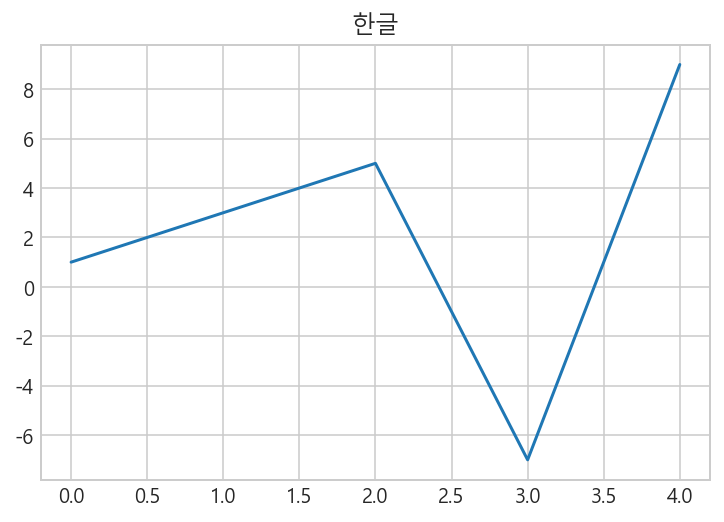

In [8]:
# 한글폰트 확인
pd.Series([1,3,5,-7,9]).plot(title="한글")

In [14]:
# 결측치를 확인합니다.
df.isnull().sum()

종목코드           0
탭코드            0
종목명            0
현재가            0
등락구분           0
전일비            0
등락률            0
순자산가치(NAV)     0
3개월수익률        26
거래량            0
거래대금(백만)       0
시가총액(억)        0
유형             0
브랜드            0
인버스            0
레버리지           0
환헤지H           0
dtype: int64

In [15]:
# 결측치의 비율을 봅니다.
df.isnull().mean()*100

종목코드          0.000000
탭코드           0.000000
종목명           0.000000
현재가           0.000000
등락구분          0.000000
전일비           0.000000
등락률           0.000000
순자산가치(NAV)    0.000000
3개월수익률        3.746398
거래량           0.000000
거래대금(백만)      0.000000
시가총액(억)       0.000000
유형            0.000000
브랜드           0.000000
인버스           0.000000
레버리지          0.000000
환헤지H          0.000000
dtype: float64

<AxesSubplot:>

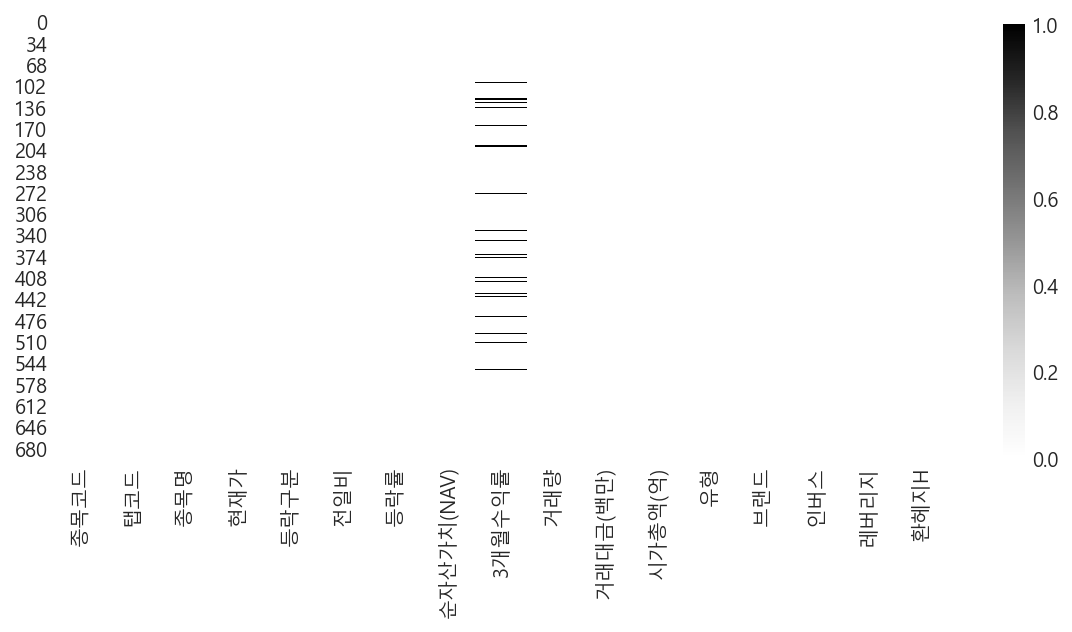

In [16]:
# heatmap을 통한 결측치 시각화
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap="Greys")

In [17]:
# 범주형 데이터 빈도수
# unique(중복을 제외한 값)에 대한 빈도수 구하기
# object type 이 아니더라도 nunique 값이 작다면 범주형 변수인지 확인해 봅니다.
#df.describe(include=np.object_)
df.describe(exclude=np.number)

종목코드        종목명        유형    브랜드    인버스   레버리지   환헤지H
count      694        694       694    694    694    694    694
unique     694        694         7     24      2      2      2
top     069500  KODEX 200  국내 업종/테마  KODEX  False  False  False
freq         1          1       219    159    652    652    613

In [18]:
#  ETF 상품 유형별 빈도수(한 개의 변수)
# df["유형"].value_counts() 의 결과와 같게 시각화 할 수 있습니다.
df["유형"].value_counts().index

Index(['국내 업종/테마', '해외 주식', '채권', '국내 시장지수', '기타', '국내 파생', '원자재'], dtype='object')

<AxesSubplot:xlabel='count', ylabel='유형'>

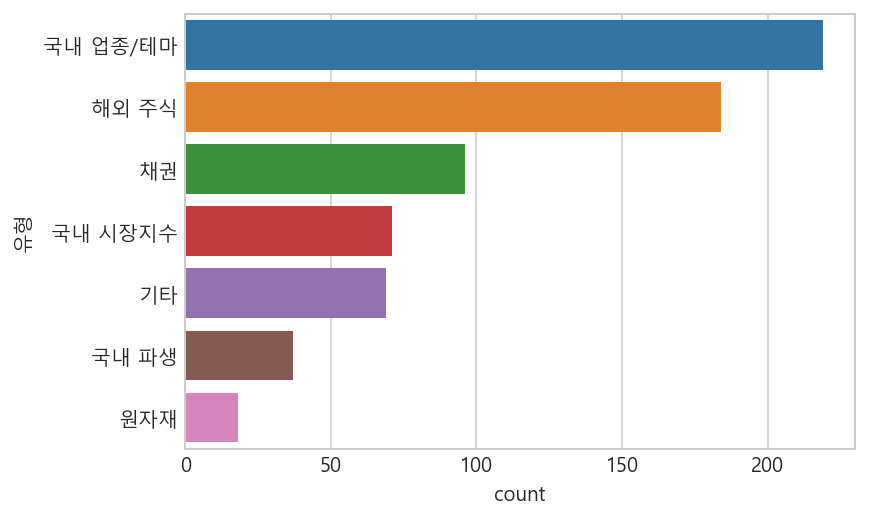

In [19]:
# sns.countplot 으로 빈도수를 시각화 합니다.
sns.countplot(data=df, y="유형", order=df["유형"].value_counts().index)

In [20]:
# value_counts 로 빈도수를 직접 계산합니다.
df["유형"].value_counts()

국내 업종/테마    219
해외 주식       184
채권           96
국내 시장지수      71
기타           69
국내 파생        37
원자재          18
Name: 유형, dtype: int64

In [21]:
# value_counts(normalize=True) 로 빈도수의 비율을 구합니다.
df["유형"].value_counts(normalize=True) * 100

국내 업종/테마    31.556196
해외 주식       26.512968
채권          13.832853
국내 시장지수     10.230548
기타           9.942363
국내 파생        5.331412
원자재          2.593660
Name: 유형, dtype: float64

<AxesSubplot:xlabel='count', ylabel='유형'>

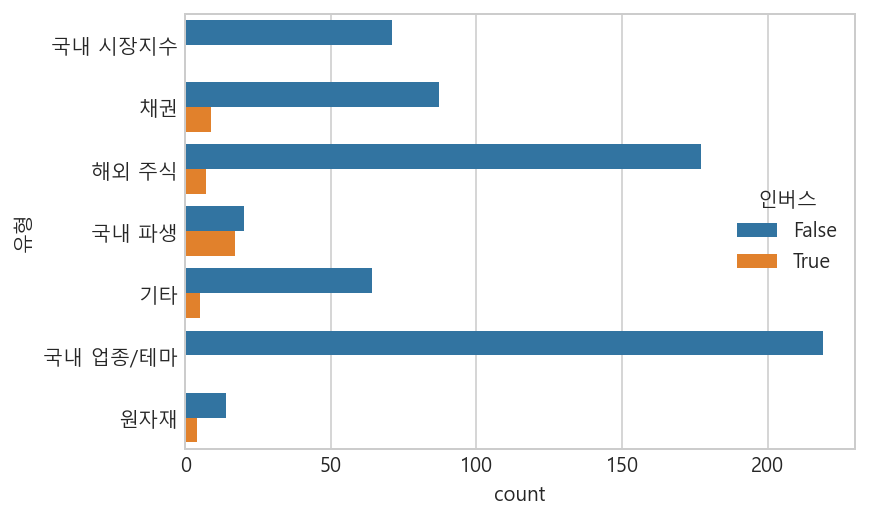

In [22]:
#두 개의 변수 빈도수와 비율
# 유형 컬럼의 빈도수를 봅니다.
# seaborn countplot의 hue를 이용하여 인버스여부에 따라 다른 색상으로 표시해 봅니다.
sns.countplot(data=df, y="유형", hue="인버스")

In [23]:
# pandas crosstab을 이용하여 위 그래프의 수치를 확인 할 수 있습니다.
# seaborn 은 아래와 같은 연산을 하지 않더라도 알아서 통계적 연산을 시각화 해줍니다.
pd.crosstab(df["인버스"], df["유형"])

유형     국내 시장지수  국내 업종/테마  국내 파생  기타  원자재  채권  해외 주식
인버스                                                
False       71       219     20  64   14  87    177
True         0         0     17   5    4   9      7

In [24]:
# value_counts 처럼 normalize 를 사용해 비율을 구할 수도 있습니다.
n= pd.crosstab(df["인버스"], df["유형"], normalize=True) *100
n

유형       국내 시장지수   국내 업종/테마     국내 파생        기타       원자재         채권  \
인버스                                                                    
False  10.230548  31.556196  2.881844  9.221902  2.017291  12.536023   
True    0.000000   0.000000  2.449568  0.720461  0.576369   1.296830   

유형         해외 주식  
인버스               
False  25.504323  
True    1.008646

In [25]:
# 동일하게 유형 데이터를 레버리지 여부에 따라 그립니다.
n.sum()

유형
국내 시장지수     10.230548
국내 업종/테마    31.556196
국내 파생        5.331412
기타           9.942363
원자재          2.593660
채권          13.832853
해외 주식       26.512968
dtype: float64

In [26]:
# 레버리지, 유형에 대한 빈도수를 구힙니다.
pd.crosstab(df["레버리지"], df["유형"])

유형     국내 시장지수  국내 업종/테마  국내 파생  기타  원자재  채권  해외 주식
레버리지                                               
False       71       215     21  66   18  92    169
True         0         4     16   3    0   4     15

In [27]:
# 레버리지, 유형에 대한 빈도수의 비율을 구합니다.
# 레버리지, 유형에 대한 빈도수를 구힙니다.
pd.crosstab(df["레버리지"], df["유형"], normalize=True) *100

유형       국내 시장지수   국내 업종/테마     국내 파생        기타      원자재         채권      해외 주식
레버리지                                                                          
False  10.230548  30.979827  3.025937  9.510086  2.59366  13.256484  24.351585
True    0.000000   0.576369  2.305476  0.432277  0.00000   0.576369   2.161383

<AxesSubplot:xlabel='count', ylabel='브랜드'>

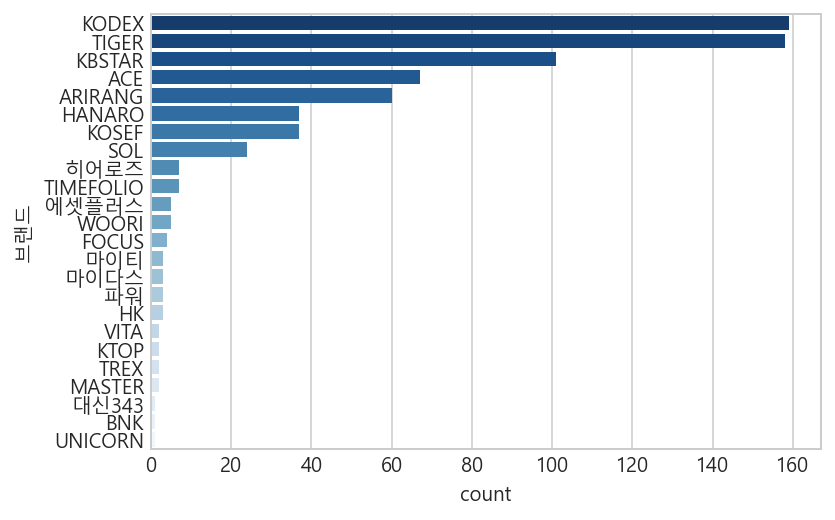

In [28]:
# 브랜드별 ETF 빈도수
sns.countplot(data = df, y="브랜드", order=df["브랜드"].value_counts().index,
             palette="Blues_r")

<AxesSubplot:xlabel='count', ylabel='브랜드'>

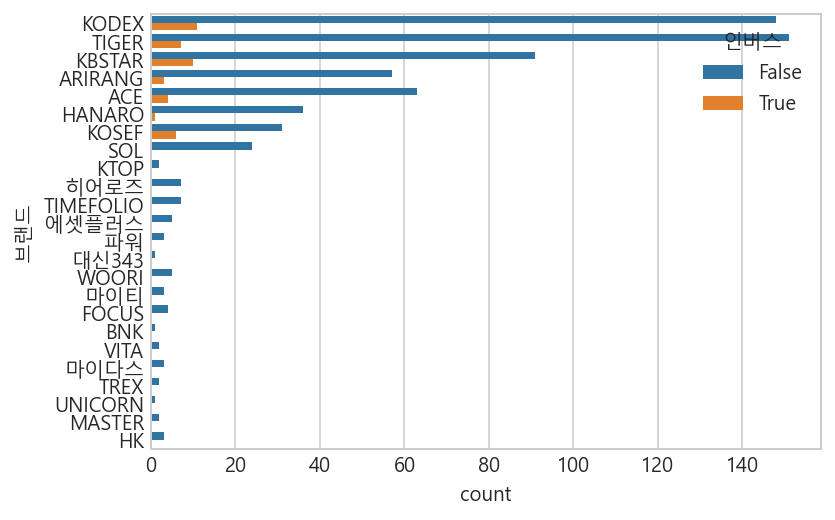

In [29]:
# 브랜드 column의 빈도수를 인버스에 따른 구분으로 그려봅니다.
sns.countplot(data= df, y="브랜드",hue="인버스")

In [30]:
# 인버스, 브랜드의 금융상품 빈도수
pd.crosstab(df["인버스"], df["브랜드"])

브랜드    ACE  ARIRANG  BNK  FOCUS  HANARO  HK  KBSTAR  KODEX  KOSEF  KTOP  ...  \
인버스                                                                      ...   
False   63       57    1      4      36   3      91    148     31     2  ...   
True     4        3    0      0       1   0      10     11      6     0  ...   

브랜드    TREX  UNICORN  VITA  WOORI  대신343  마이다스  마이티  에셋플러스  파워  히어로즈  
인버스                                                                   
False     2        1     2      5      1     3    3      5   3     7  
True      0        0     0      0      0     0    0      0   0     0  

[2 rows x 24 columns]

In [31]:
# 인버스, 브랜드의 금융상품 빈도 비율

in_brand_norm = pd.crosstab(df["인버스"], df["브랜드"], normalize=True) * 100
in_brand_norm.round(2)

브랜드     ACE  ARIRANG   BNK  FOCUS  HANARO    HK  KBSTAR  KODEX  KOSEF  KTOP  \
인버스                                                                           
False  9.08     8.21  0.14   0.58    5.19  0.43   13.11  21.33   4.47  0.29   
True   0.58     0.43  0.00   0.00    0.14  0.00    1.44   1.59   0.86  0.00   

브랜드    ...  TREX  UNICORN  VITA  WOORI  대신343  마이다스   마이티  에셋플러스    파워  히어로즈  
인버스    ...                                                                    
False  ...  0.29     0.14  0.29   0.72   0.14  0.43  0.43   0.72  0.43  1.01  
True   ...  0.00     0.00  0.00   0.00   0.00  0.00  0.00   0.00  0.00  0.00  

[2 rows x 24 columns]

### 레버리지, 브랜드의 ETF 빈도 비율
* 레버리지 ETF란? 일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험ㆍ고수익 상품으로 분류된다.
[네이버 지식백과] 레버리지 ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=2059802&cid=43659&categoryId=43659

<AxesSubplot:xlabel='count', ylabel='브랜드'>

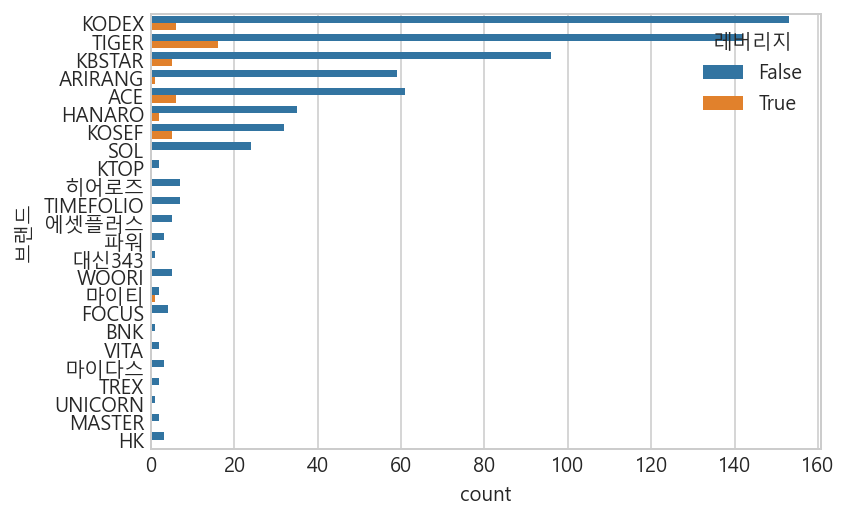

In [32]:
# 브랜드별 레버리지 여부에 따른 빈도수를 시각화 합니다.
sns.countplot(data=df, y="브랜드", hue="레버리지")

In [33]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df["레버리지"], df["브랜드"]) 

브랜드    ACE  ARIRANG  BNK  FOCUS  HANARO  HK  KBSTAR  KODEX  KOSEF  KTOP  ...  \
레버리지                                                                     ...   
False   61       59    1      4      35   3      96    153     32     2  ...   
True     6        1    0      0       2   0       5      6      5     0  ...   

브랜드    TREX  UNICORN  VITA  WOORI  대신343  마이다스  마이티  에셋플러스  파워  히어로즈  
레버리지                                                                  
False     2        1     2      5      1     3    2      5   3     7  
True      0        0     0      0      0     0    1      0   0     0  

[2 rows x 24 columns]

<AxesSubplot:ylabel='브랜드'>

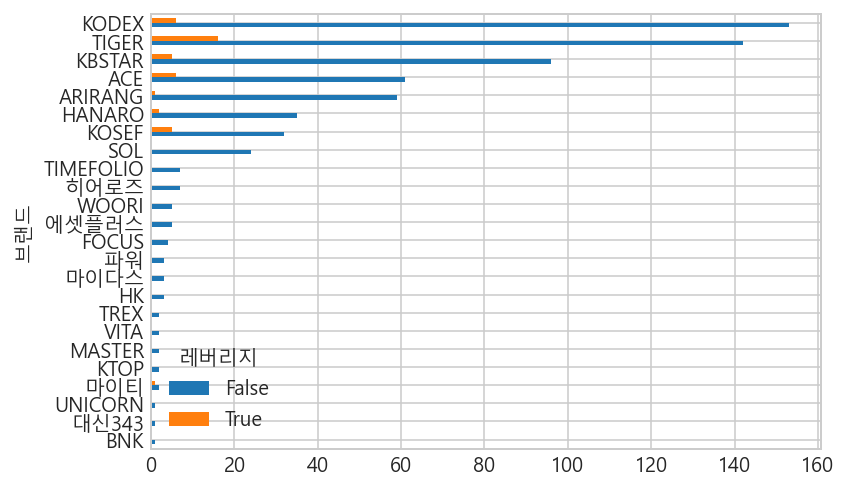

In [34]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df["레버리지"], df["브랜드"]).T.sort_values(by=False).plot.barh()

In [35]:
# 레버리지, 브랜드의 ETF 비율


## 수치형 변수의 기술통계

In [36]:
# describe로 수치형 변수의 기술통계 구하기
desc = df.describe()
desc

탭코드            현재가        등락구분          전일비         등락률  \
count  694.000000     694.000000  694.000000   694.000000  694.000000   
mean     3.609510   21380.929395    2.798271    59.502882    0.505144   
std      1.887598   26995.662166    1.291418   154.136114    1.075083   
min      1.000000    2220.000000    2.000000 -1550.000000   -3.730000   
25%      2.000000    9253.750000    2.000000    -3.750000    0.000000   
50%      4.000000   11340.000000    2.000000    45.000000    0.355000   
75%      5.000000   16300.000000    4.500000   120.000000    1.010000   
max      7.000000  203925.000000    5.000000   965.000000    8.560000   

          순자산가치(NAV)      3개월수익률           거래량       거래대금(백만)       시가총액(억)  
count     694.000000  668.000000  6.940000e+02     694.000000    694.000000  
mean    21385.821326    6.903822  4.172411e+05    4557.579251   1335.008646  
std     27002.280416   12.084504  4.621216e+06   31294.263321   4449.186115  
min        44.000000  -26.902700  0.000000e+00       0.000000     12.000000  
25%      9225.000000    0.985825  5.610000e+02       8.000000     78.000000  
50%     11352.000000    5.478400  5.281000e+03      67.000000    157.500000  
75%     16304.750000   10.418650  4.843625e+04     623.750000    618.250000  
max    203839.000000   80.575000  1.082518e+08  450573.000000  61431.000000

In [37]:
# 수치형 컬럼만 리스트로 만들기
num_cols = desc.columns.tolist()
num_cols

['탭코드',
 '현재가',
 '등락구분',
 '전일비',
 '등락률',
 '순자산가치(NAV)',
 '3개월수익률',
 '거래량',
 '거래대금(백만)',
 '시가총액(억)']

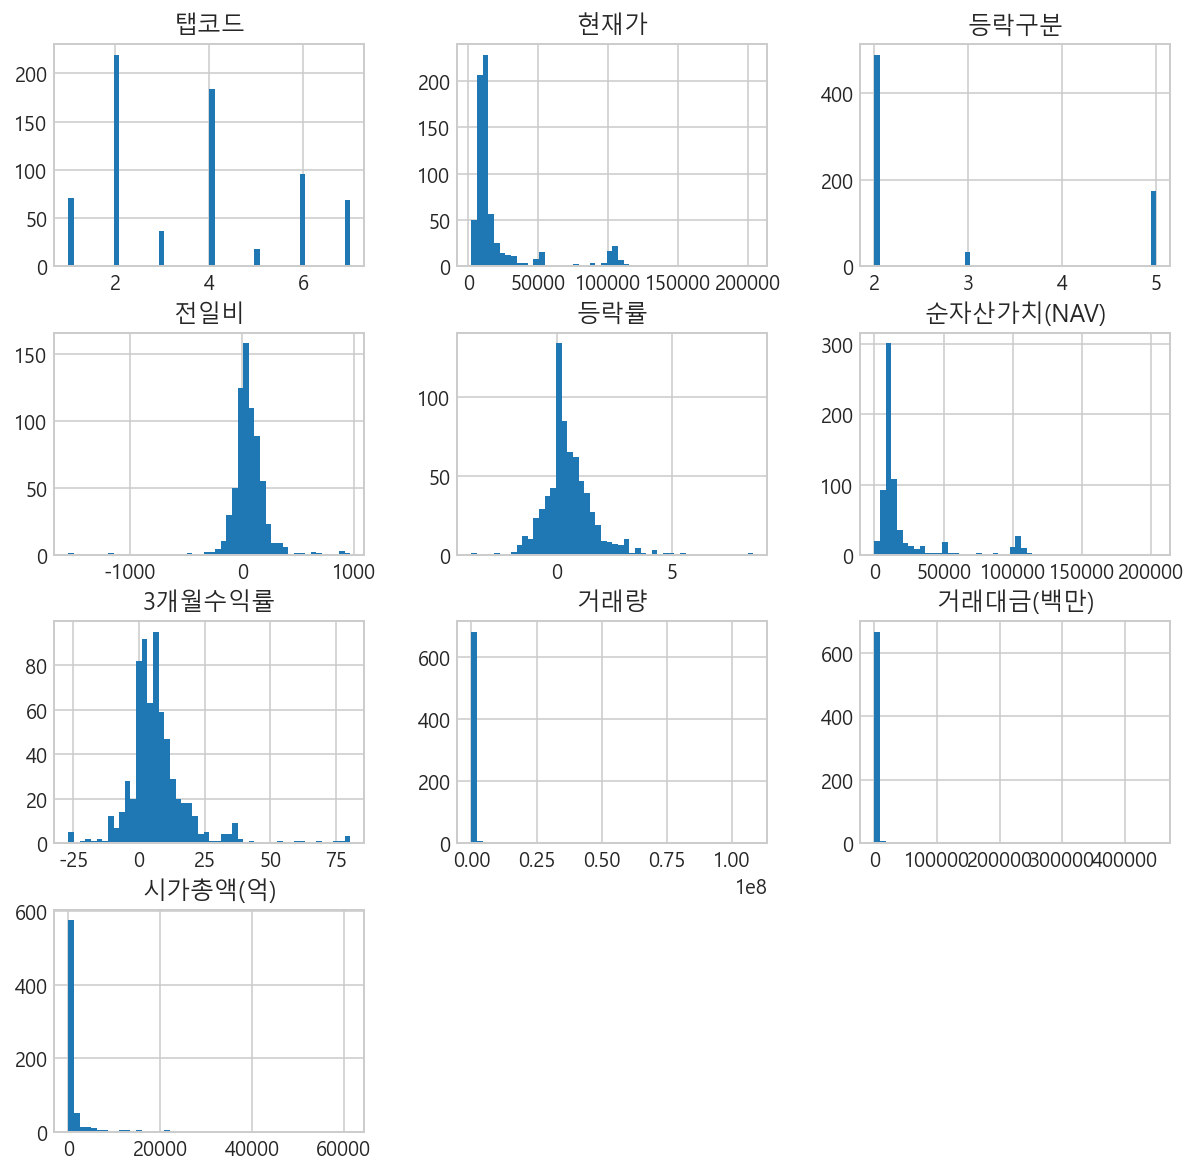

In [38]:
# 히스토그램을 그려보면 수치 데이터로 되어있지만 범주형 데이터를 찾아볼 수 있습니다.
h = df[num_cols].hist(figsize = (10,10), bins=50)

Text(0.5, 1.0, '브랜드별 평균 3개월 수익률')

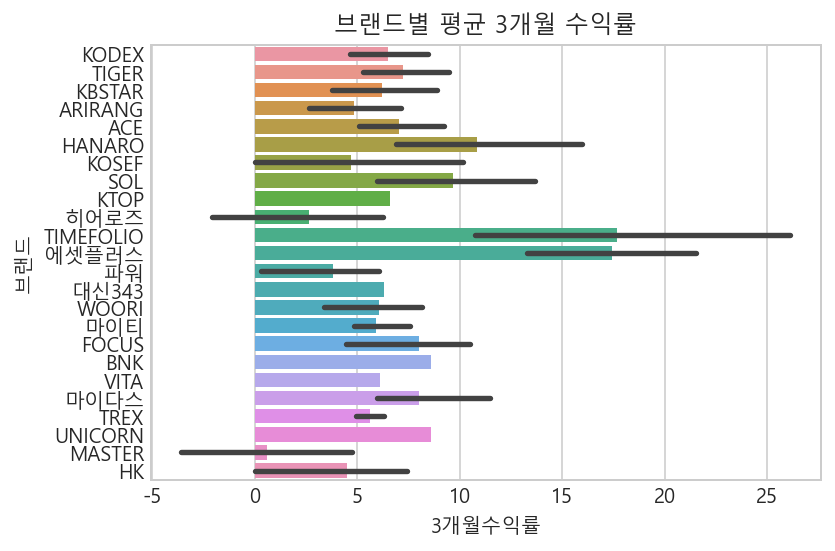

In [39]:
# seaborn의 bar chart를 이용하여 각 브랜드에 대한 3개월수익률의 평균값을 볼 수 있습니다.
# 검은색 막대는 ci로 신뢰구간을 의미합니다.
sns.barplot(data=df,
            y="브랜드",
            x="3개월수익률"
           ).set_title("브랜드별 평균 3개월 수익률")

### barplot 그래프의 값을 groupby 로 직접 구하기

In [40]:
# 위 그래프의 평균 값을 직접 계산을 통해 구해 봅니다.
brand_3month_mean = df.groupby("브랜드")["3개월수익률"].mean()
brand_3month_mean

브랜드
ACE           7.061871
ARIRANG       4.852836
BNK           8.620600
FOCUS         8.007050
HANARO       10.822492
HK            4.499533
KBSTAR        6.227606
KODEX         6.502944
KOSEF         4.701300
KTOP          6.593400
MASTER        0.602000
SOL           9.683250
TIGER         7.222495
TIMEFOLIO    17.688357
TREX          5.622800
UNICORN       8.623200
VITA          6.108800
WOORI         6.088200
대신343         6.289900
마이다스          8.030267
마이티           5.932767
에셋플러스        17.415275
파워            3.836200
히어로즈          2.670717
Name: 3개월수익률, dtype: float64

### 위에서 구한 그룹(브랜드)별 평균 3개월 수익률을 그래프로 표현합니다.


In [41]:
# 브랜드가 마이티인 경우의 데이터를 확인합니다.
df[df["브랜드"] == "마이티"]

종목코드  탭코드                 종목명    현재가  등락구분  전일비   등락률  순자산가치(NAV)  \
334  442260    1       마이티 다이나믹퀀트액티브  11670     2   40  0.34     11617.0   
550  159800    1          마이티 코스피100  25780     2   45  0.17     25867.0   
652  292340    3  마이티 200커버드콜ATM레버리지   7300     3    0  0.00      7296.0   

     3개월수익률  거래량  거래대금(백만)  시가총액(억)       유형  브랜드    인버스   레버리지   환헤지H  
334  7.5855   35         0      168  국내 시장지수  마이티  False  False  False  
550  5.9271   42         1       72  국내 시장지수  마이티  False  False  False  
652  4.2857    0         0       44    국내 파생  마이티  False   True  False

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

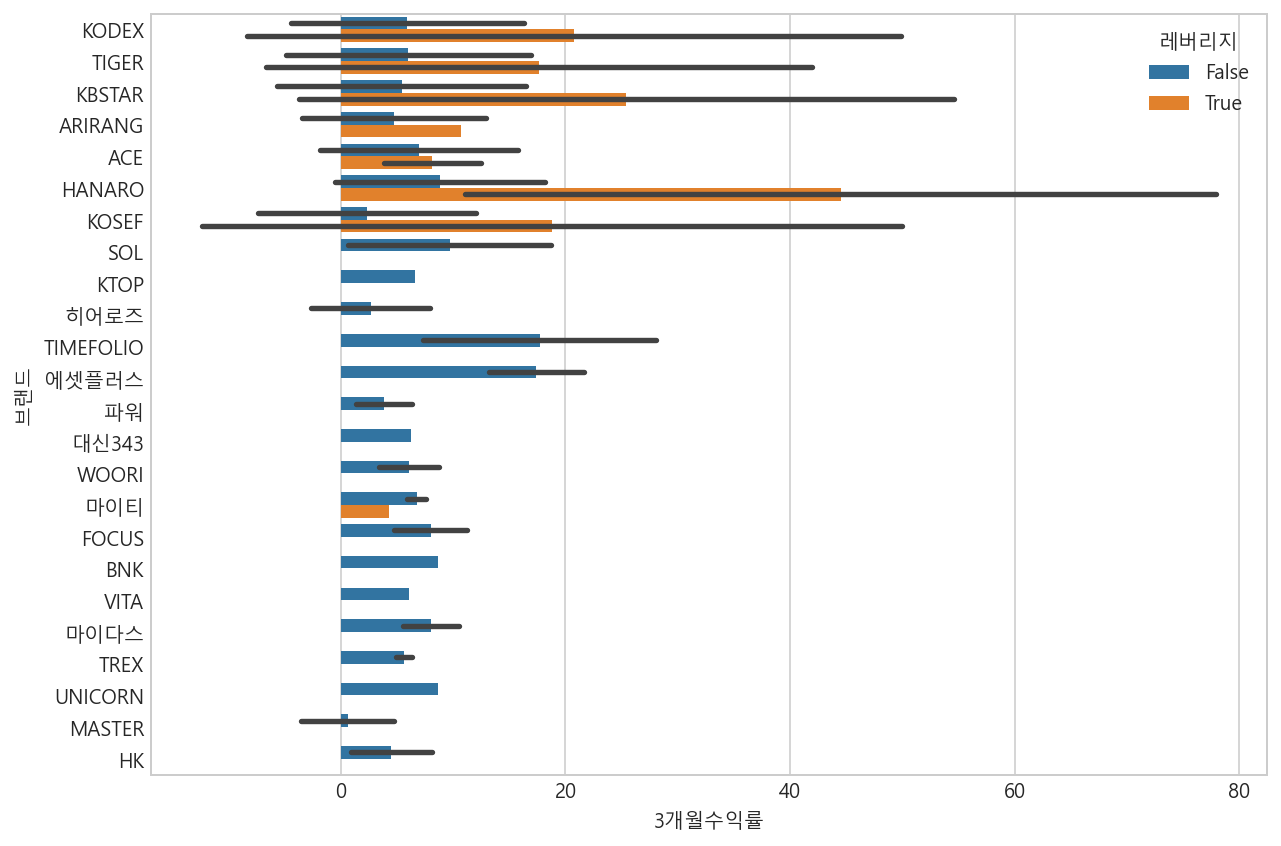

In [42]:
# 브랜드 대비 3개월수익률에 대한 정보를 레버리지 값의 차이를 barplot으로 봅니다.
# 레버리지 유/무에 따라서 평균 3개월 수익률은 많은 차이가 없지만,
# 표준편차의 경우 레버리지가 있을경우 굉장히 편차(ci="sd")가 심함을 알 수 있습니다.
# 레버리지 상품은 오를 때 더 많이 오르고 내릴 때 더 많이 내립니다.
plt.figure(figsize=(10,7))
sns.barplot(data=df, x="3개월수익률", y="브랜드", hue="레버리지", ci="sd")

* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [43]:
# 위에서 그린 그래프의 값을 groupby로 구합니다.
g = df.groupby(["브랜드", "레버리지"])["3개월수익률"].mean().to_frame()
g.style.background_gradient(cmap = "Greens")

### boxplot으로 그리기

#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

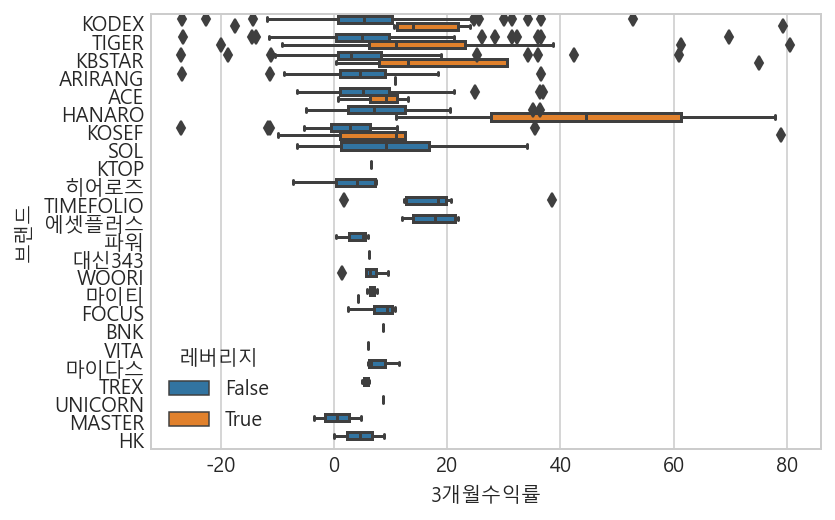

In [44]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화 합니다.
sns.boxplot(data= df, x= "3개월수익률", y="브랜드", hue="레버리지")

#### boxplot 보는 방법

* 사분위수 범위(IQR, Interquartile range, Q3-Q1)
* 이상치를 제외한 최댓값  = Q3 + 1.5IQR
* 이상치를 제외한 최솟값  = Q1 - 1.5IQR

### 3개월 수익률에 대한 기술통계 값 구하기

In [45]:
# 위에서 그린 boxplot의 값을 직접 구해봅니다.
brand_3month_desc = df.groupby(["브랜드","레버리지"])["3개월수익률"].describe()
brand_3month_desc

count       mean        std      min        25%       50%  \
브랜드       레버리지                                                               
ACE       False   60.0   6.972353   8.898819  -6.5680   1.141100   5.06455   
          True     5.0   8.136080   4.831121   0.7214   6.460600   9.16640   
ARIRANG   False   57.0   4.749577   8.280949 -26.7805   1.080300   4.70470   
          True     1.0  10.738600        NaN  10.7386  10.738600  10.73860   
BNK       False    1.0   8.620600        NaN   8.6206   8.620600   8.62060   
FOCUS     False    4.0   8.007050   3.761545   2.5536   7.017525   9.34375   
HANARO    False   34.0   8.842200   9.511413  -4.8518   2.492000   7.15750   
          True     2.0  44.487450  47.307353  11.0361  27.761775  44.48745   
HK        False    3.0   4.499533   4.406017   0.0412   2.323650   4.60610   
KBSTAR    False   95.0   5.419706  11.142993 -26.9027   0.808150   3.08640   
          True     4.0  25.415225  33.652887   0.3752   8.055425  13.15170   
KODEX     False  147.0   5.920672  10.424353 -26.8588   0.745100   5.26860   
          True     6.0  20.768600  31.899185 -17.3665  11.079225  13.94675   
KOSEF     False   30.0   2.353893   9.877512 -26.9015  -0.566725   2.91350   
          True     5.0  18.785740  34.845947  -9.8160   1.149000  11.02390   
KTOP      False    1.0   6.593400        NaN   6.5934   6.593400   6.59340   
MASTER    False    2.0   0.602000   5.895715  -3.5669  -1.482450   0.60200   
SOL       False   22.0   9.683250   9.268154  -6.4928   1.264325   9.15415   
TIGER     False  137.0   6.006765  10.958654 -26.5640   0.386900   5.05610   
          True    16.0  17.632181  25.125618 -19.9404   6.124475  10.97830   
TIMEFOLIO False    7.0  17.688357  11.178158   1.7632  12.659700  18.46840   
TREX      False    2.0   5.622800   0.950917   4.9504   5.286600   5.62280   
UNICORN   False    1.0   8.623200        NaN   8.6232   8.623200   8.62320   
VITA      False    1.0   6.108800        NaN   6.1088   6.108800   6.10880   
WOORI     False    5.0   6.088200   2.985406   1.4382   5.710700   6.30910   
대신343     False    1.0   6.289900        NaN   6.2899   6.289900   6.28990   
마이다스      False    3.0   8.030267   3.020357   5.9900   6.295400   6.60080   
마이티       False    2.0   6.756300   1.172666   5.9271   6.341700   6.75630   
          True     1.0   4.285700        NaN   4.2857   4.285700   4.28570   
에셋플러스     False    4.0  17.415275   4.864414  12.0443  13.939775  17.84915   
파워        False    3.0   3.836200   3.075178   0.3294   2.717900   5.10640   
히어로즈      False    6.0   2.670717   5.799965  -7.1653   0.390675   4.15110   

                       75%      max  
브랜드       레버리지                       
ACE       False   9.669800  36.9130  
          True   11.158000  13.1740  
ARIRANG   False   8.979800  36.5251  
          True   10.738600  10.7386  
BNK       False   8.620600   8.6206  
FOCUS     False  10.333275  10.7871  
HANARO    False  12.650750  36.3727  
          True   61.213125  77.9388  
HK        False   6.728700   8.8513  
KBSTAR    False   8.337200  60.8584  
          True   30.511500  74.9823  
KODEX     False  10.235650  52.8360  
          True   22.008550  79.2654  
KOSEF     False   6.299100  35.5421  
          True   12.547500  79.0243  
KTOP      False   6.593400   6.5934  
MASTER    False   2.686450   4.7709  
SOL       False  16.787750  34.1675  
TIGER     False   9.775400  69.7859  
          True   23.204300  80.5750  
TIMEFOLIO False  19.874100  38.5193  
TREX      False   5.959000   6.2952  
UNICORN   False   8.623200   8.6232  
VITA      False   6.108800   6.1088  
WOORI     False   7.422600   9.5604  
대신343     False   6.289900   6.2899  
마이다스      False   9.050400  11.5000  
마이티       False   7.170900   7.5855  
          True    4.285700   4.2857  
에셋플러스     False  21.324650  21.9185  
파워        False   5.589600   6.0728  
히어로즈      False   7.242600   7.4771

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

* 이미지 출처 : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### KODEX ETF 따로 분석하기

* ⚠️ 주의사항 ⚠️  분석내용은 데이터 수집 시점에 따라 달라집니다.

In [46]:
# KODEX 서브셋을 만듭니다.
kodex = df[df["브랜드"] == "KODEX"]

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

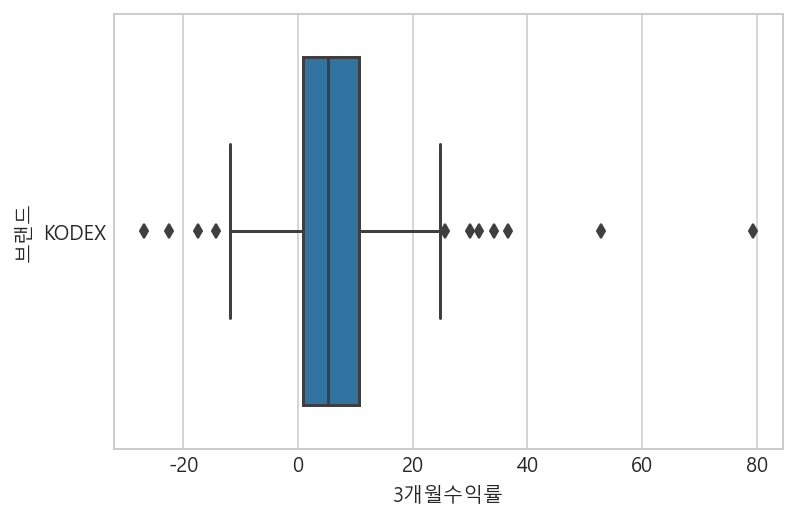

In [47]:
# KODEX 의 boxplot을 그립니다.
sns.boxplot(data = kodex, x="3개월수익률", y="브랜드")

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

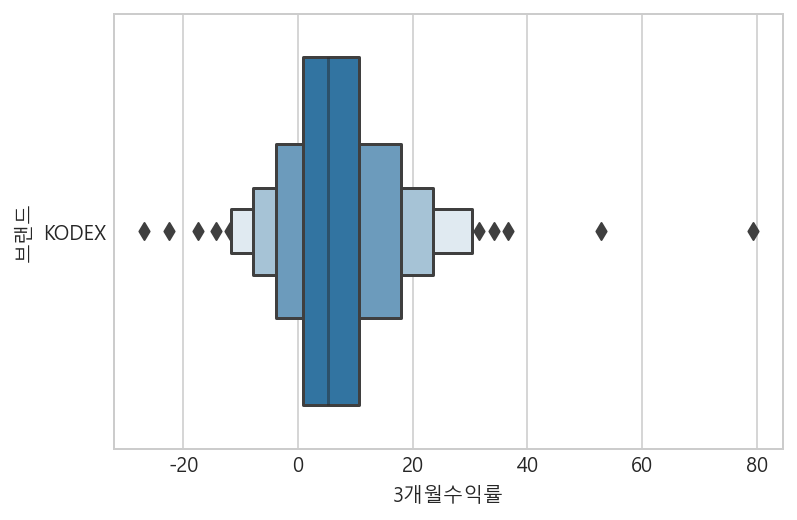

In [48]:
# KODEX 의 boxenplot을 그립니다.
sns.boxenplot(data = kodex, x="3개월수익률", y="브랜드")

<AxesSubplot:>

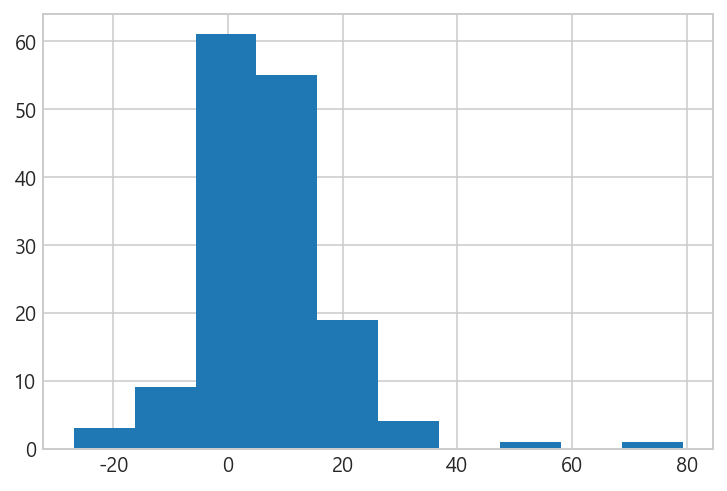

In [49]:
# KODEX 의 historam 을 pandas로 그립니다.
kodex["3개월수익률"].hist(bins=10)

<AxesSubplot:xlabel='3개월수익률', ylabel='Density'>

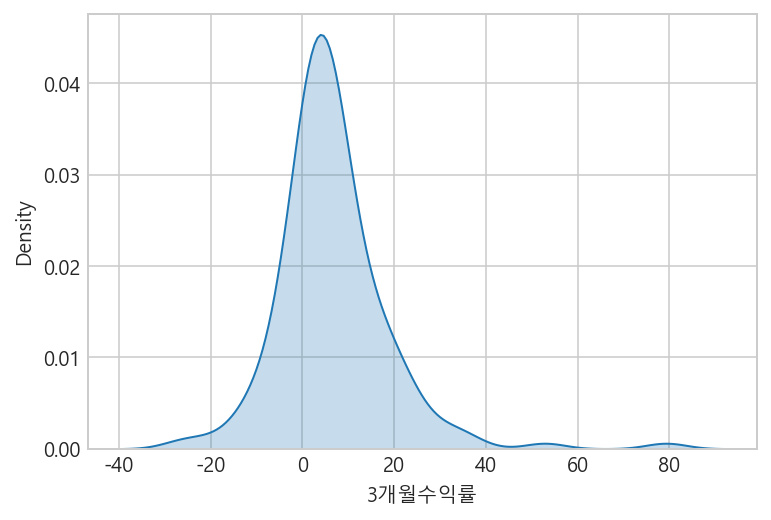

In [50]:
# KODEX 의 kdeplot 을 그립니다.
sns.kdeplot(data=kodex, x="3개월수익률", shade=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

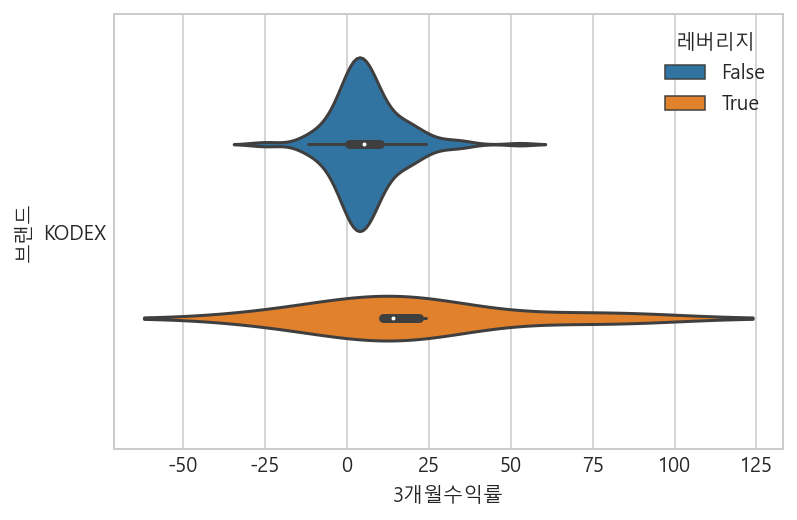

In [51]:
# KODEX 의 violinplot 에 hue="레버리지"로 그립니다.
sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", hue="레버리지")

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

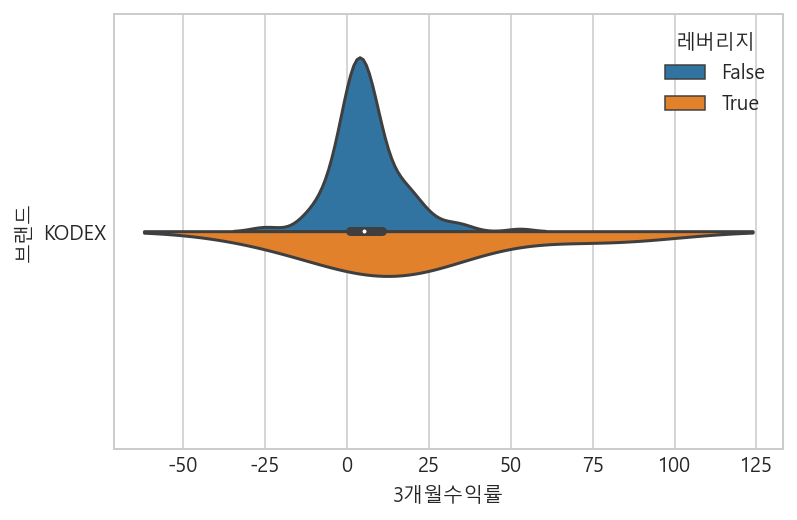

In [52]:
# KODEX 의 violinplot 에 hue="레버리지"를 split 옵션을 사용해 그립니다.
sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", hue="레버리지",
              split=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

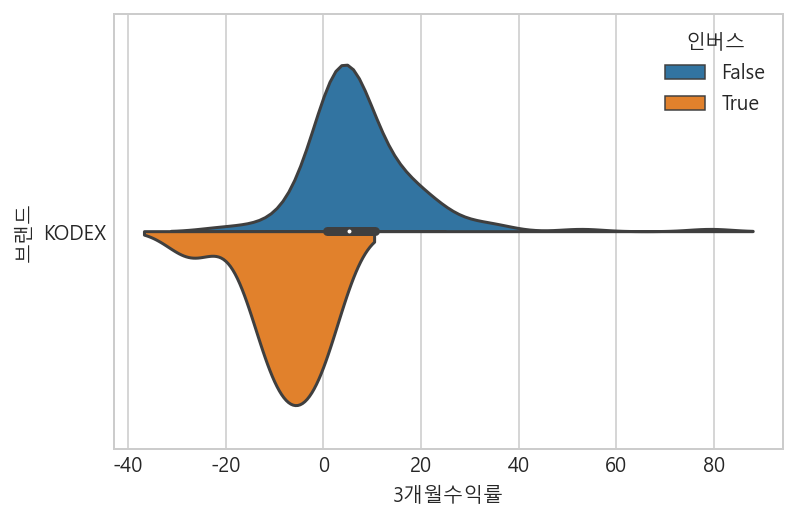

In [53]:
# KODEX 의 violinplot 에 hue="인버스"로 그립니다.
sns.violinplot(data=kodex, x="3개월수익률", y="브랜드", hue="인버스",
              split=True)

* 이미지 출처 : [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)

<img src="https://d2f99xq7vri1nk.cloudfront.net/BoxViolinSmaller.gif">

### 브랜드별 3개월수익률

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

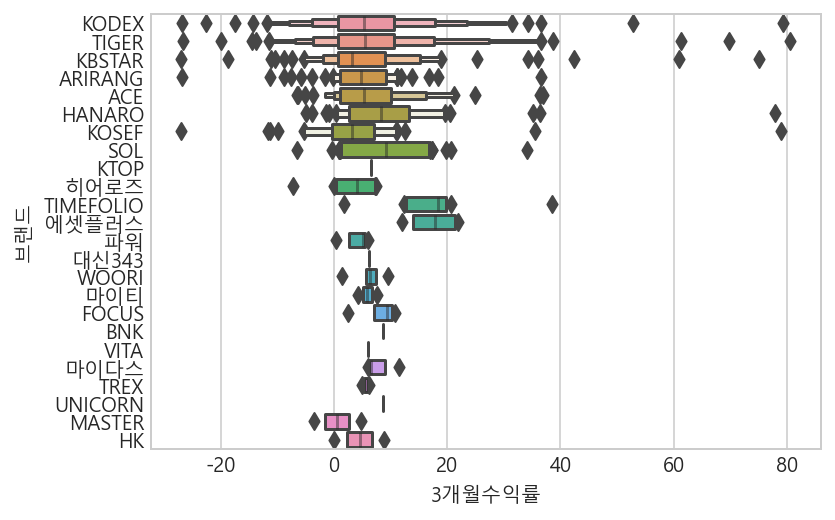

In [54]:
# boxenplot 을 통해 브랜드별 3개월 수익률을 시각화 합니다.
sns.boxenplot(data=df, x="3개월수익률", y = "브랜드")

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

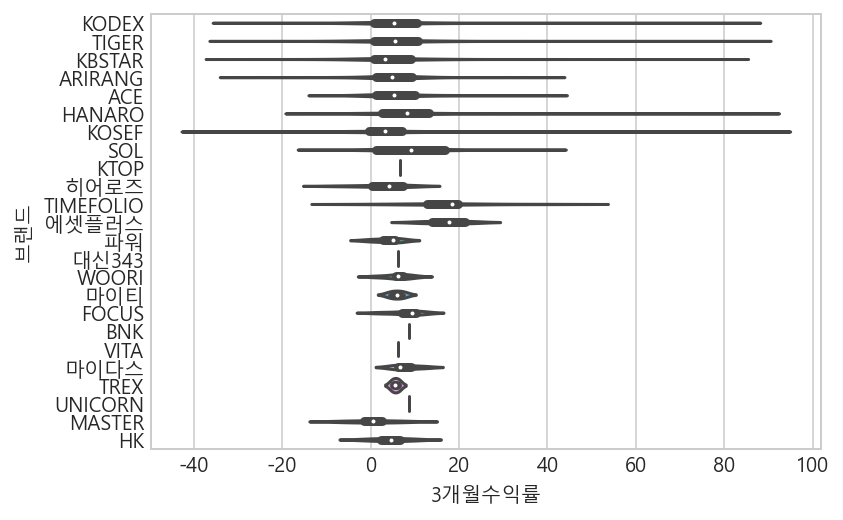

In [55]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
sns.violinplot(data=df, x="3개월수익률", y = "브랜드")

### 서브플롯 그려보기

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

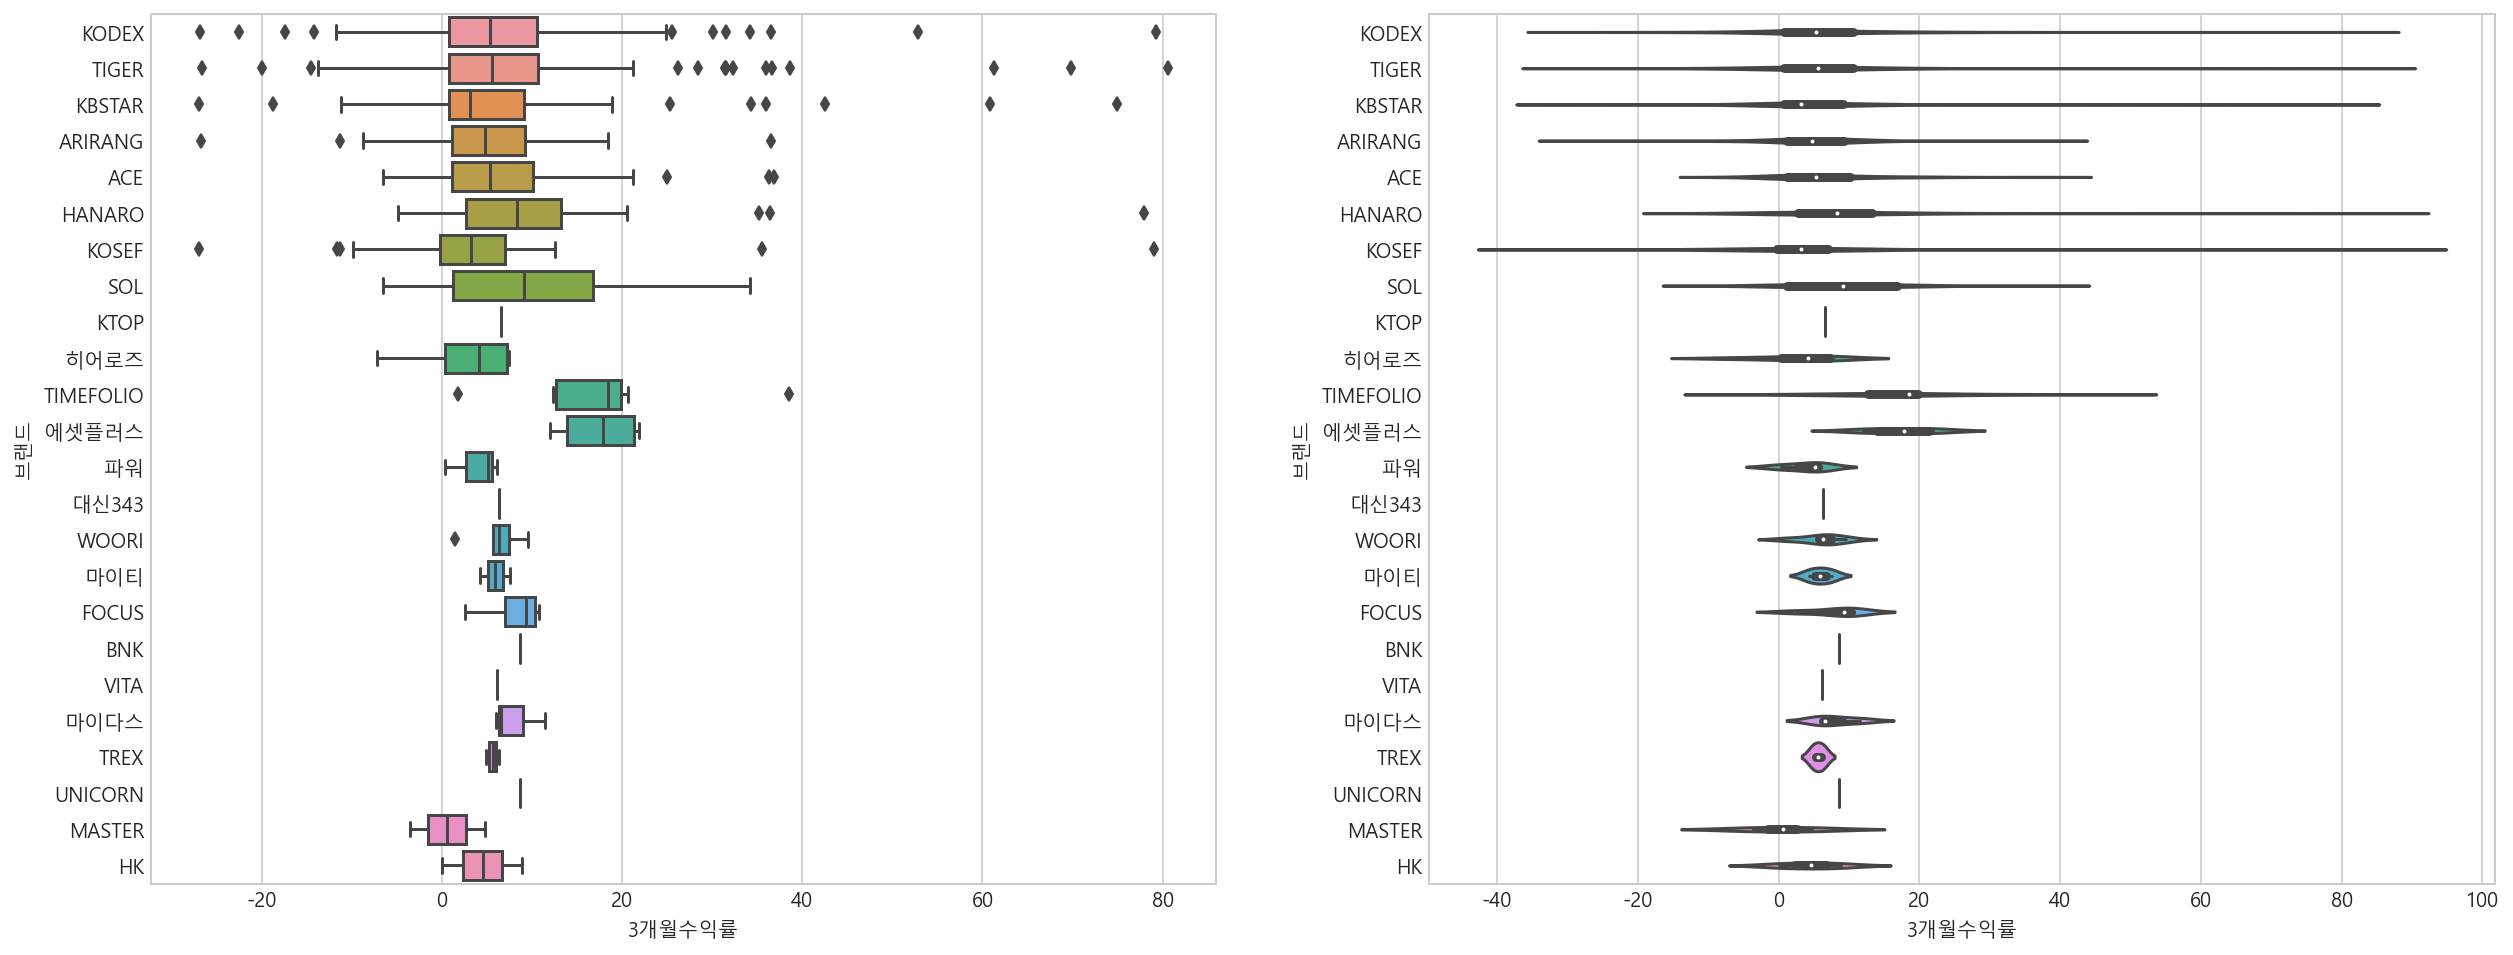

In [56]:
# boxplot과 violinplot을 하나의 그래프에 같이 그려봅니다.
fig, axes = plt.subplots(ncols=2, figsize=(21,8))
sns.boxplot(data=df, x="3개월수익률", y="브랜드", ax=axes[0])
sns.violinplot(data=df, x="3개월수익률", y="브랜드", ax=axes[1])

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

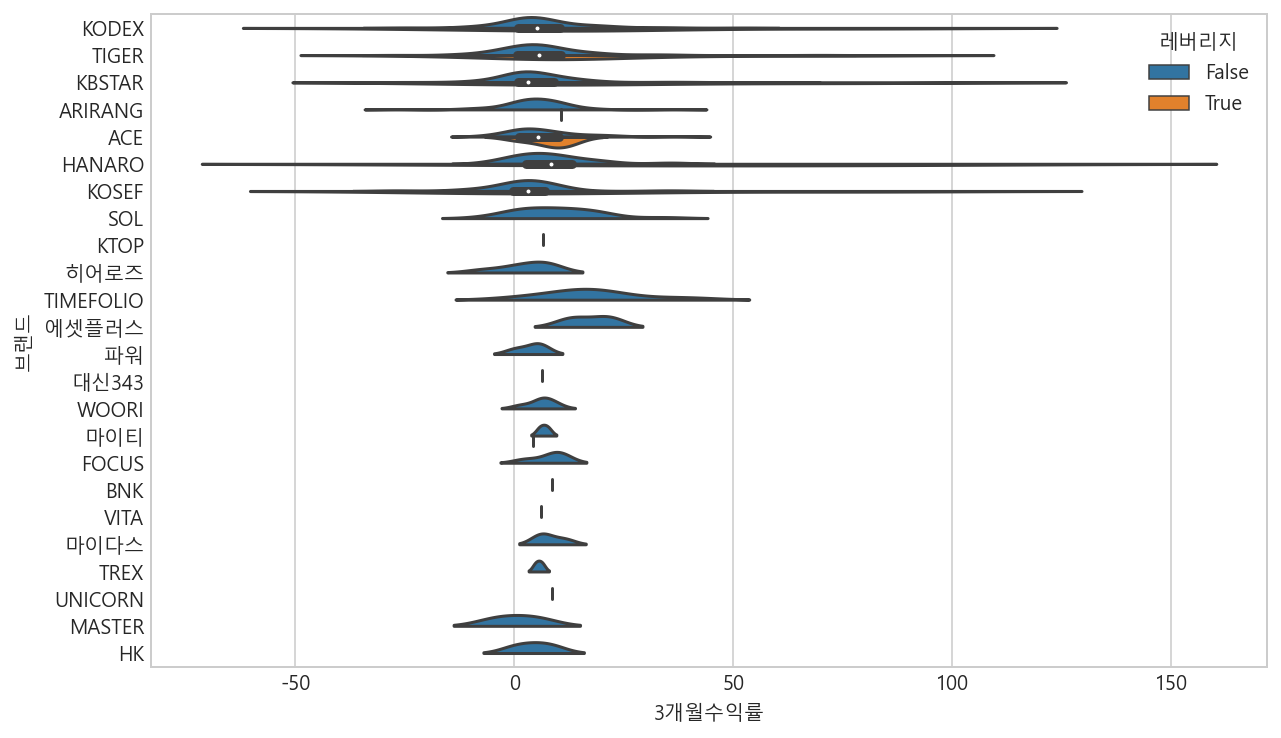

In [57]:
# violinplot은 kdeplot을 마주보도록 그린 그래프로 값의 분포를 알 수 있습니다.
# boxplot의 단점을 보완하기 위해 만들어지기도 했는데 내부에 boxplot을 함께 그려줍니다.
# 가운데 점은 중앙값을 의미합니다.
# 브랜드별 3개월수익률을 레버리지 여부에 따라 그려봅니다.
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="3개월수익률", y="브랜드", hue="레버리지", split=True)

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

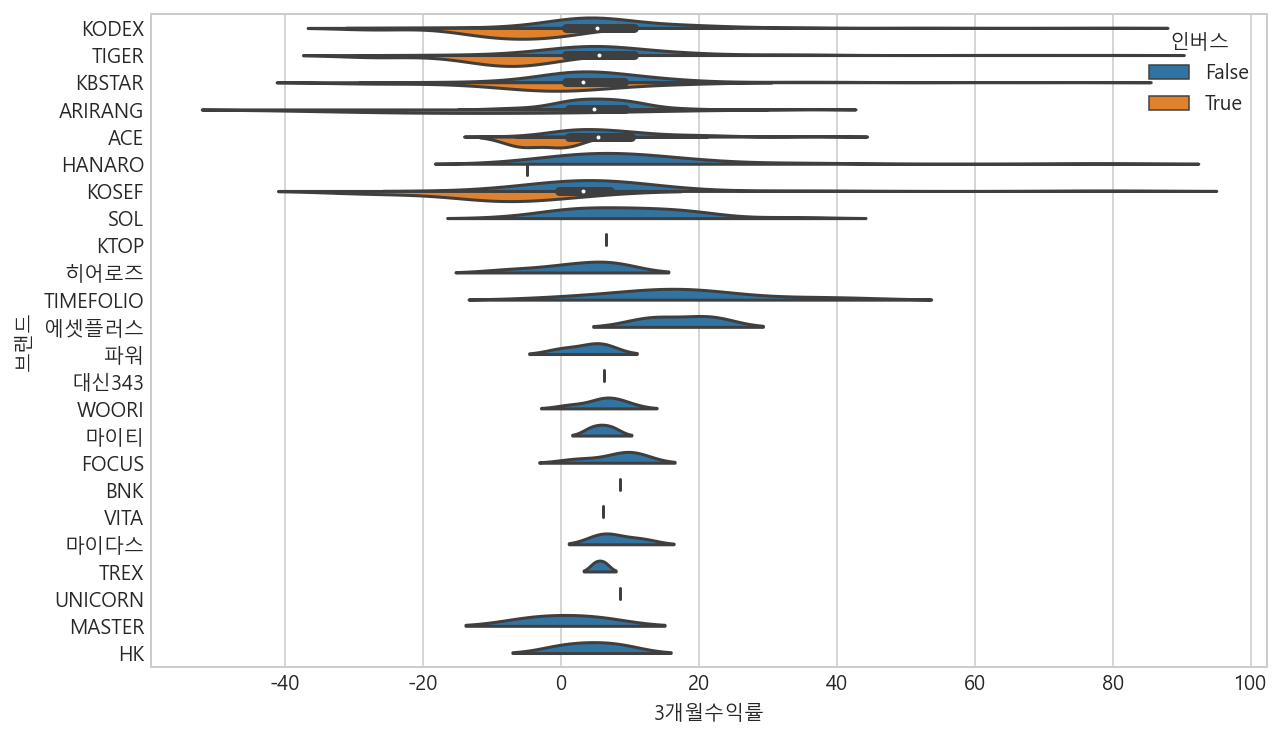

In [58]:
# 브랜드별 3개월수익률을 인버스 여부에 따라 그려봅니다.
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="3개월수익률", y="브랜드", hue="인버스", split=True)

### 브랜드별 거래량

<AxesSubplot:xlabel='거래량', ylabel='브랜드'>

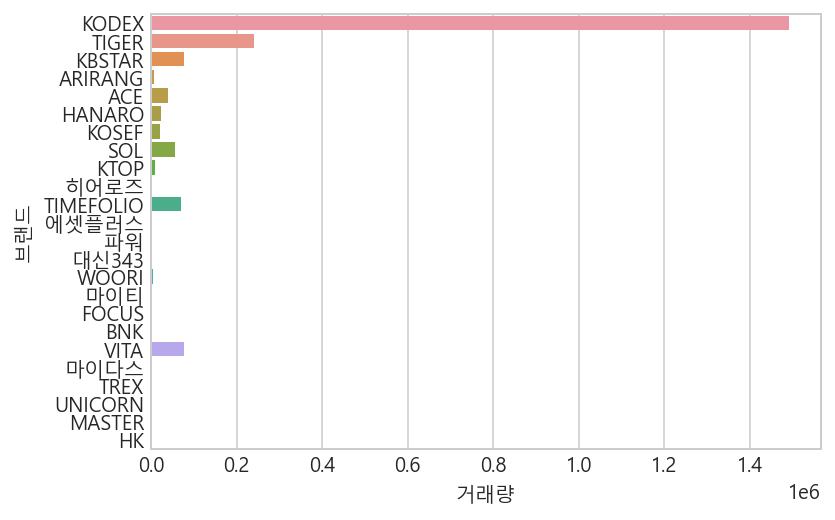

In [59]:
# 수집한 날짜에 대한 브랜드별 거래량을 봅니다.
sns.barplot(data=df, x="거래량",y="브랜드",ci=None)

In [60]:
df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])]

종목코드  탭코드                    종목명    현재가  등락구분  전일비   등락률  순자산가치(NAV)  \
1    357870    6    TIGER CD금리투자KIS(합성)  52205     3    0  0.00     52209.0   
3    371460    4  TIGER 차이나전기차SOLACTIVE  11480     2  200  1.77     11514.0   
5    133690    4         TIGER 미국나스닥100  76215     2  615  0.81     76268.0   
8    102110    1              TIGER 200  33895     2  120  0.36     33951.0   
10   360750    4         TIGER 미국S&P500  13520     2   25  0.19     13528.0   
..      ...  ...                    ...    ...   ...  ...   ...         ...   
687  287300    2           KBSTAR 200건설  13330     2  690  5.46     13307.0   
688  252730    2          KBSTAR 모멘텀로우볼  14115     2  205  1.47     14120.0   
691  287330    2        KBSTAR 200생활소비재   6560     2   50  0.77      6563.0   
692  315480    2    KBSTAR 200커뮤니케이션서비스  11865     2  160  1.37     11897.0   
693  287320    2          KBSTAR 200산업재  12225     2  120  0.99     12227.0   

      3개월수익률      거래량  거래대금(백만)  시가총액(억)        유형     브랜드    인버스   레버리지  \
1     0.8597   987172     51535    47635        채권   TIGER  False  False   
3    -6.6612  4647358     53037    29334     해외 주식   TIGER  False  False   
5    19.0232    82102      6258    22072     해외 주식   TIGER  False  False   
8     6.2474  1018307     34588    20862   국내 시장지수   TIGER  False  False   
10    9.1386   983822     13309    18353     해외 주식   TIGER  False  False   
..       ...      ...       ...      ...       ...     ...    ...    ...   
687  15.4337     2618        34       21  국내 업종/테마  KBSTAR  False  False   
688   0.8701       11         0       21  국내 업종/테마  KBSTAR  False  False   
691  -5.1712   113624       747       14  국내 업종/테마  KBSTAR  False  False   
692   0.2999      162         1       14  국내 업종/테마  KBSTAR  False  False   
693   7.0291      204         2       12  국내 업종/테마  KBSTAR  False  False   

      환헤지H  
1    False  
3    False  
5    False  
8    False  
10   False  
..     ...  
687  False  
688  False  
691  False  
692  False  
693  False  

[259 rows x 17 columns]

<AxesSubplot:xlabel='브랜드', ylabel='거래량'>

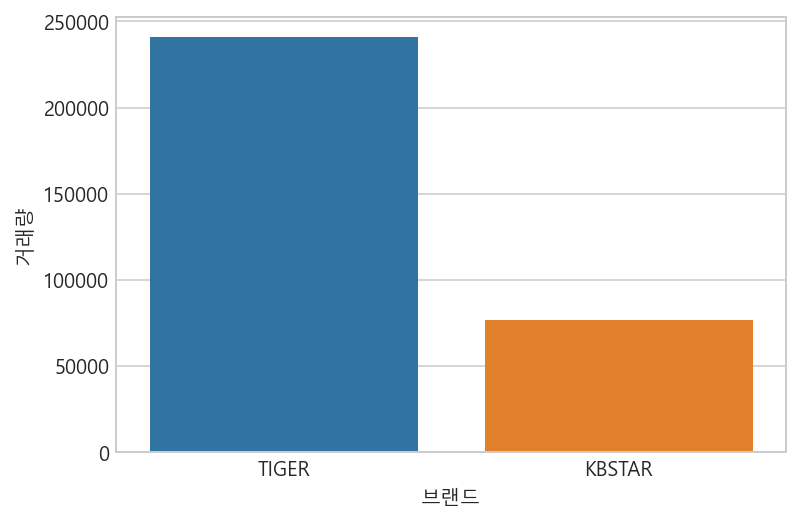

In [61]:
# 전체 브랜드를 보면 값의 크기 차이로 시각화를 제대로 보기 어렵습니다.
# 일부 브랜드 "TIGER", "KBSTAR", "KINDEX" 를 따로 가져와서 시각화 합니다.
sns.barplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])],
            x="브랜드",y="거래량",ci=None)

<AxesSubplot:xlabel='브랜드', ylabel='거래량'>

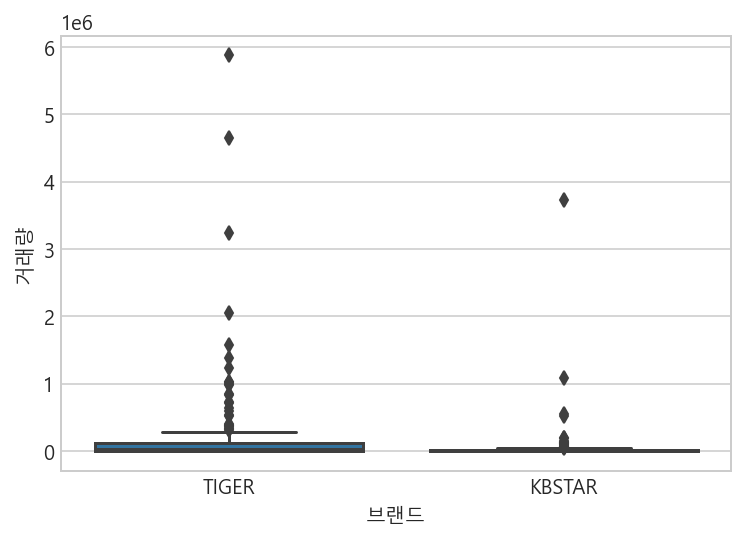

In [62]:
sns.boxplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])],
            x="브랜드",y="거래량")

<AxesSubplot:xlabel='브랜드', ylabel='거래량'>

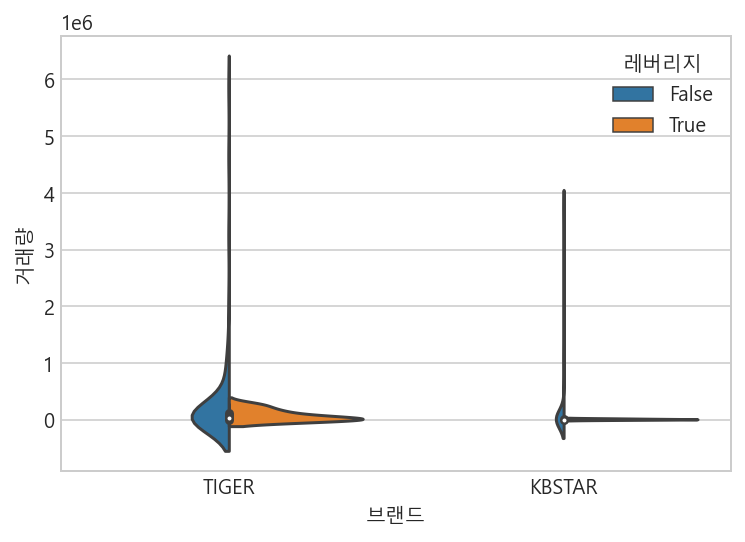

In [63]:
sns.violinplot(data=df[df["브랜드"].isin(["TIGER", "KBSTAR", "KINDEX"])],
            x="브랜드",y="거래량", hue="레버리지", split=True)

<AxesSubplot:xlabel='브랜드', ylabel='거래량'>

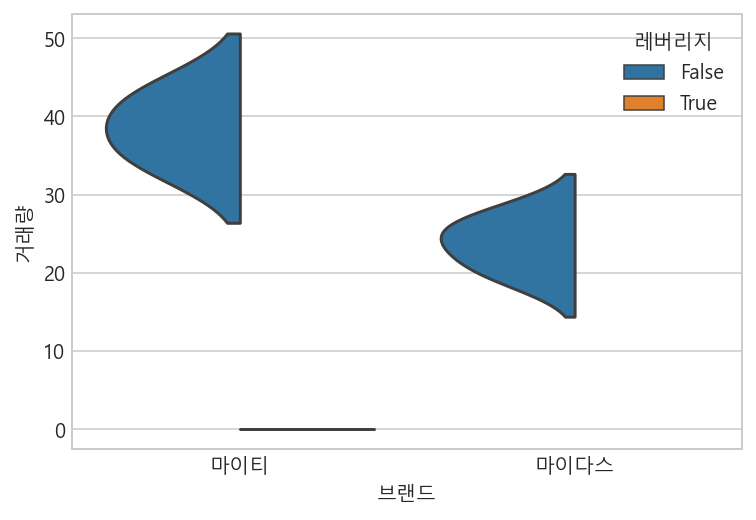

In [64]:
# "마이티", "마이다스", "흥국" 만 봅니다.
sns.violinplot(data=df[df["브랜드"].isin(["마이티", "마이다스", "흥국" ])],
            x="브랜드",y="거래량", hue="레버리지", split=True)

In [65]:
# "마이티", "마이다스", "흥국" 의 기술통계 값 보기
df[df["브랜드"].isin(["마이티", "마이다스", "흥국" ])].groupby("브랜드")["거래량"].describe()

count       mean        std   min   25%   50%   75%   max
브랜드                                                            
마이다스    3.0  23.666667   3.511885  20.0  22.0  24.0  25.5  27.0
마이티     3.0  25.666667  22.501852   0.0  17.5  35.0  38.5  42.0

### 유형에 따른 거래량

Text(0.5, 1.0, 'ETF 유형별 평균 거래량')

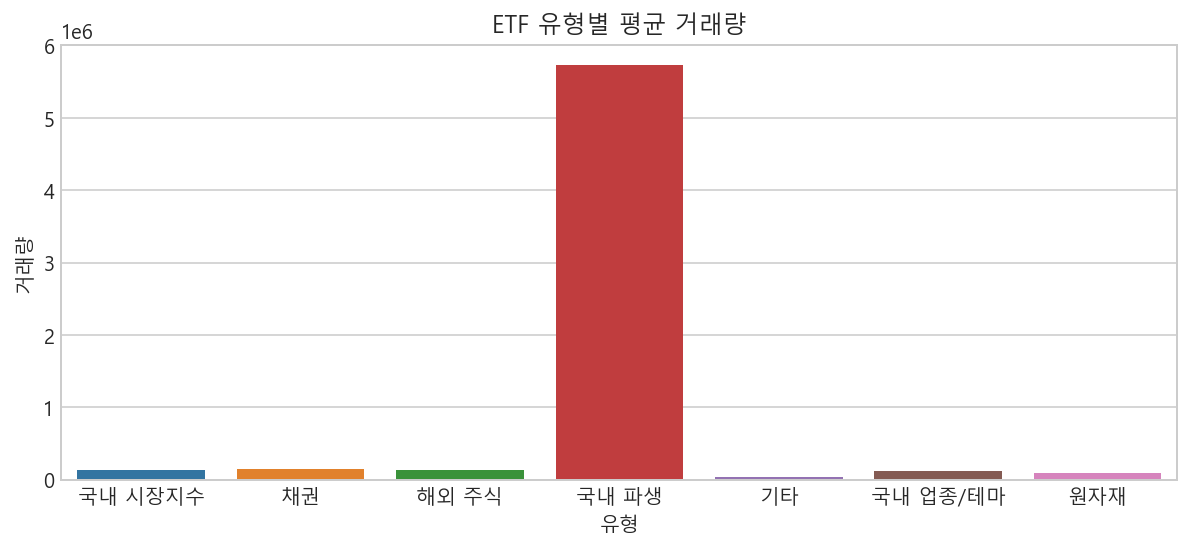

In [66]:
# 유형에 따른 평균 거래량을 barplot으로 시각화 합니다.
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="유형", y="거래량"
           ,ci=None).set_title("ETF 유형별 평균 거래량")

In [67]:
# 위 그래프의 유형에 따른 평균 거래량을 직접 groupby를 통해 구합니다.
df.groupby(["유형"])["거래량"].mean()

유형
국내 시장지수     1.381925e+05
국내 업종/테마    1.143286e+05
국내 파생       5.724182e+06
기타          3.184264e+04
원자재         9.230506e+04
채권          1.484812e+05
해외 주식       1.348269e+05
Name: 거래량, dtype: float64

### 유형에 따른 거래대금

Text(0.5, 1.0, 'ETF유형별 평균 거래대금(백만)')

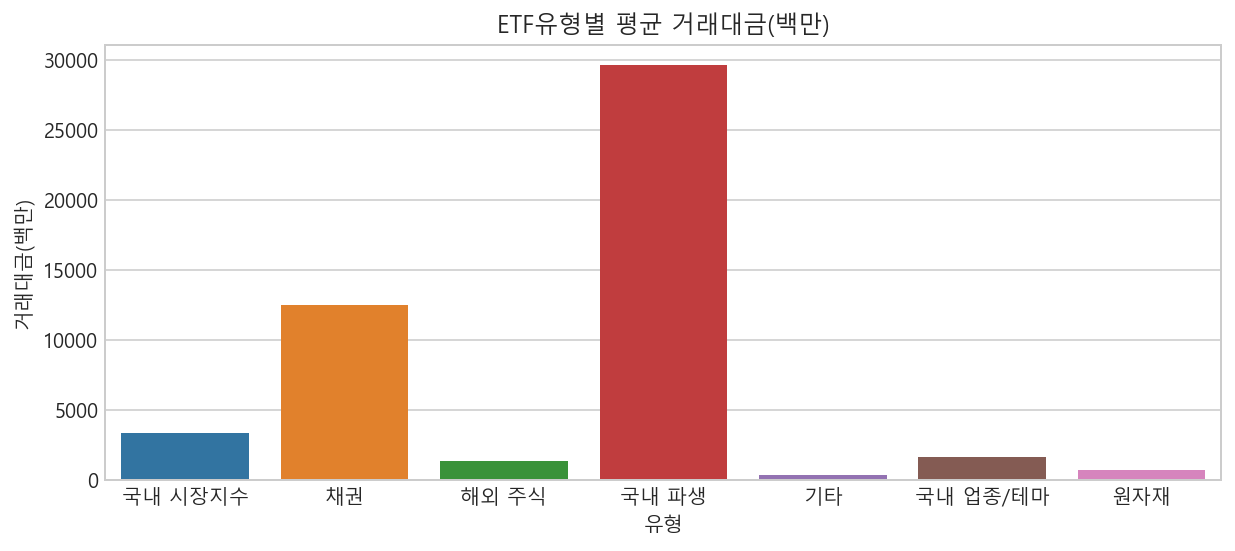

In [68]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 barplot 으로 그립니다.
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="유형", y= "거래대금(백만)", 
            ci=None).set_title("ETF유형별 평균 거래대금(백만)")

In [69]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 groupby를 통해 구합니다.
df.groupby("유형")["거래대금(백만)"].mean().sort_values(ascending = False)

유형
국내 파생       29594.351351
채권          12496.281250
국내 시장지수      3304.690141
국내 업종/테마     1620.059361
해외 주식        1338.418478
원자재           659.888889
기타            300.768116
Name: 거래대금(백만), dtype: float64

In [70]:
# 위 그래프의 유형에 따른 평균 거래대금(백만)을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index="유형",
              values="거래대금(백만)").sort_values("거래대금(백만)", ascending=False)

거래대금(백만)
유형                    
국내 파생     29594.351351
채권        12496.281250
국내 시장지수    3304.690141
국내 업종/테마   1620.059361
해외 주식      1338.418478
원자재         659.888889
기타          300.768116

### 유형에 따른 시가총액

Text(0.5, 1.0, 'ETF유형별 평균 시가총액(억)')

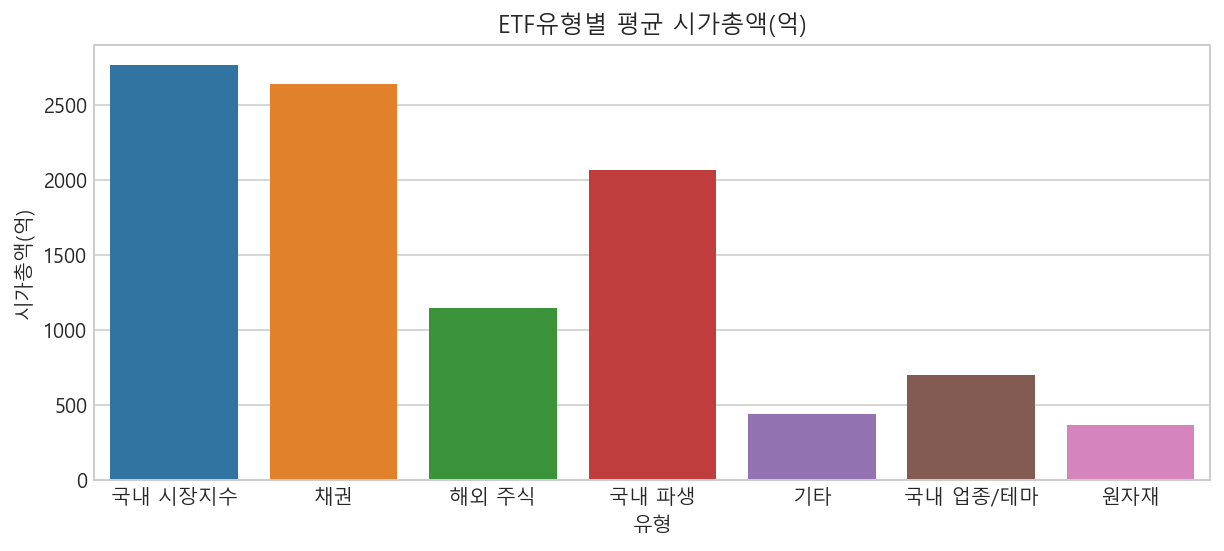

In [71]:
# 유형에 따른 평균 시가총액(억) 에 대한 시각화를 합니다.
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="유형", y= "시가총액(억)", 
            ci=None).set_title("ETF유형별 평균 시가총액(억)")

In [72]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 groupby를 통해 구합니다.
df.groupby("유형")["시가총액(억)"].mean().sort_values(ascending = False)

유형
국내 시장지수     2762.323944
채권          2638.906250
국내 파생       2065.648649
해외 주식       1147.521739
국내 업종/테마     697.890411
기타           434.942029
원자재          367.444444
Name: 시가총액(억), dtype: float64

In [73]:
# 위 그래프의 유형에 따른 평균 시가총액(억)을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index="유형",
              values="시가총액(억)").sort_values("시가총액(억)", ascending=False)

시가총액(억)
유형                   
국내 시장지수   2762.323944
채권        2638.906250
국내 파생     2065.648649
해외 주식     1147.521739
국내 업종/테마   697.890411
기타         434.942029
원자재        367.444444

### 유형에 따른 3개월 수익률

Text(0.5, 1.0, 'ETF유형별 평균 3개월 수익률')

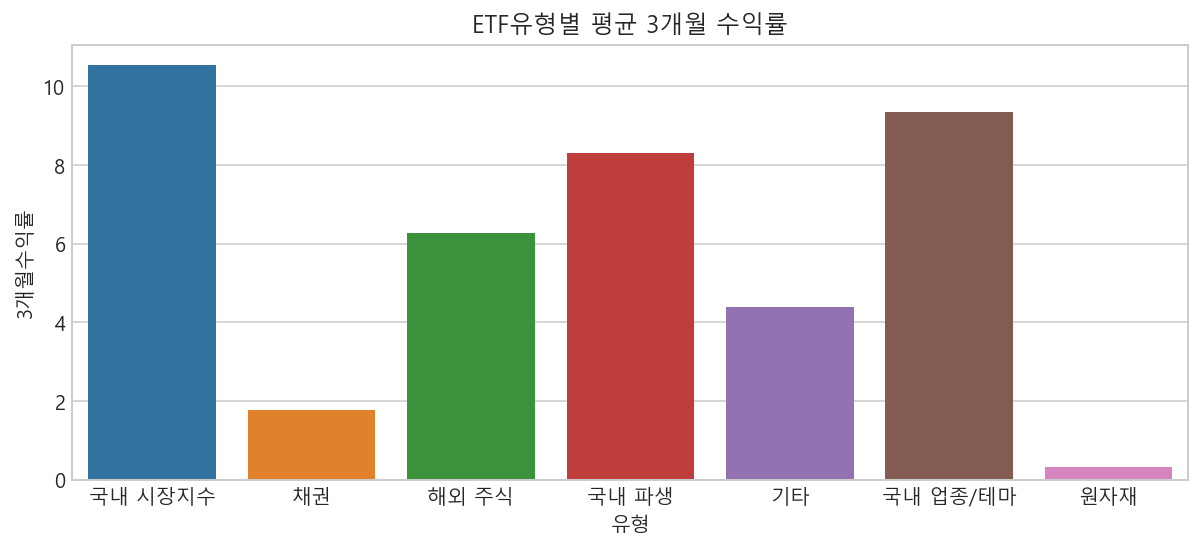

In [74]:
# 유형에 따른 평균 3개월수익률에 대한 시각화를 합니다.
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="유형", y= "3개월수익률", 
            ci=None).set_title("ETF유형별 평균 3개월 수익률")

In [75]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 groupby를 통해 구합니다.
df.groupby("유형")["3개월수익률"].mean().sort_values(ascending = False)

유형
국내 시장지수     10.526888
국내 업종/테마     9.346285
국내 파생        8.297616
해외 주식        6.270875
기타           4.394428
채권           1.780811
원자재          0.324678
Name: 3개월수익률, dtype: float64

In [76]:
# 위 그래프의 유형에 따른 평균 3개월수익률을 직접 pivot_table을 통해 구합니다.
pd.pivot_table(data=df, index="유형",
              values="3개월수익률").sort_values("3개월수익률", ascending=False)

3개월수익률
유형                 
국내 시장지수   10.526888
국내 업종/테마   9.346285
국내 파생      8.297616
해외 주식      6.270875
기타         4.394428
채권         1.780811
원자재        0.324678

## 여러 개의 변수로 서브플롯 그리기
### PairGrid와 barplot 으로 서브플롯 그리기


* PairGrid는 한번에 서브플롯을 쉽게 그려볼 수 있는 장점이 있지만 아쉽게도 share axis in PairGrid는 지원하지 않고 있습니다.
* 참고 : https://github.com/mwaskom/seaborn/issues/1032

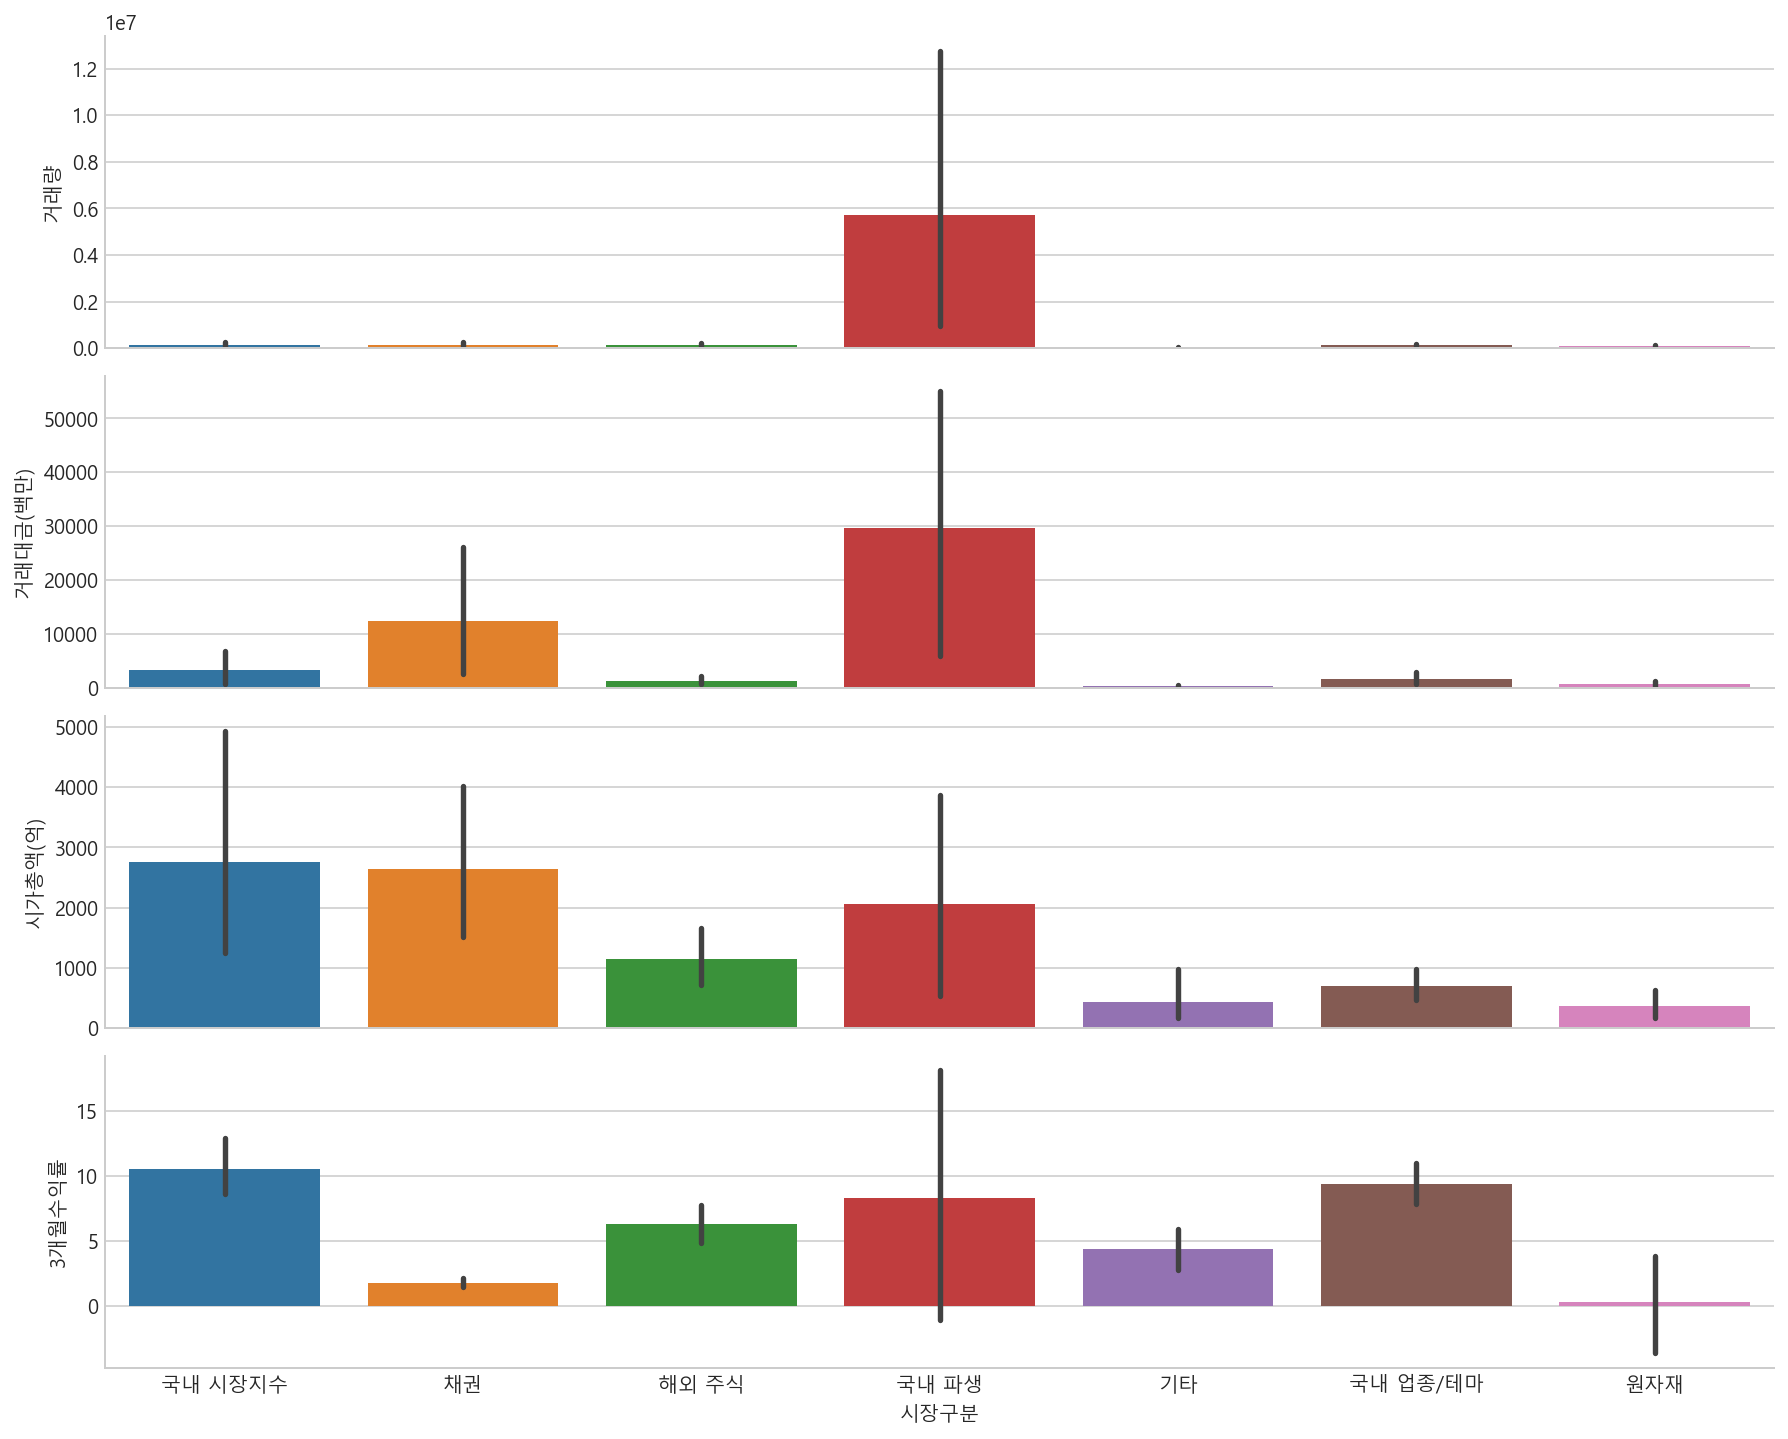

In [77]:
# PairGrid 와 barplot을 한번에 서브플롯으로 그립니다.
# 유형에 따른 "거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률" 에 대한 시각화를 합니다.
g = sns.PairGrid(data=df,
                x_vars="유형",
                y_vars=["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"],
                aspect=5)
g.map(sns.barplot)
g.set(xlabel="시장구분")

### subplots를 통한 시각화

In [78]:
row_cols = ["거래량", "거래대금(백만)", "시가총액(억)", "3개월수익률"]

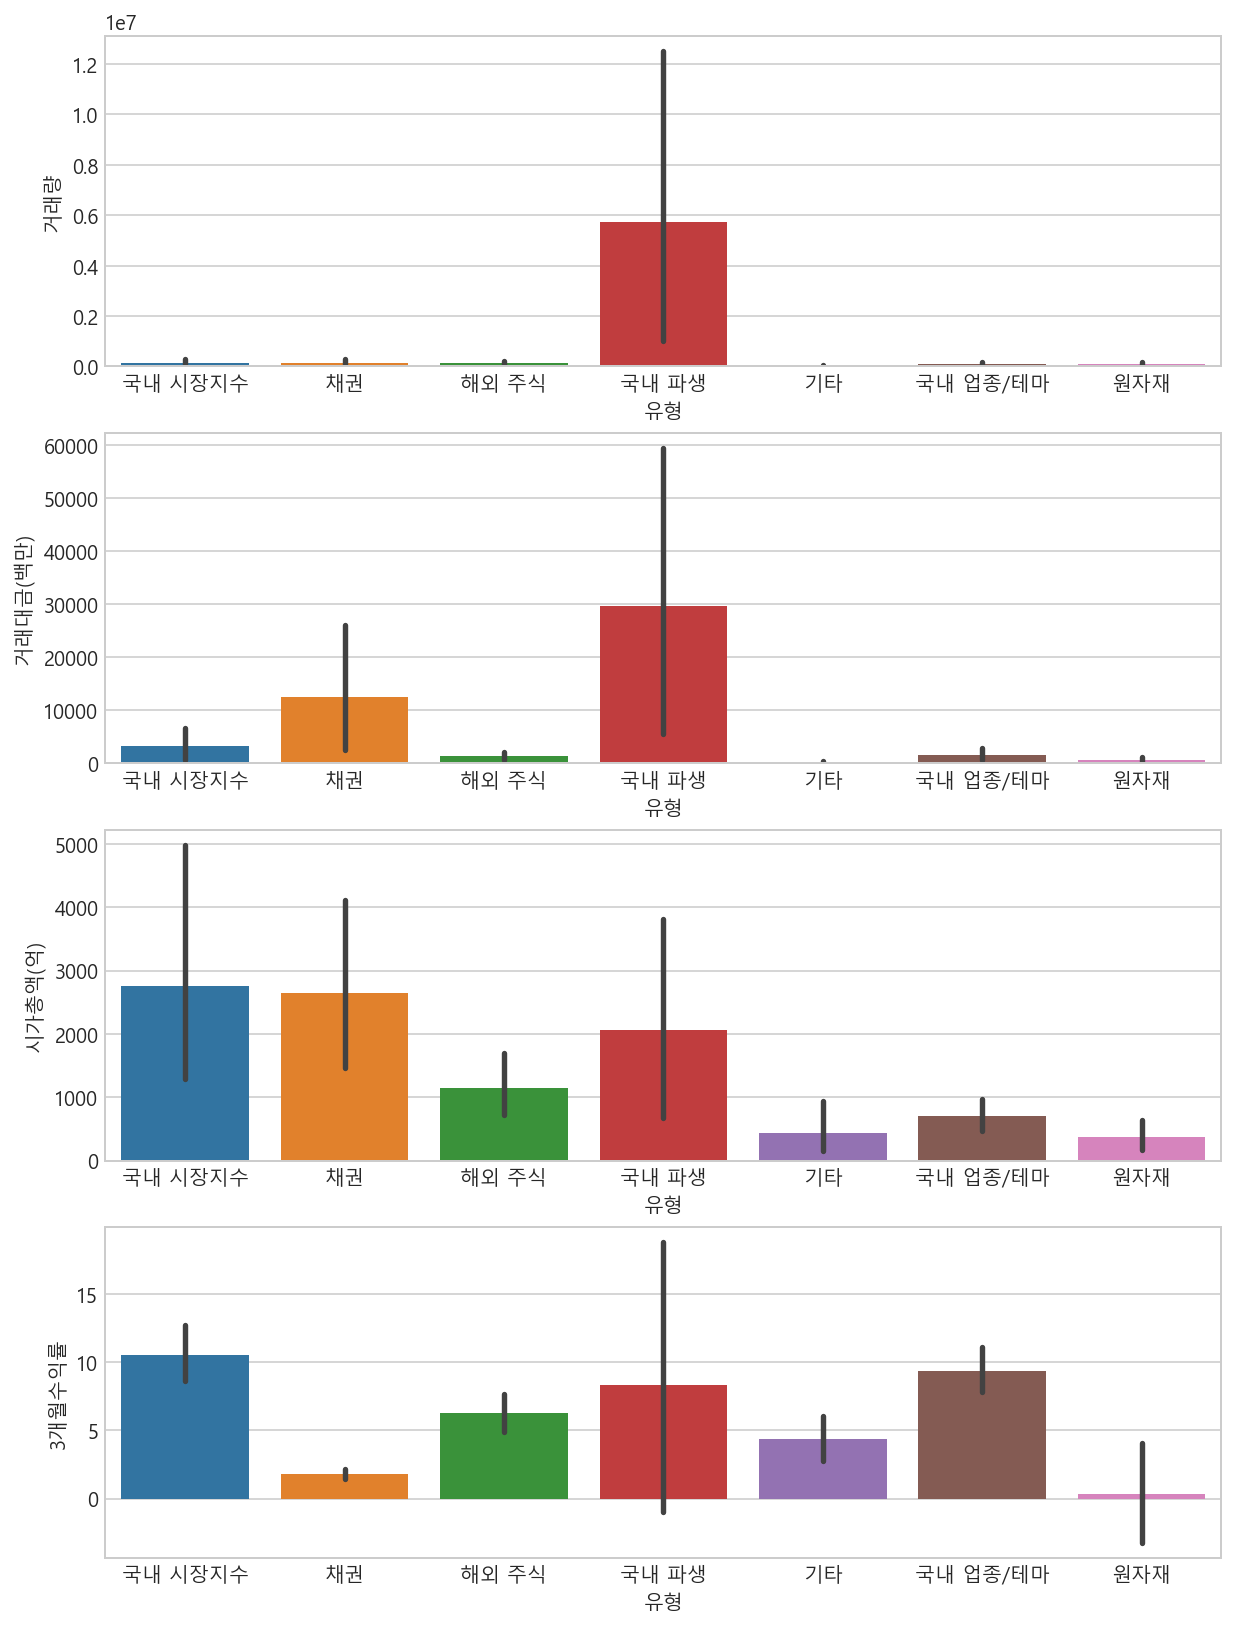

In [79]:
# 위 그래프를 직접 subplots 를 사용해 그려봅니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,14))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x="유형", y=rcol, ax=axes[i])

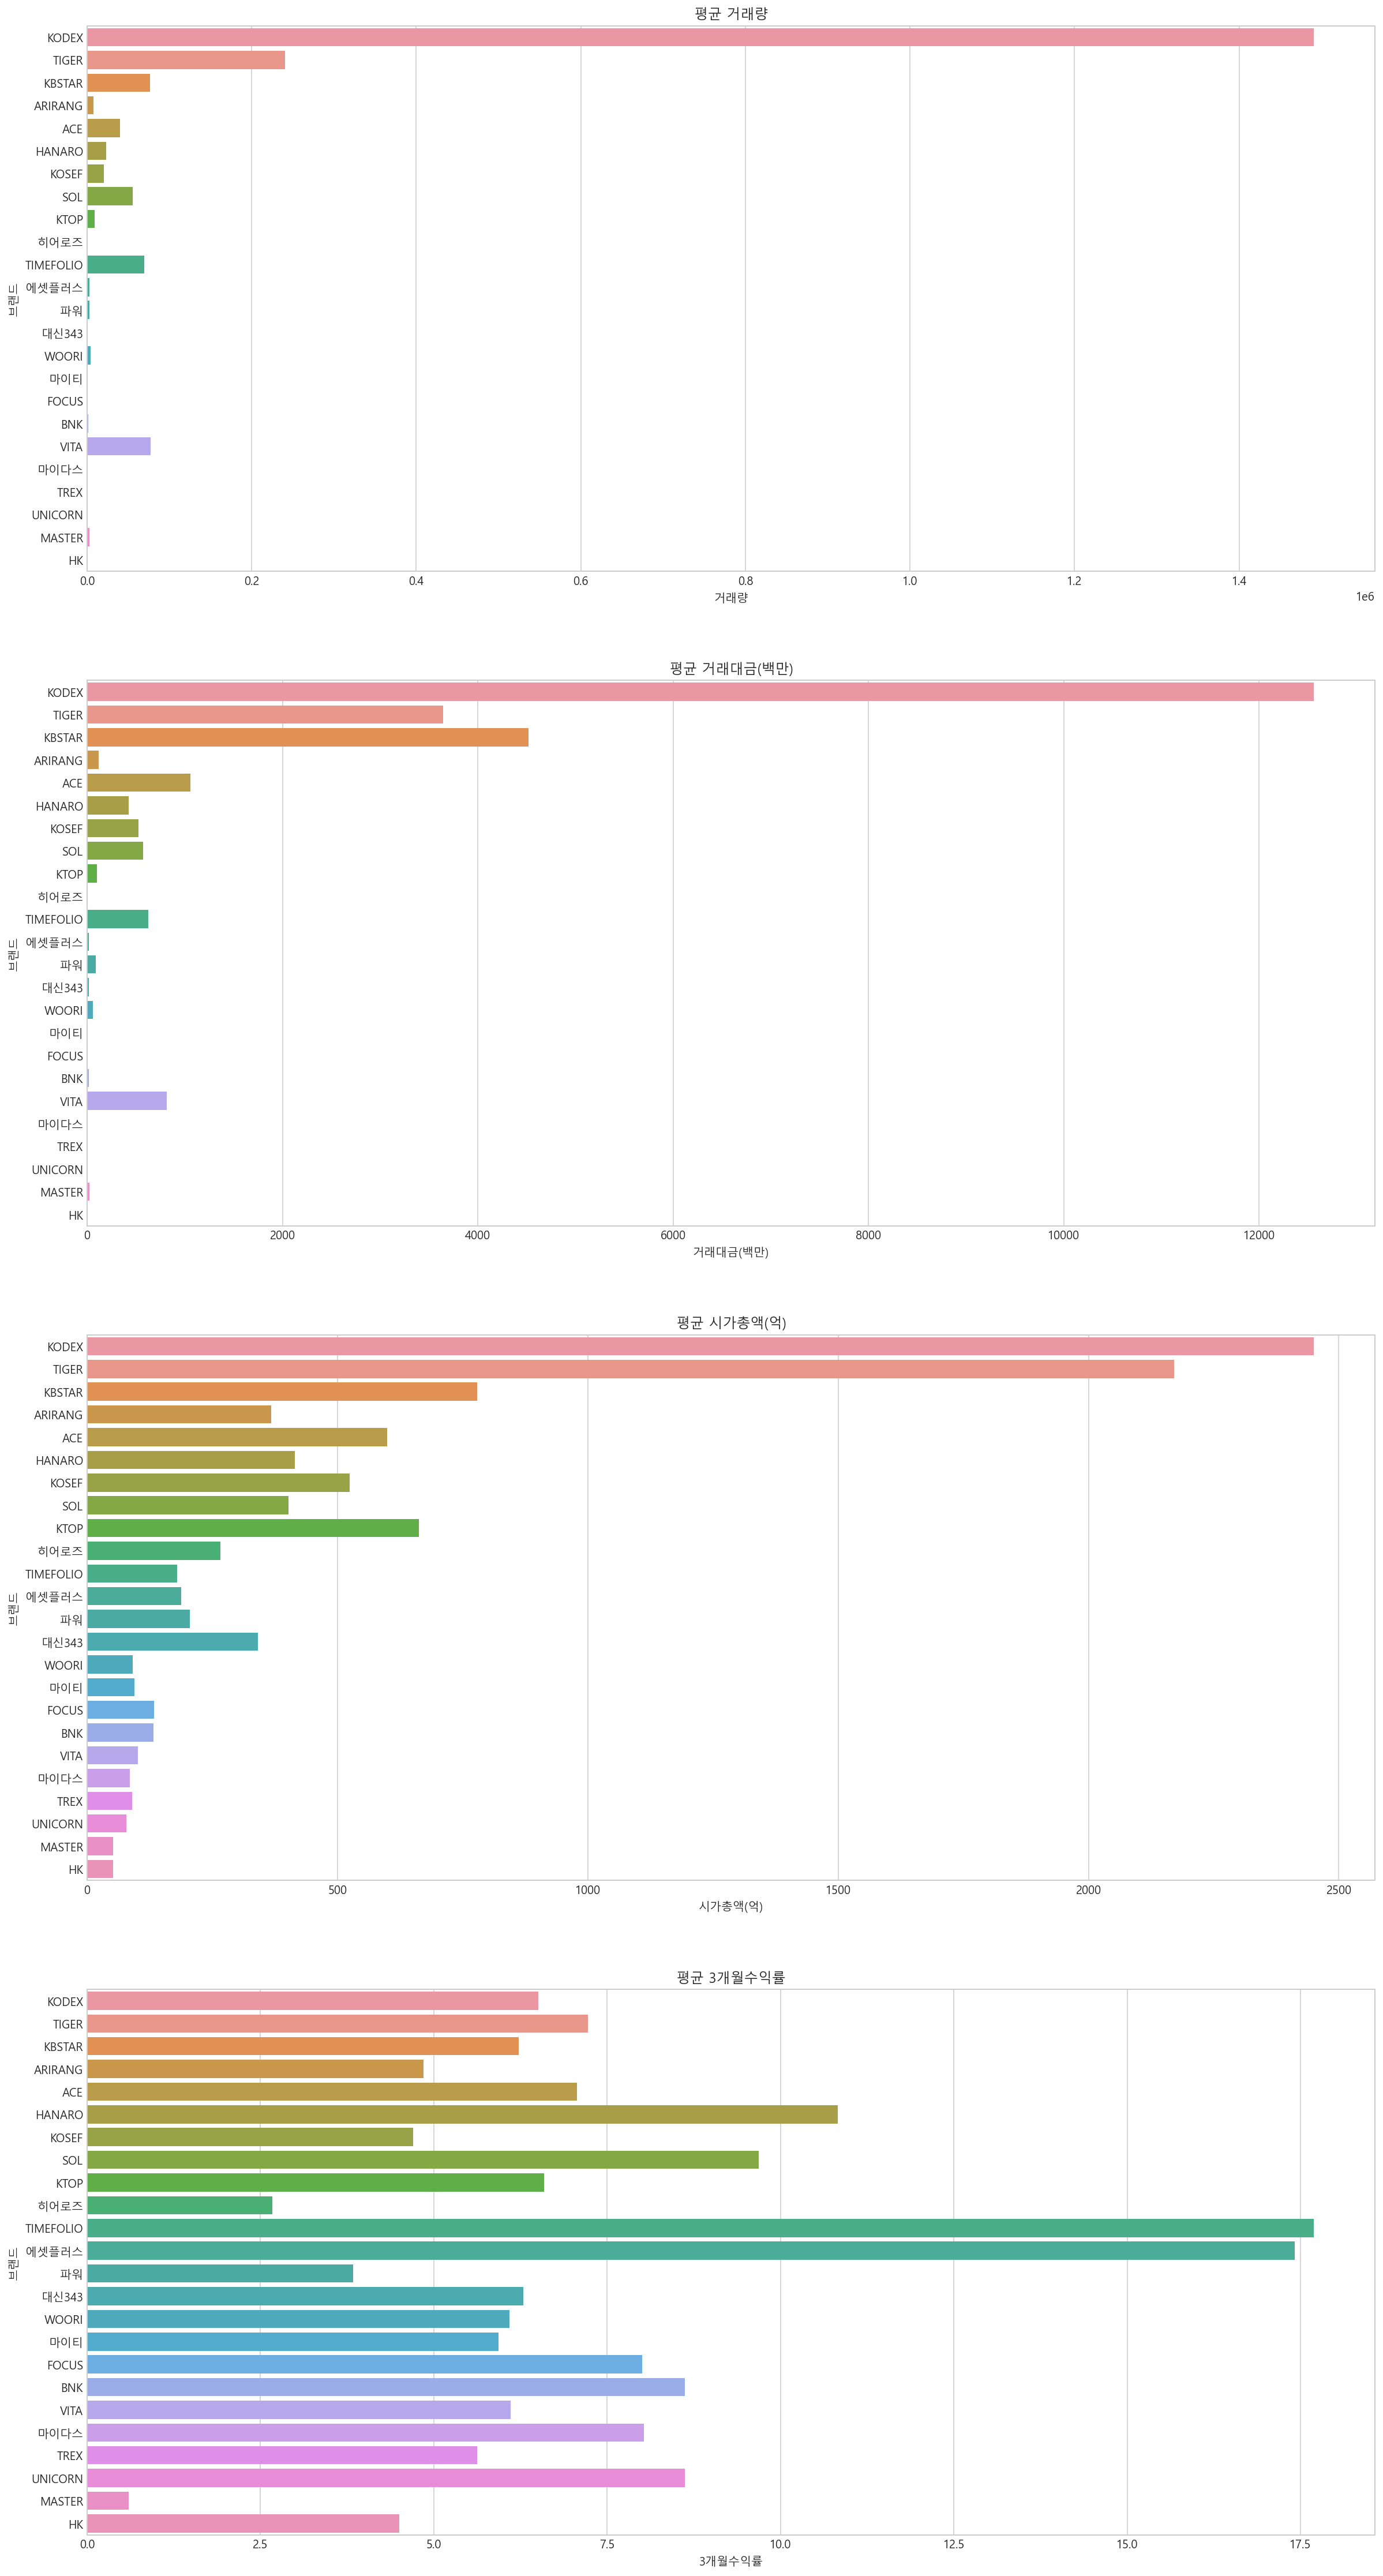

In [80]:
# 브랜드별 수치 데이터의 평균을 시각화 합니다.

fig, axes = plt.subplots(nrows=len(row_cols), figsize=(20,40))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x=rcol, y="브랜드", ax=axes[i],
               ci=None).set_title(f"평균 {rcol}")

### 브랜드별 인버스 여부에 따른 시각화

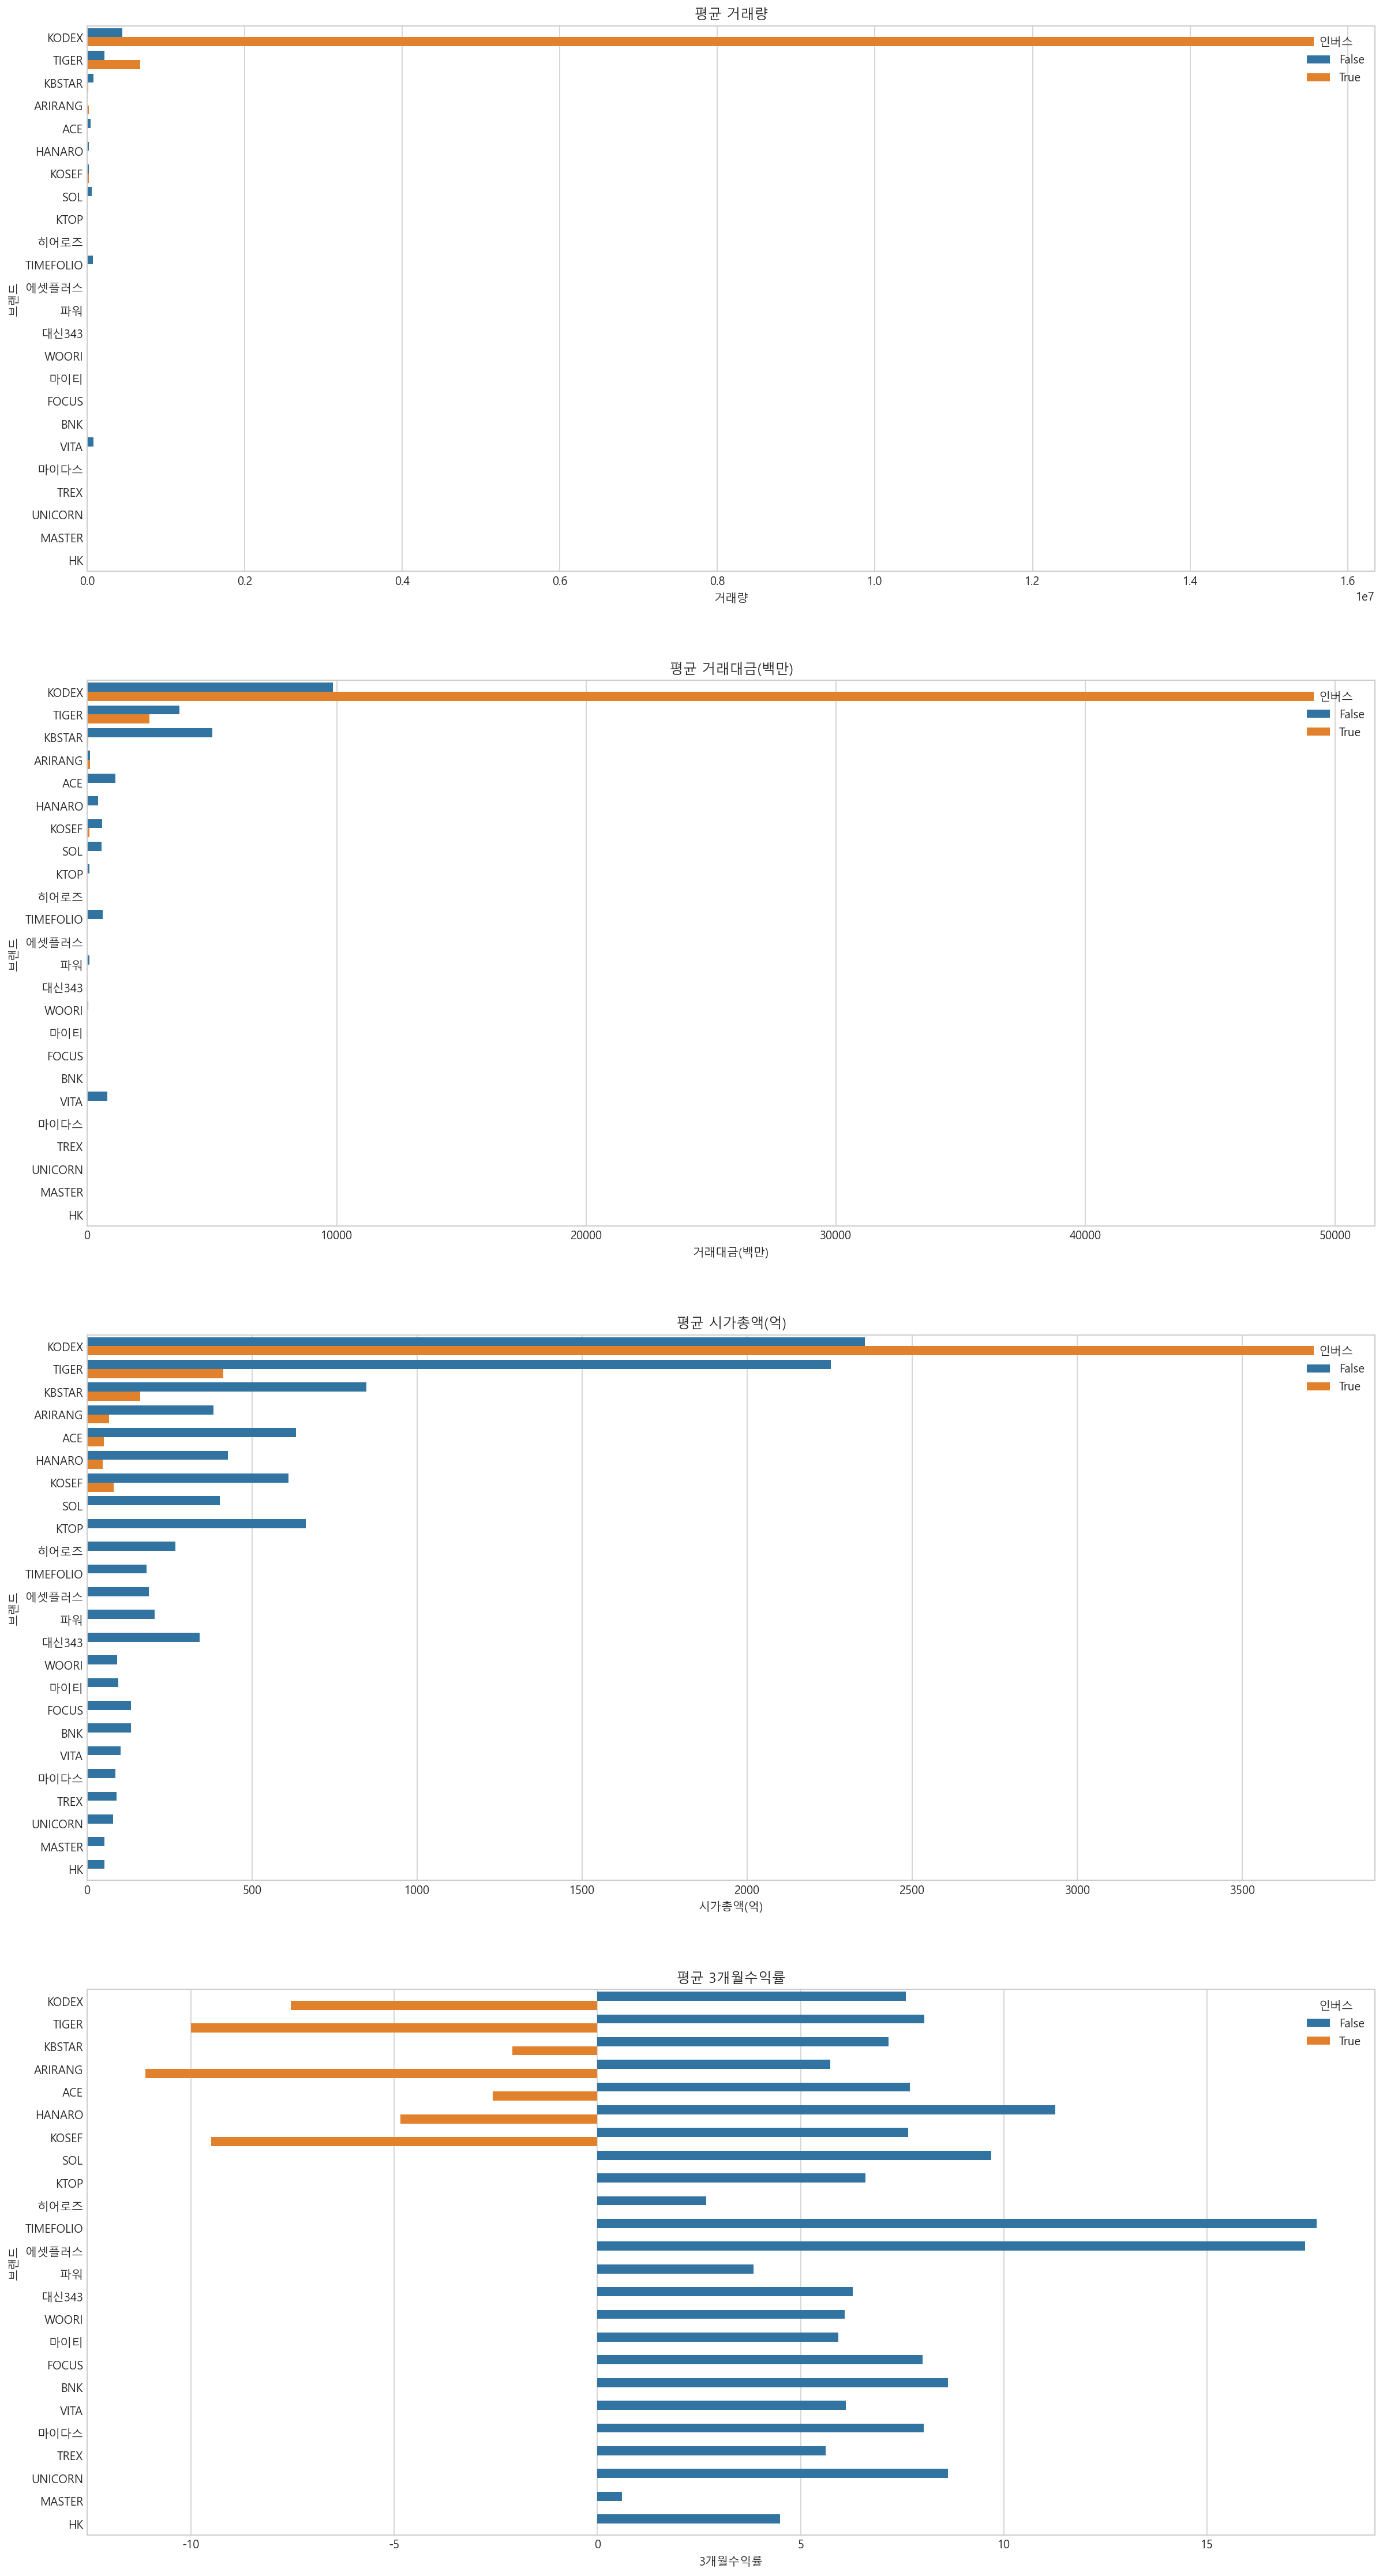

In [81]:
# subplots를 시각화 합니다. hue="인버스"를 적용해 봅니다.

fig, axes = plt.subplots(nrows=len(row_cols), figsize=(20,40))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x=rcol, y="브랜드", hue="인버스",
                ax=axes[i],
               ci=None).set_title(f"평균 {rcol}")

### 브랜드별 레버리지 여부에 따른 시각화

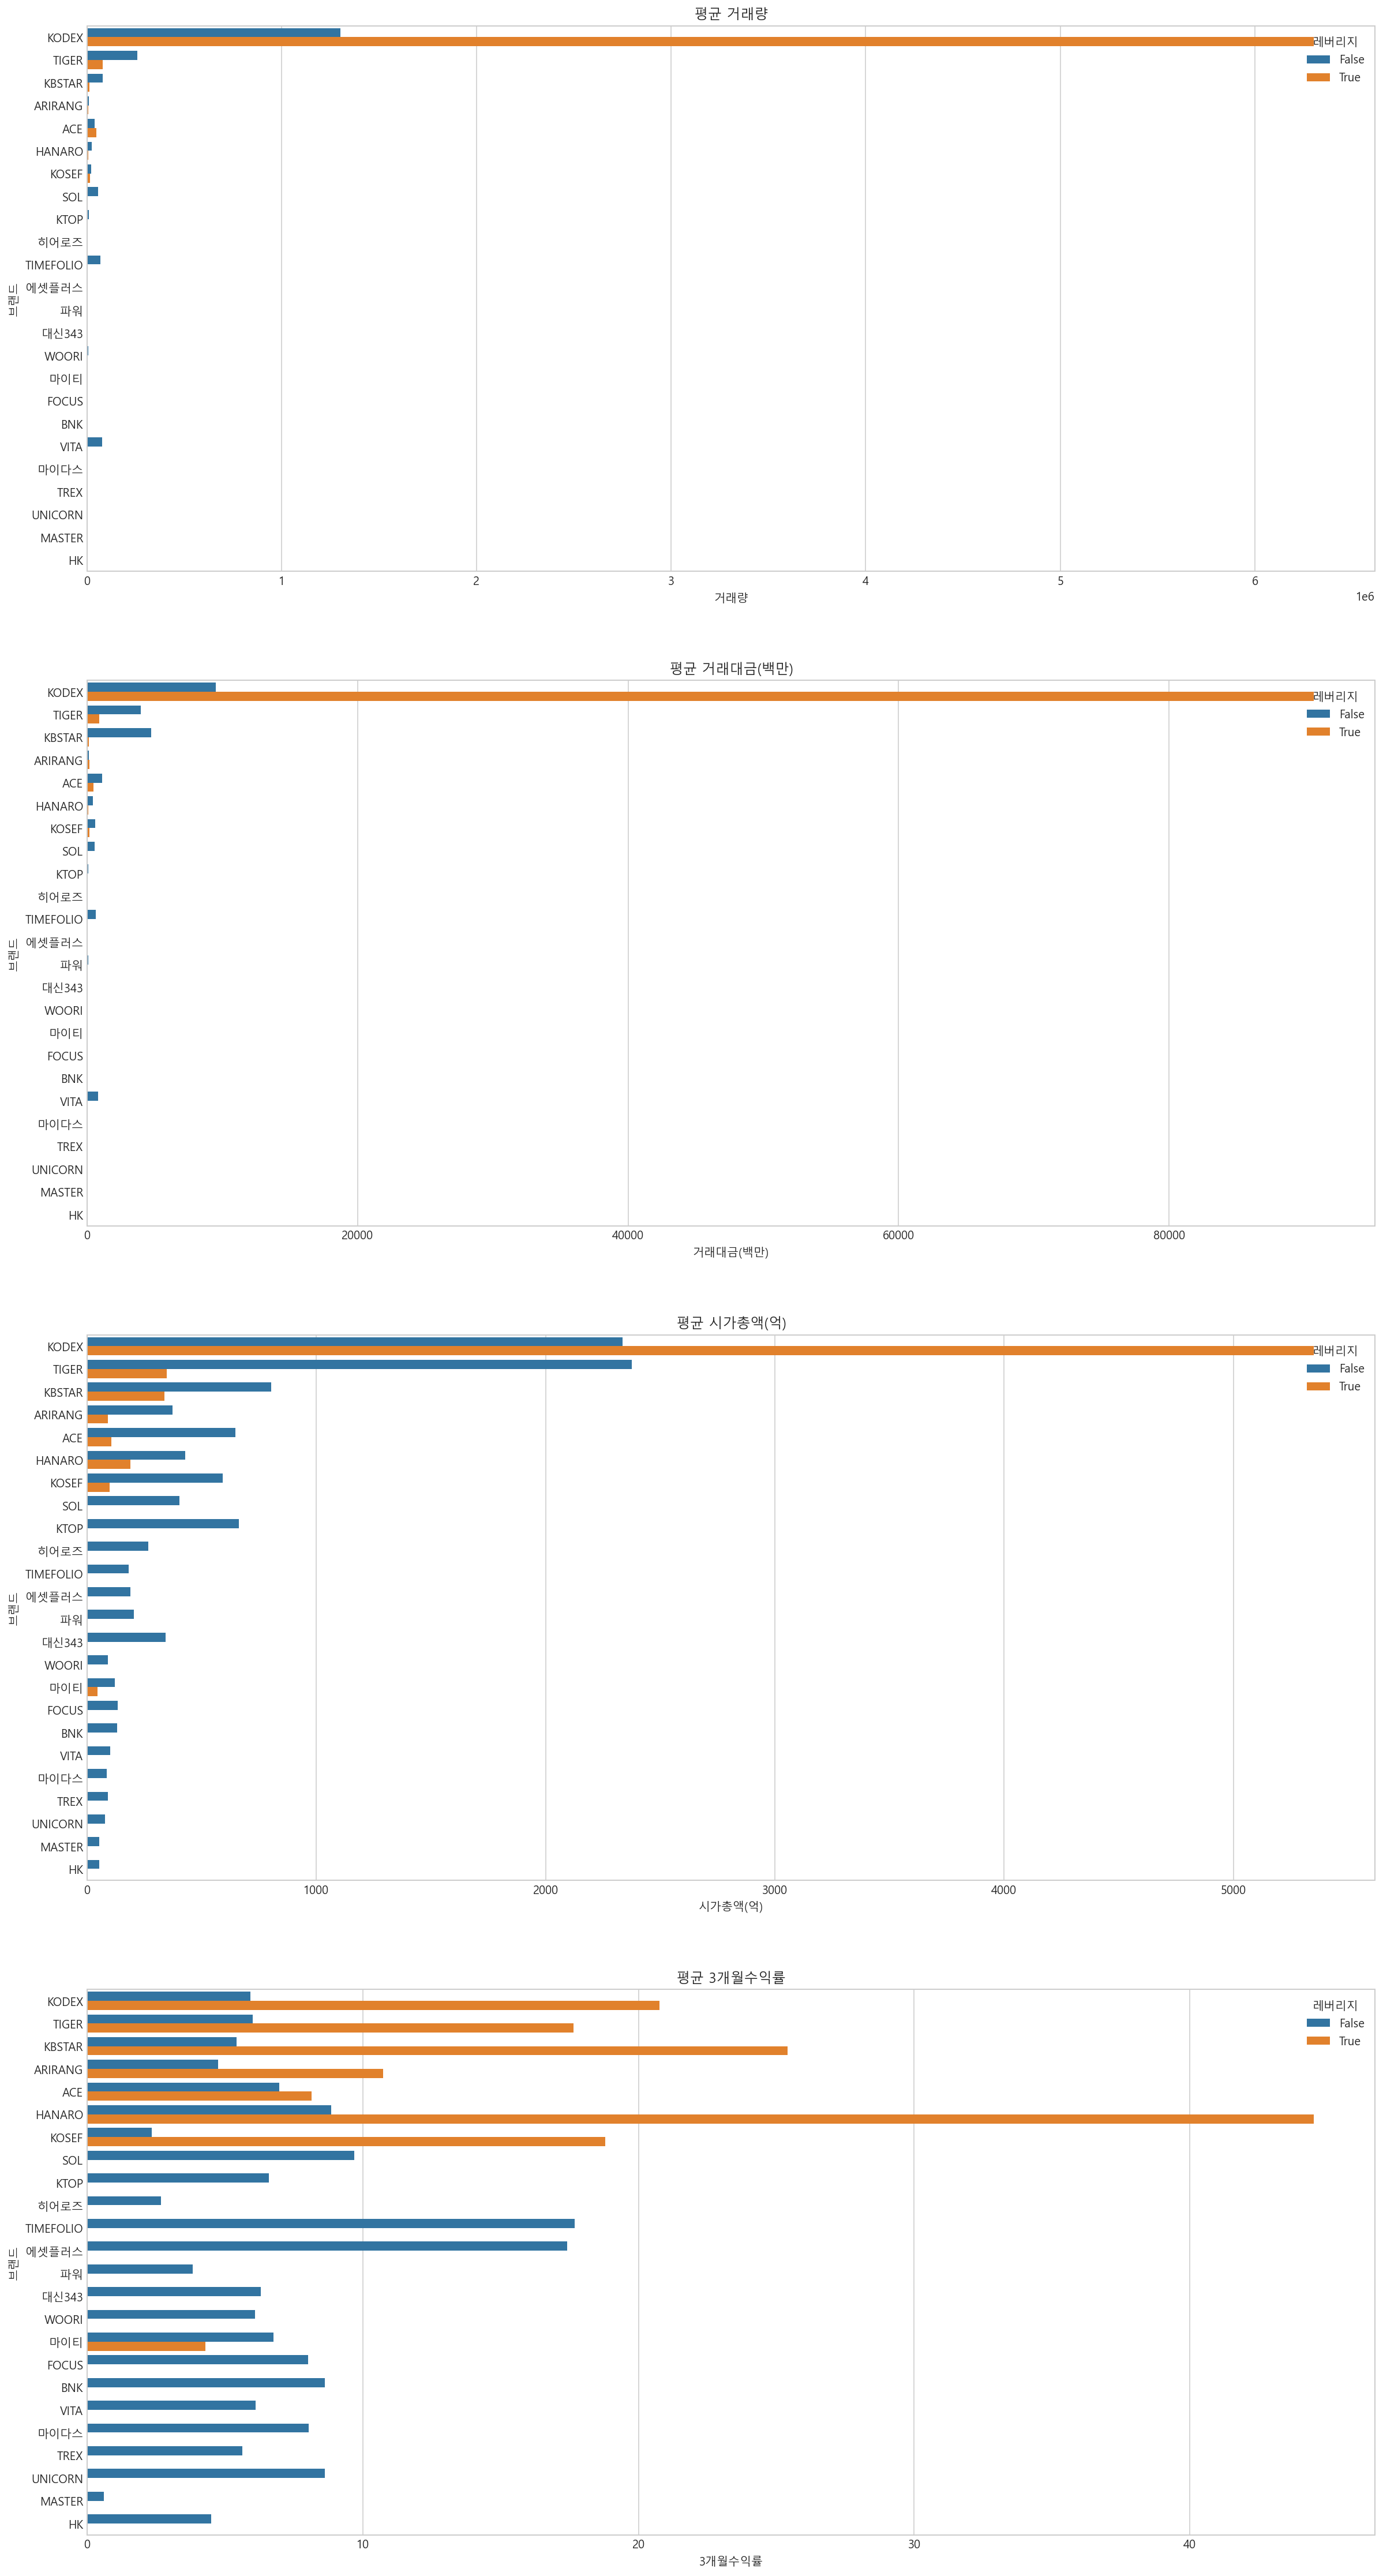

In [82]:
# subplots를 시각화 합니다. hue="레버리지"를 적용해 봅니다.

fig, axes = plt.subplots(nrows=len(row_cols), figsize=(20,40))
for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x=rcol, y="브랜드", hue="레버리지",
                ax=axes[i],
               ci=None).set_title(f"평균 {rcol}")

In [83]:
# 위에서 그린 서브플롯을 직접 groupby 로 구해봅니다.db 
gb = df.groupby(["브랜드", "인버스"])[row_cols].mean()
gb.style.background_gradient()

### 유형에 따른 3개월 수익률 boxplot 
* barplot으로 그렸을 때 보이지 않던 데이터의 빈도수와 데이터의 분포를 확인할 수 있습니다.


<AxesSubplot:xlabel='유형', ylabel='3개월수익률'>

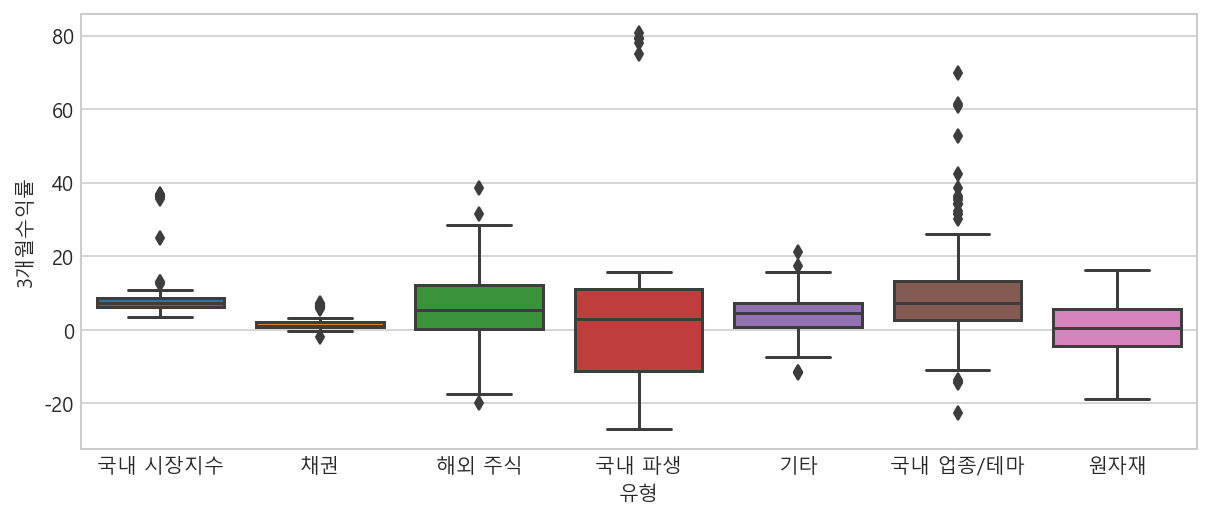

In [84]:
# boxplot 으로 x축에 "유형" y축에 "3개월수익률" 을 그려봅니다.
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="유형",y="3개월수익률")

In [85]:
# boxplot의 유형에 따른 3개월 수익률에 대한 기술통계 값을 구합니다.
df.groupby("유형")["3개월수익률"].describe()

count       mean        std      min        25%      50%        75%  \
유형                                                                              
국내 시장지수    69.0  10.526888   9.181373   3.4548   6.252800  7.35620   8.651600   
국내 업종/테마  218.0   9.346285  12.140150 -22.5328   2.769200  7.20095  13.292075   
국내 파생      37.0   8.297616  30.784156 -26.9027 -11.167600  3.02240  11.023900   
기타         68.0   4.394428   6.956877 -11.7913   0.903550  4.56950   7.388525   
원자재        18.0   0.324678   8.205308 -18.7628  -4.431275  0.42730   5.558000   
채권         85.0   1.780811   1.857023  -2.0083   0.874900  1.11120   2.056100   
해외 주식     173.0   6.270875   9.373597 -19.9404   0.113900  5.28240  12.084400   

              max  
유형                 
국내 시장지수   36.9130  
국내 업종/테마  69.7859  
국내 파생     80.5750  
기타        21.2044  
원자재       16.2763  
채권         7.3506  
해외 주식     38.6346

### subplots 로 유형에 대한 boxplot 그리기

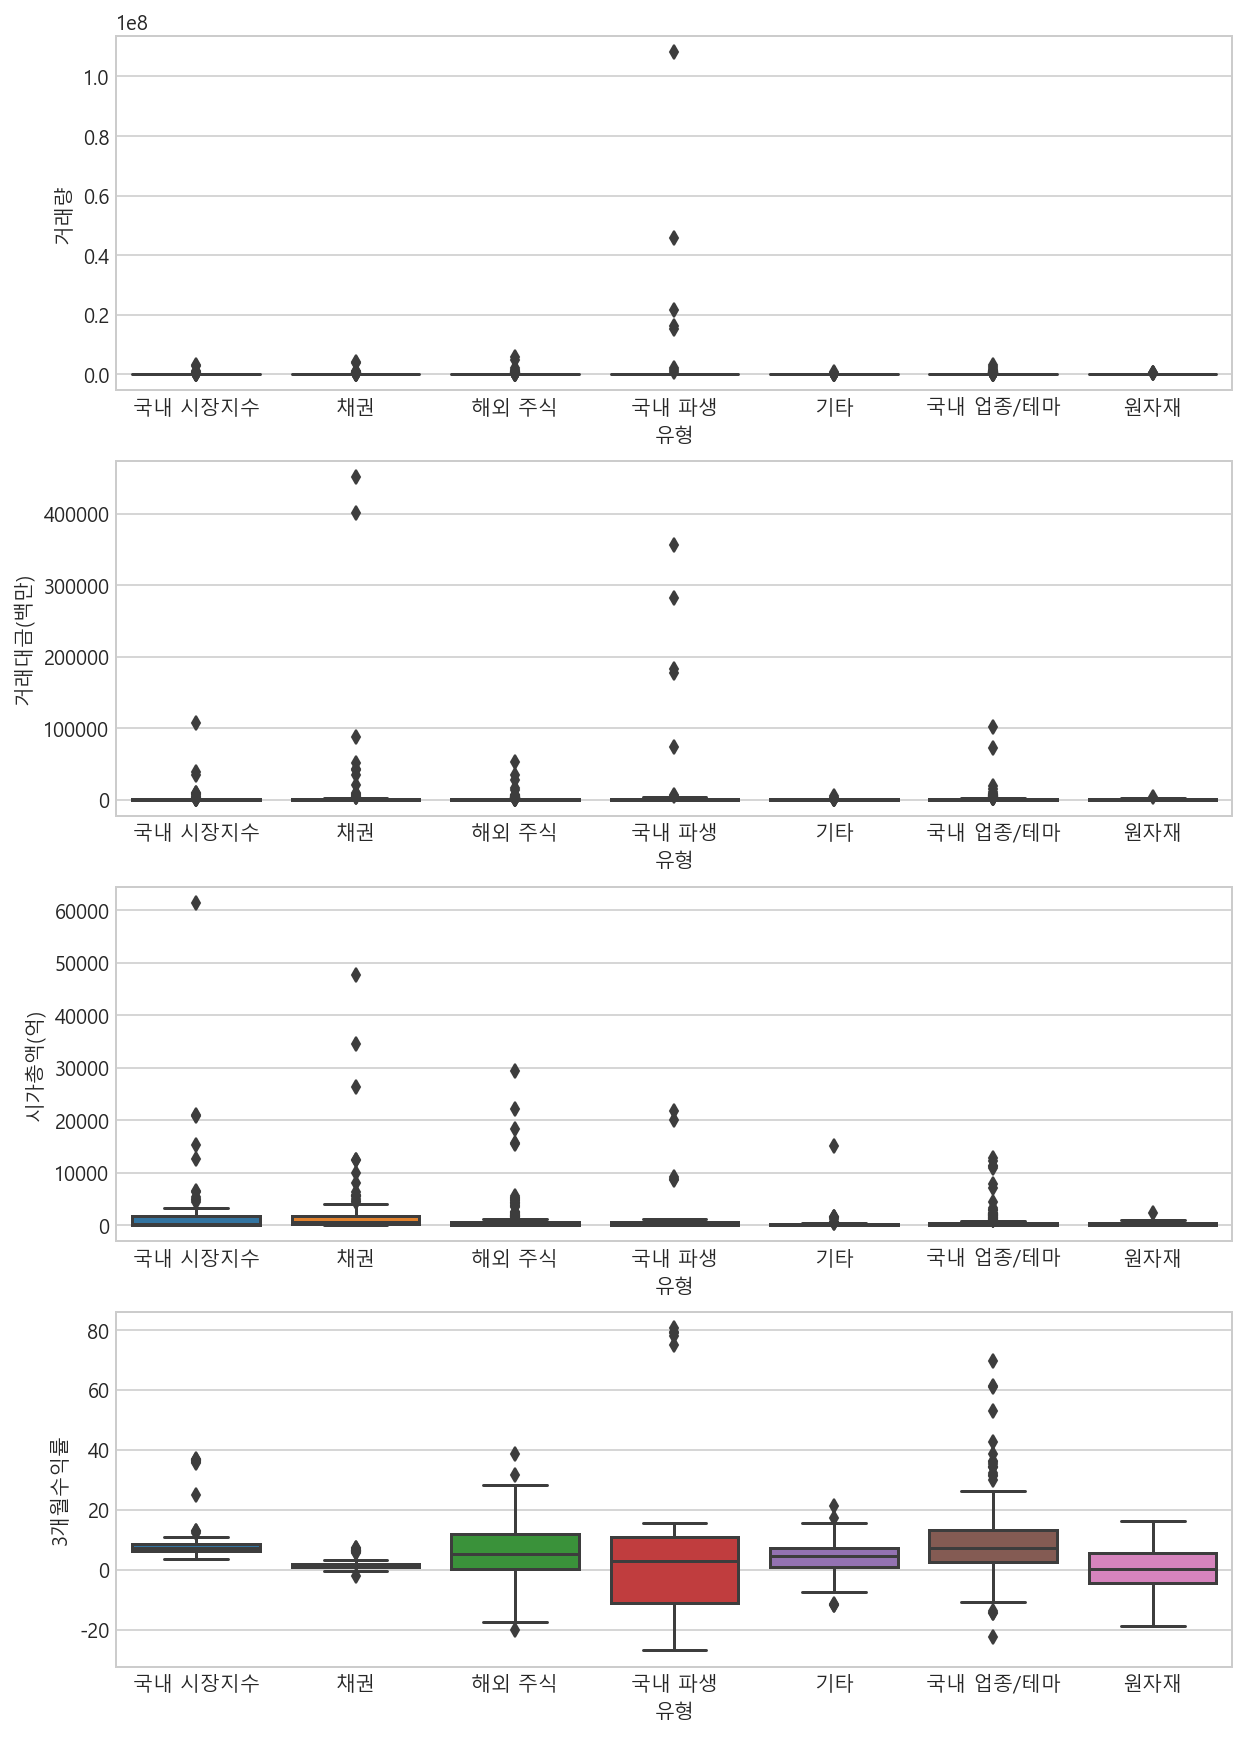

In [86]:
# subplots 를 통한 유형에 따른 수치데이터의 평균값 구하기
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,15))
for i, rcol in enumerate(row_cols):
    sns.boxplot(data=df, x="유형", y=rcol, ax=axes[i])

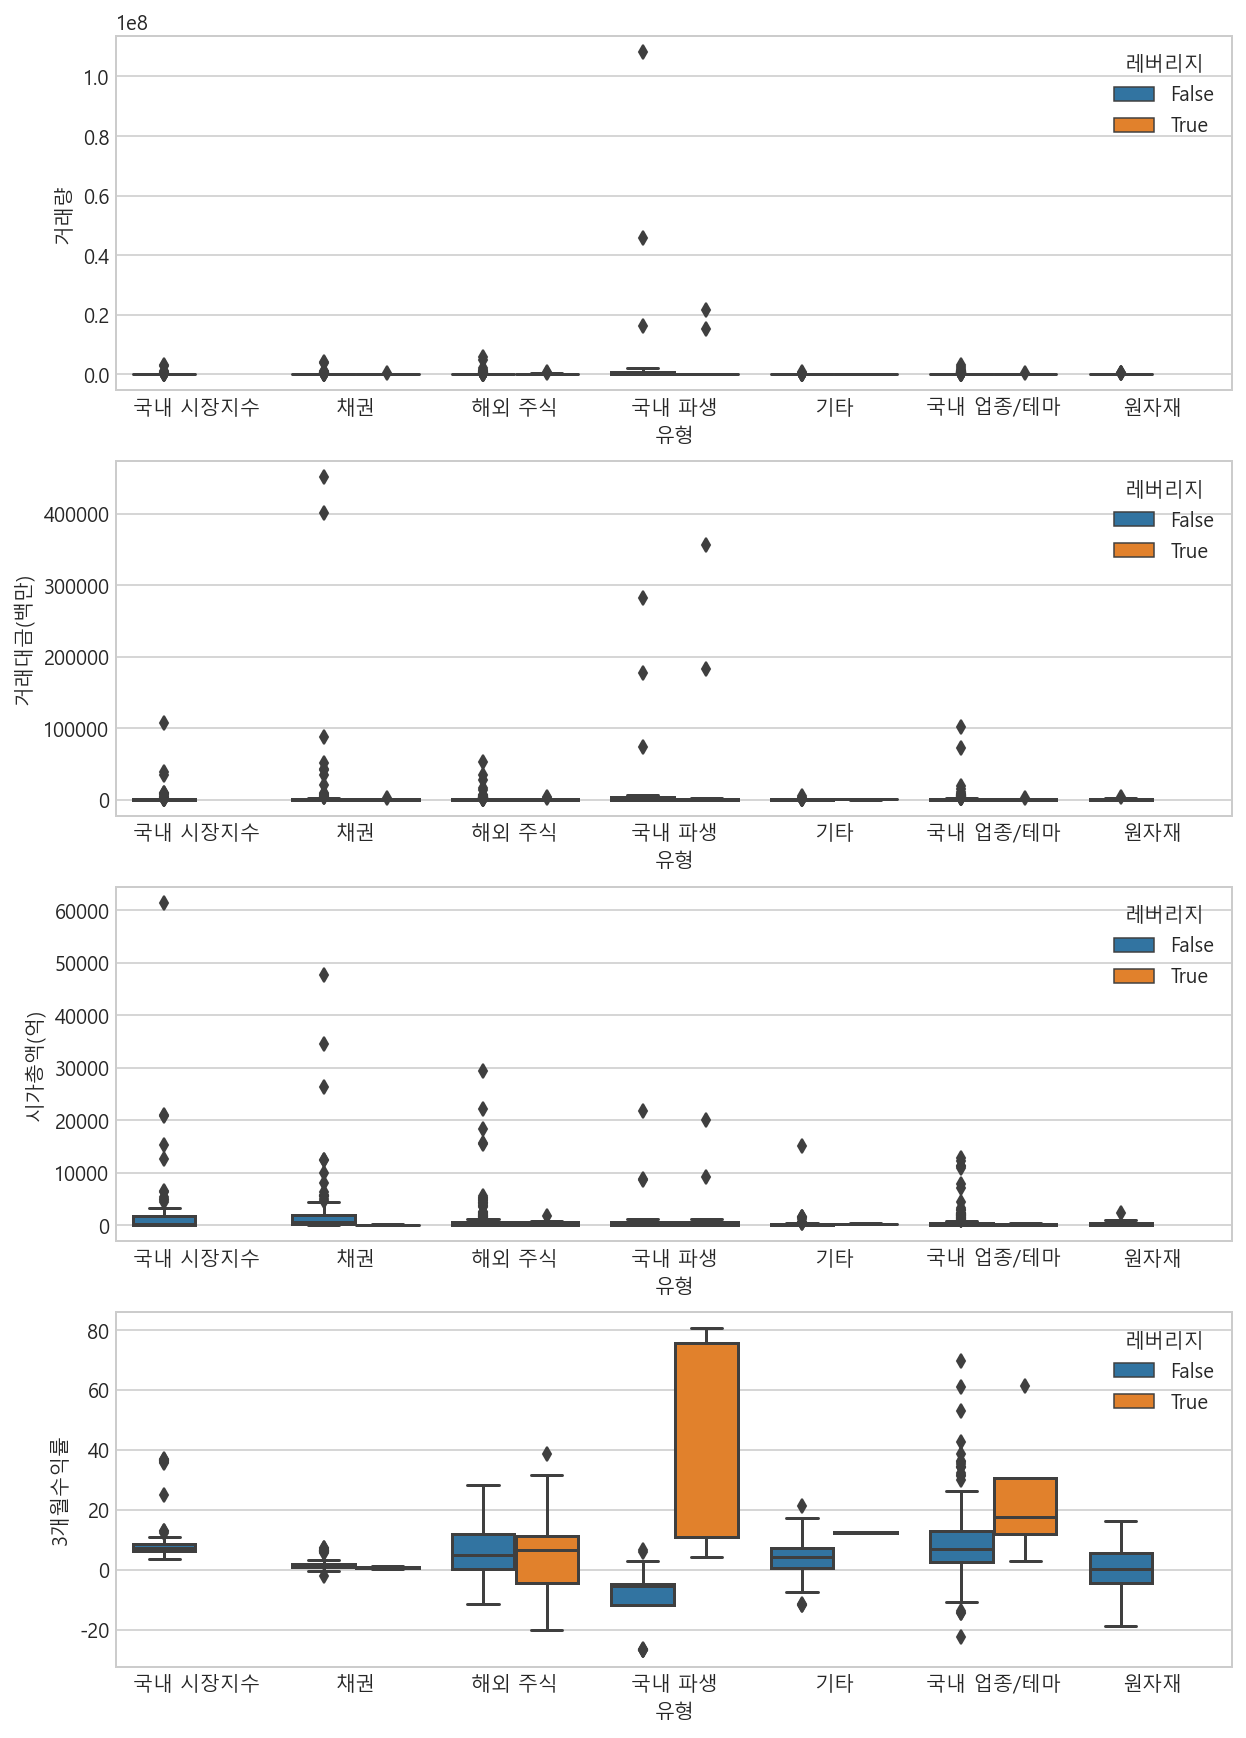

In [87]:
# hue="레버리지" 를 추가해서 그립니다.
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,15))
for i, rcol in enumerate(row_cols):
    sns.boxplot(data=df, x="유형", y=rcol,
                hue = "레버리지", ax=axes[i])

### subplots 로 유형에 대한  violinplot 그리기
* boxplot으로 그렸을 때 박스 안의 분포를 좀 더 자세히 그려줍니다.

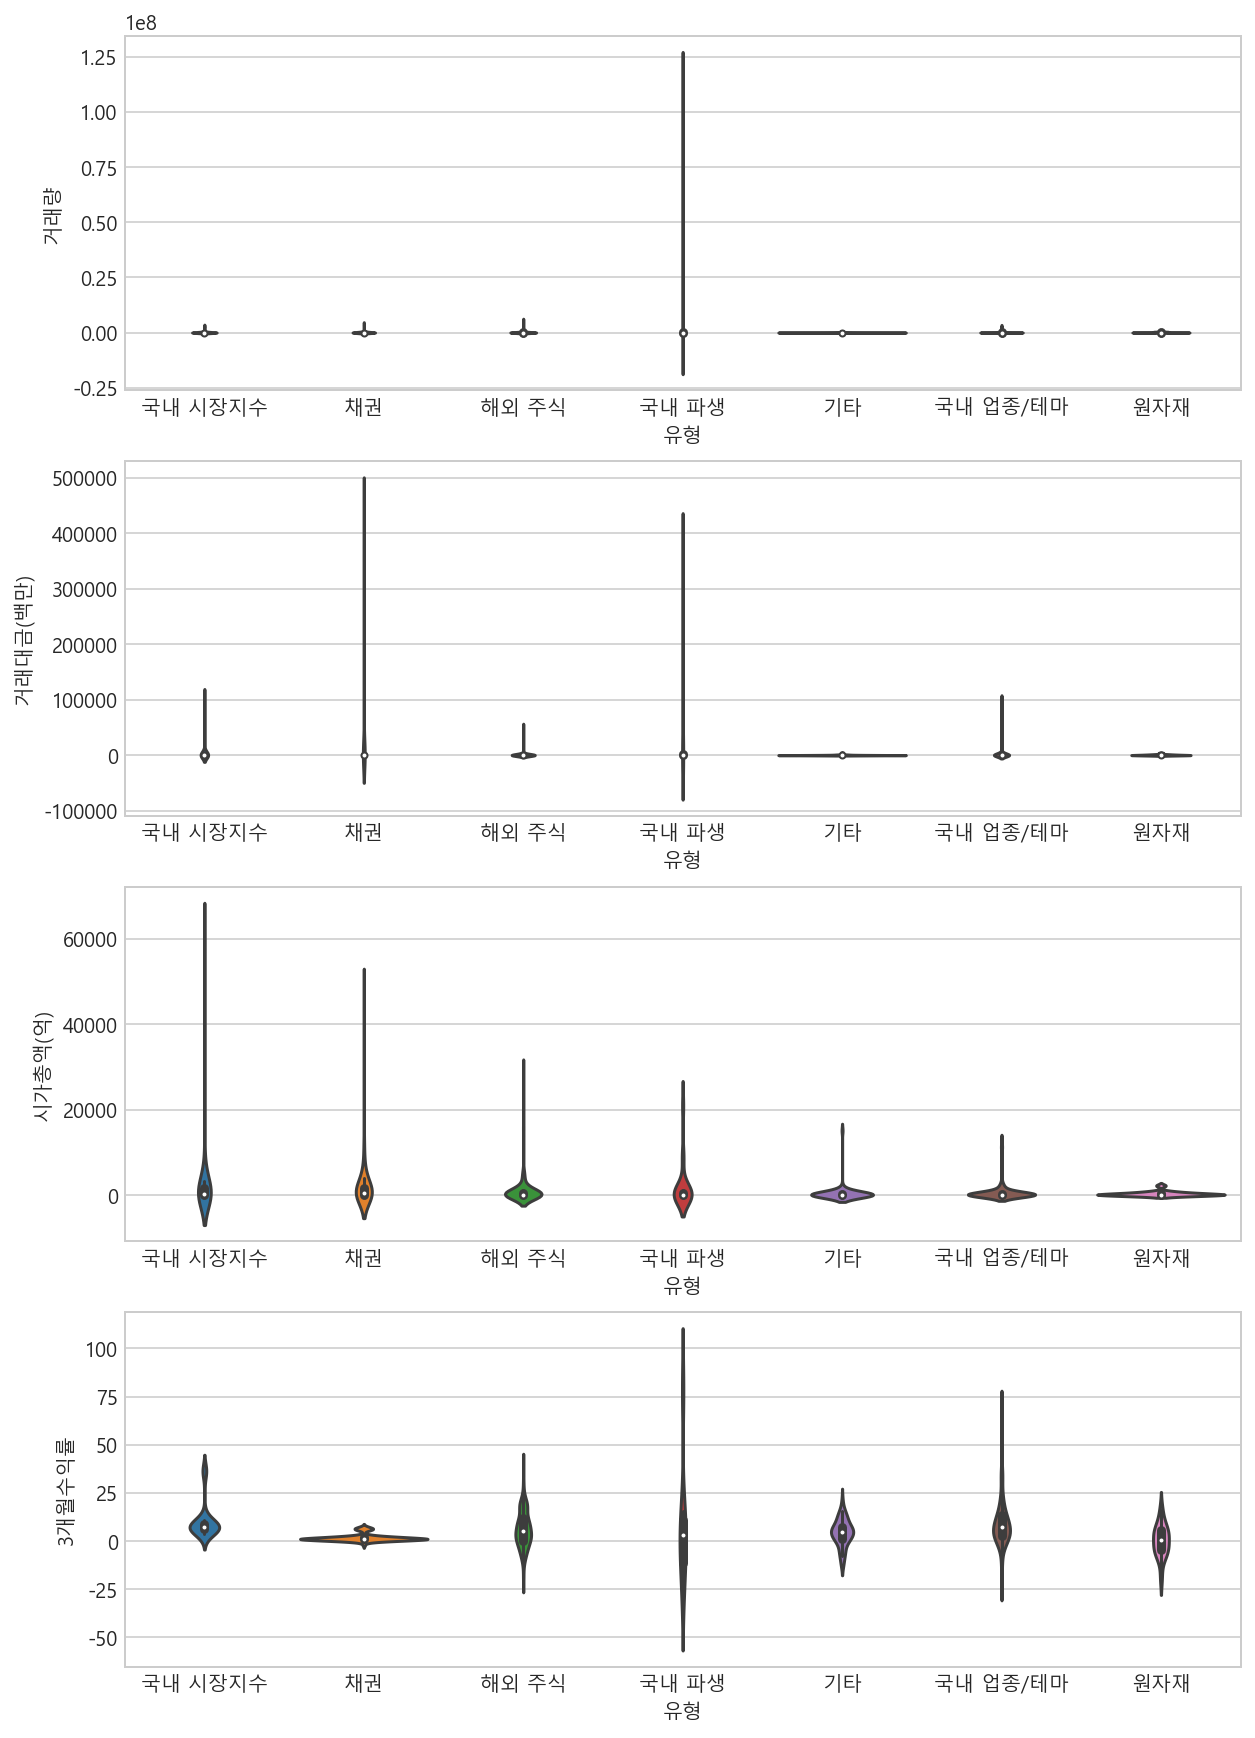

In [88]:
# 유형에 따른 violinplot 
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,15))
for i, rcol in enumerate(row_cols):
    sns.violinplot(data=df, x="유형", y=rcol,
                 ax=axes[i])

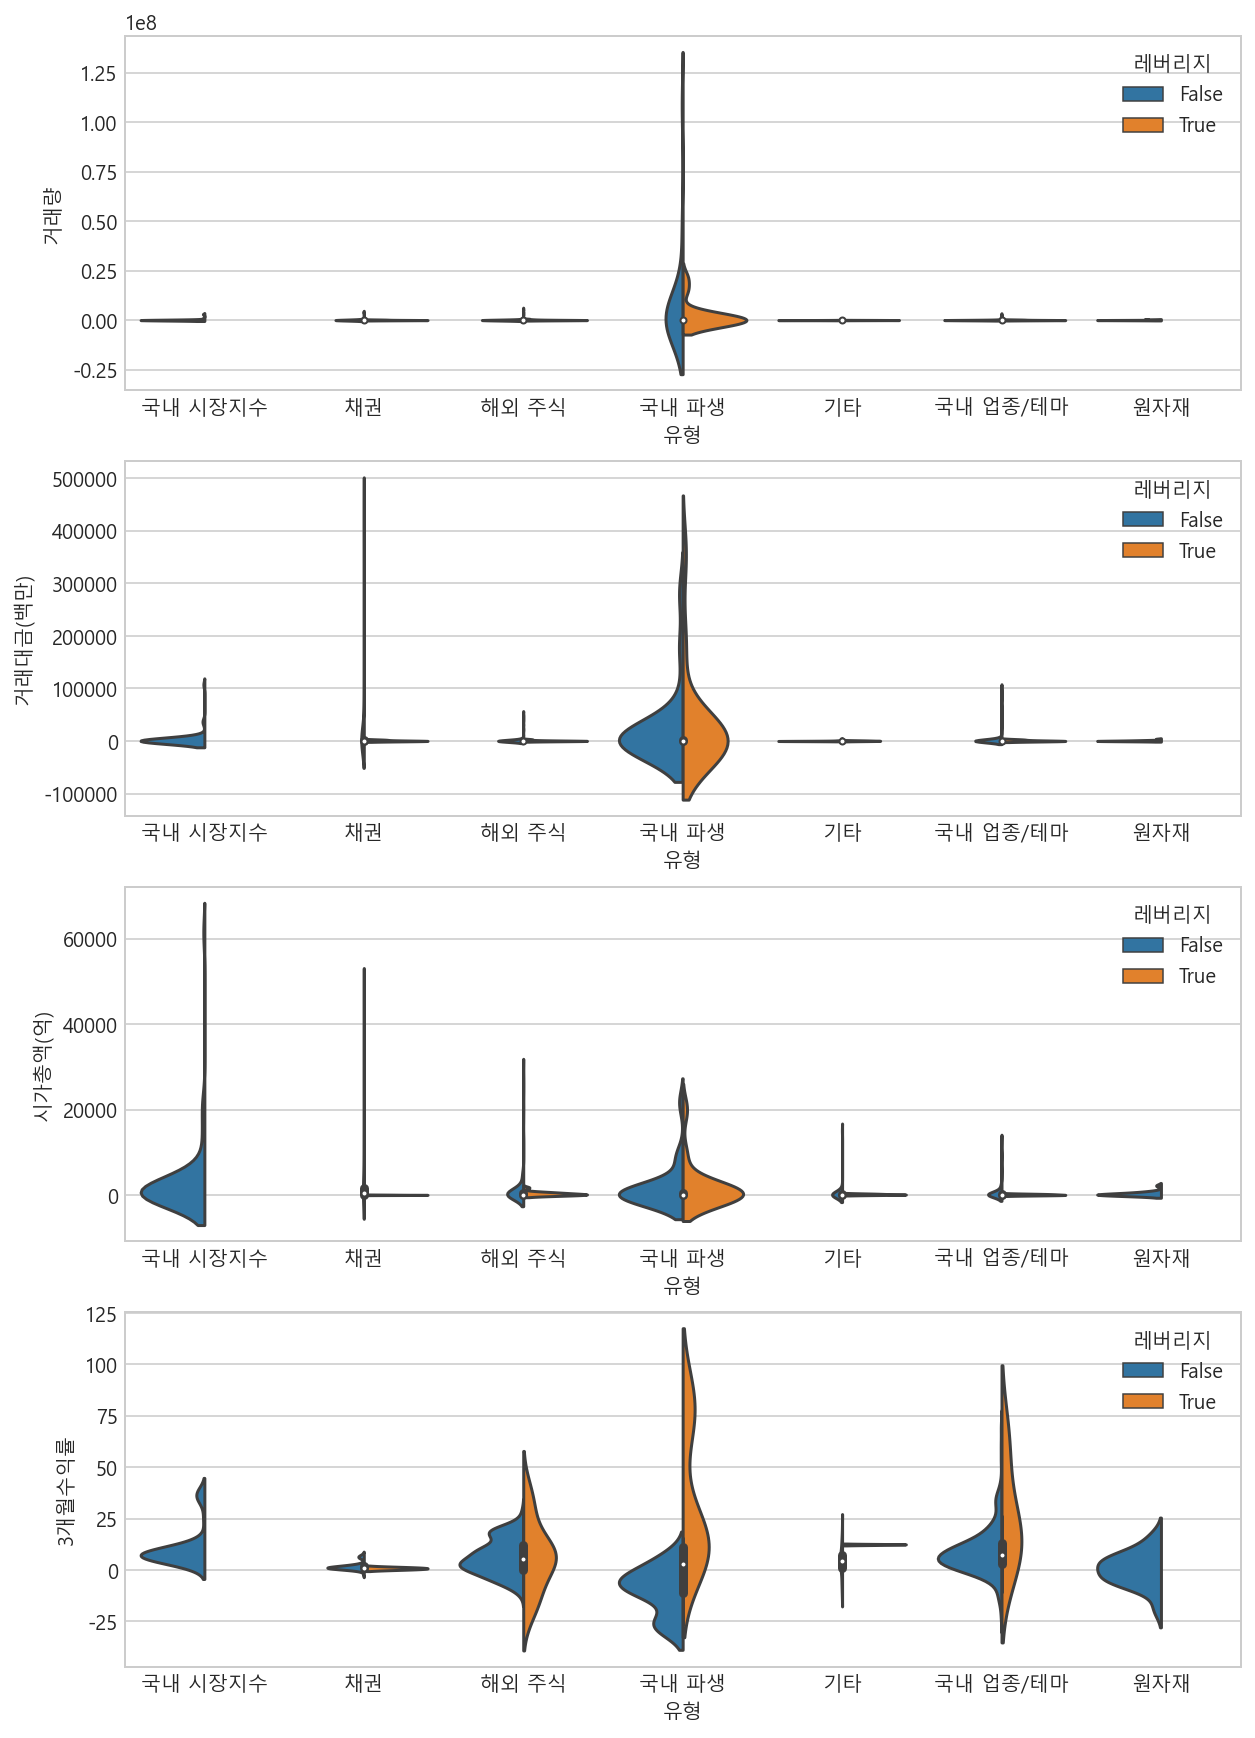

In [89]:
# 유형에 따른 violinplot 에 hue="레버리지" 적용하기
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,15))
for i, rcol in enumerate(row_cols):
    sns.violinplot(data=df, x="유형", y=rcol,
                hue = "레버리지", ax=axes[i], split=True)

### PairGrid 를 통해 여러 변수의 violinplot 그리기

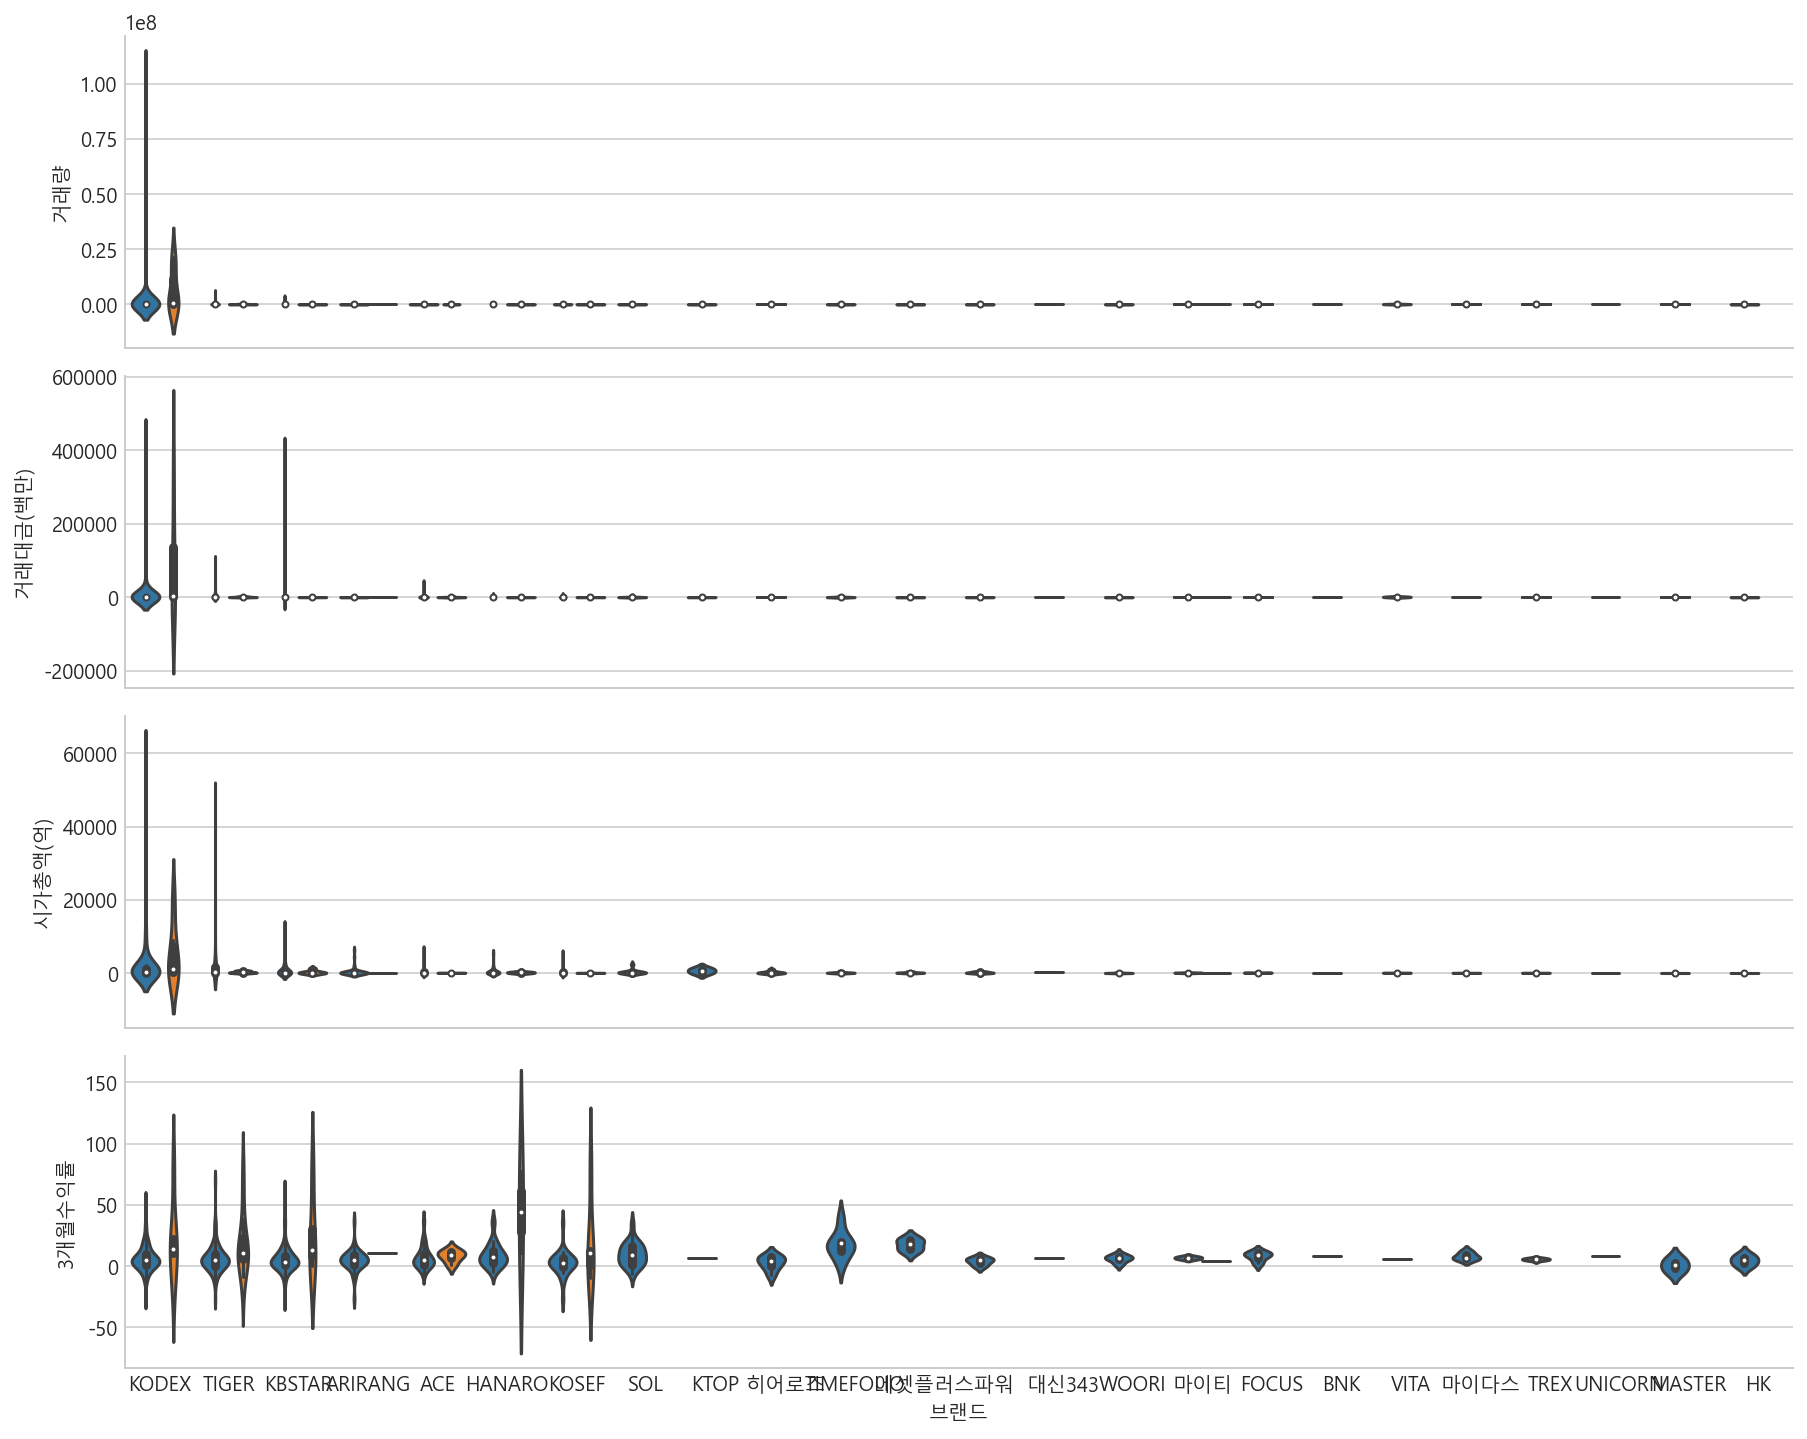

In [90]:
# 브랜드에 따른 여러 수치변수의 violinplot 를 PairGrid로 그리기
g = sns.PairGrid(data=df, x_vars="브랜드", y_vars=row_cols, aspect=5,
                hue = "레버리지")
g.map(sns.violinplot)

### subplots 로 브랜드에 대한 boxplot 그리기

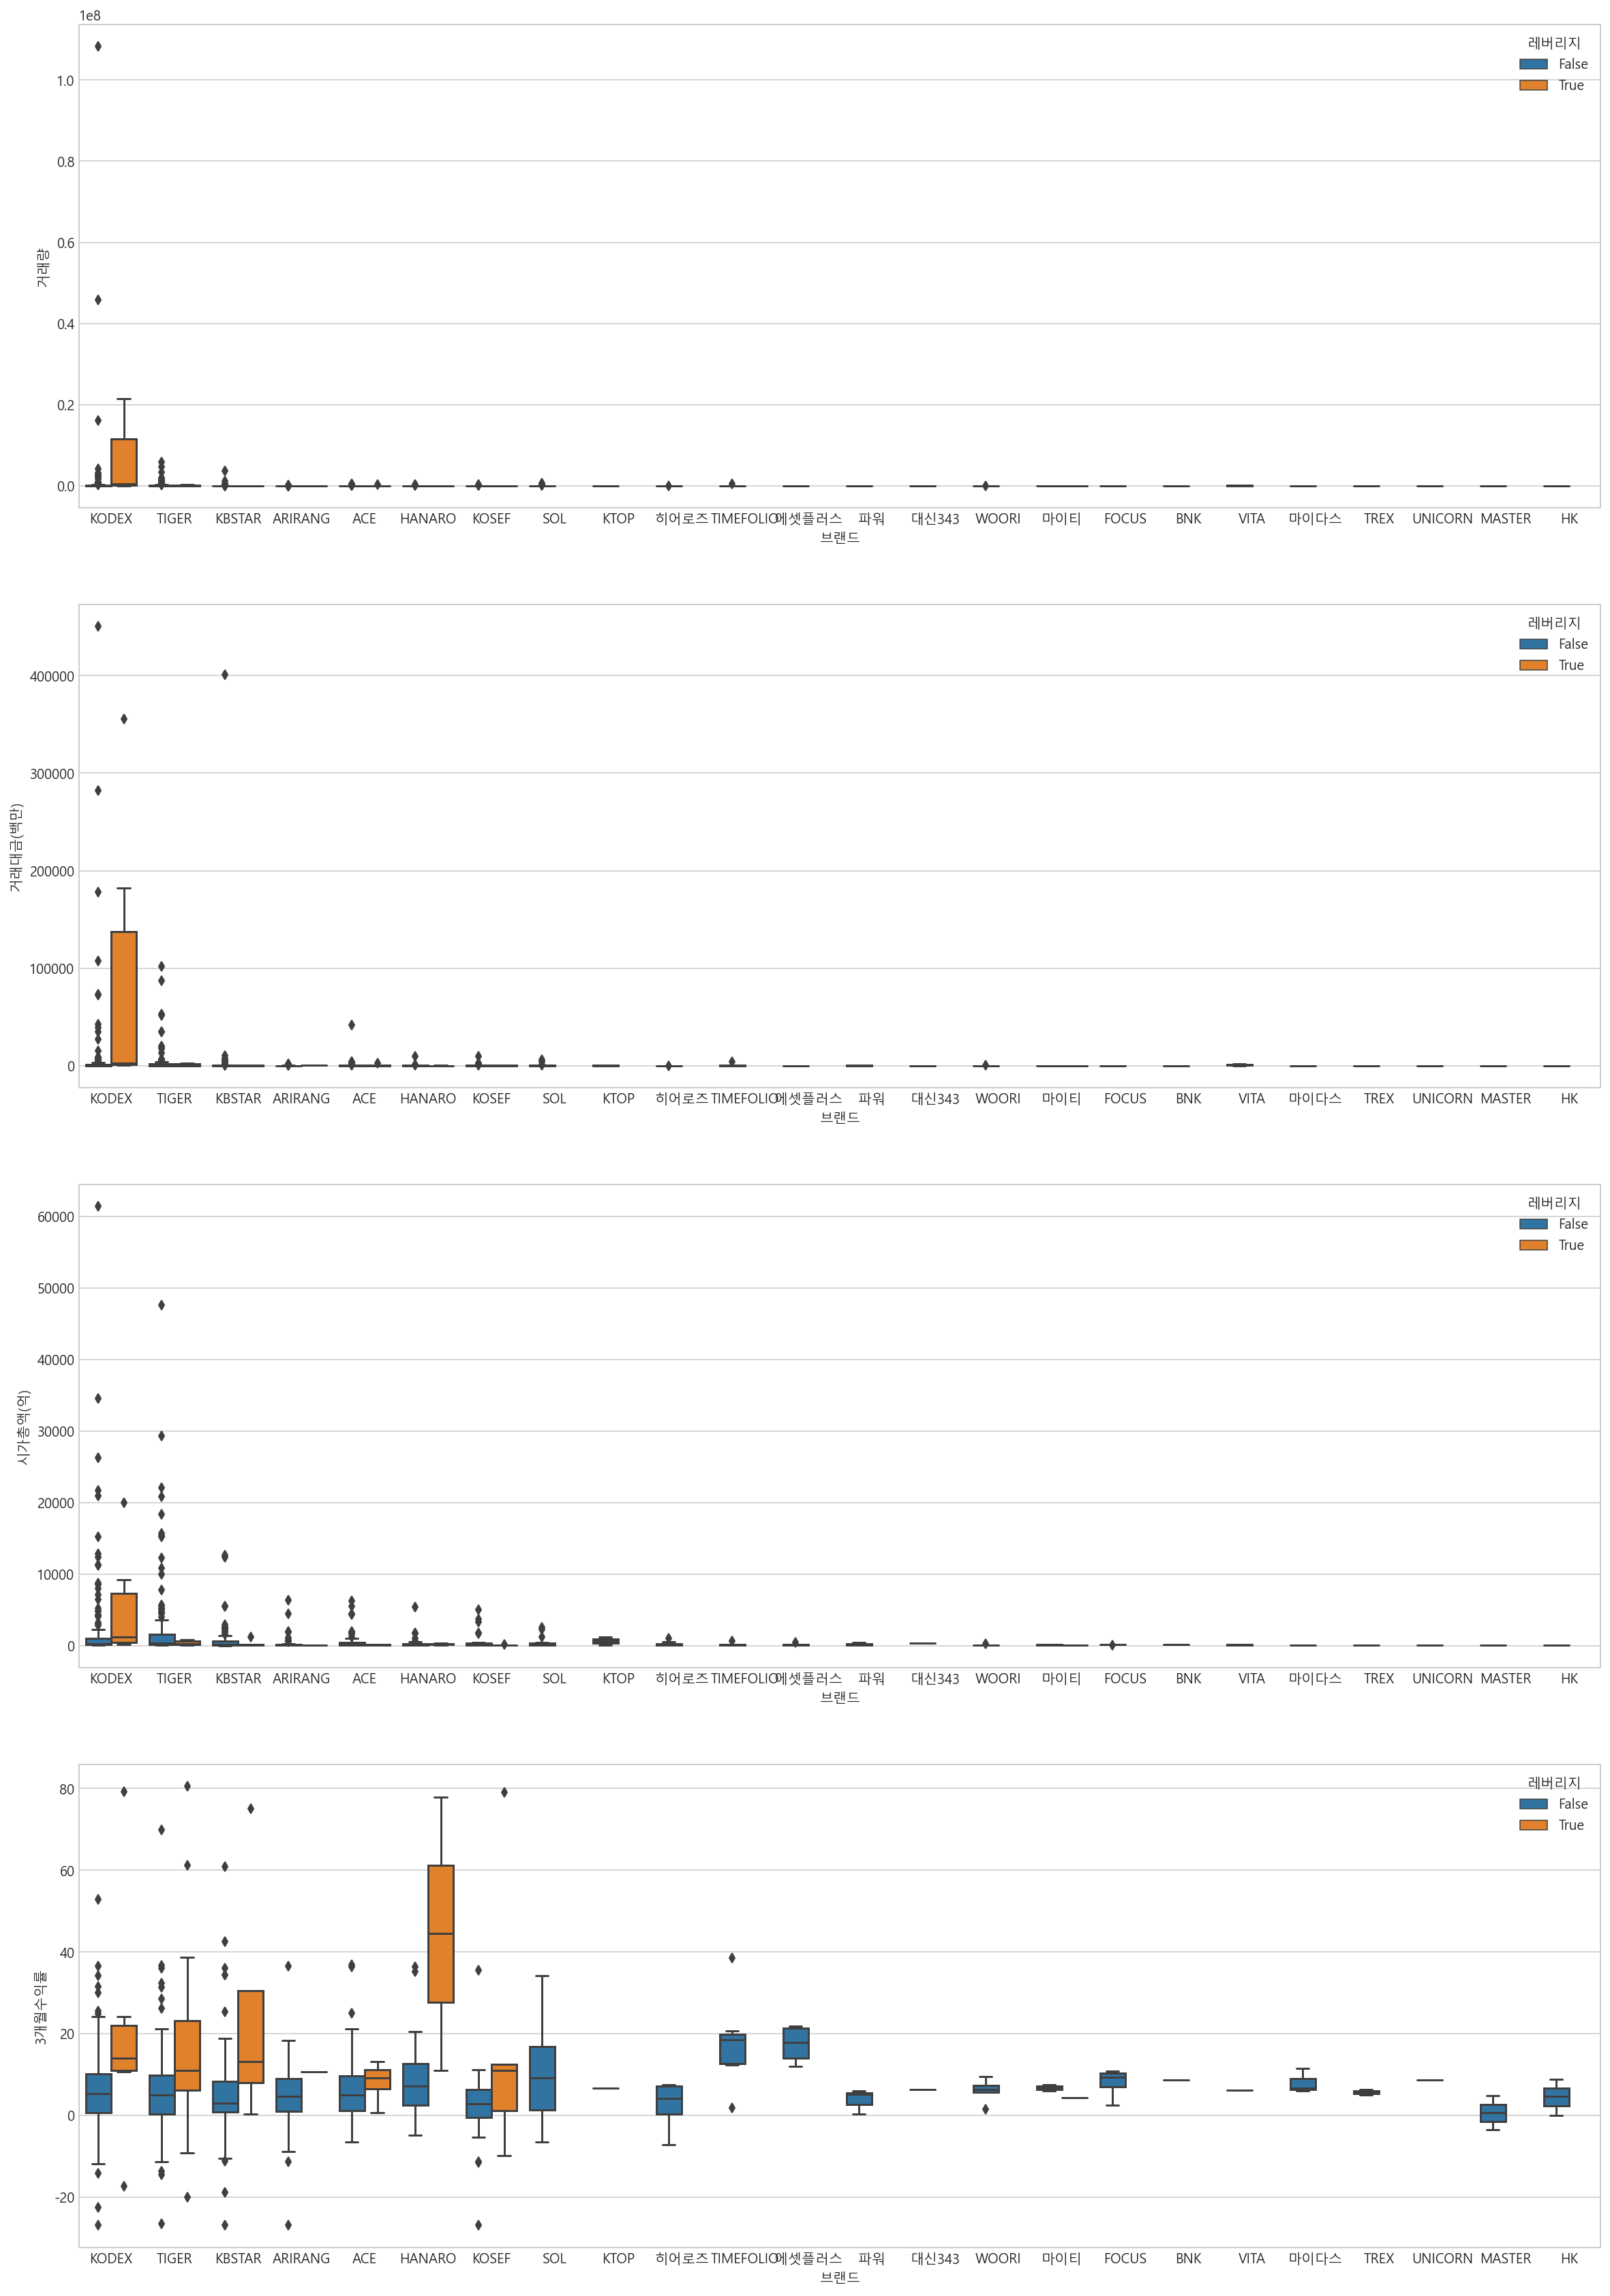

In [91]:
# 브랜드에 따른 여러 수치변수의 boxplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows=len(row_cols), figsize = (20,30))
for i, rcol in enumerate(row_cols):
    sns.boxplot(data= df, x="브랜드", y=rcol, ax = axes[i], hue="레버리지")
    

### subplots 로 브랜드에 대한 violinplot 그리기

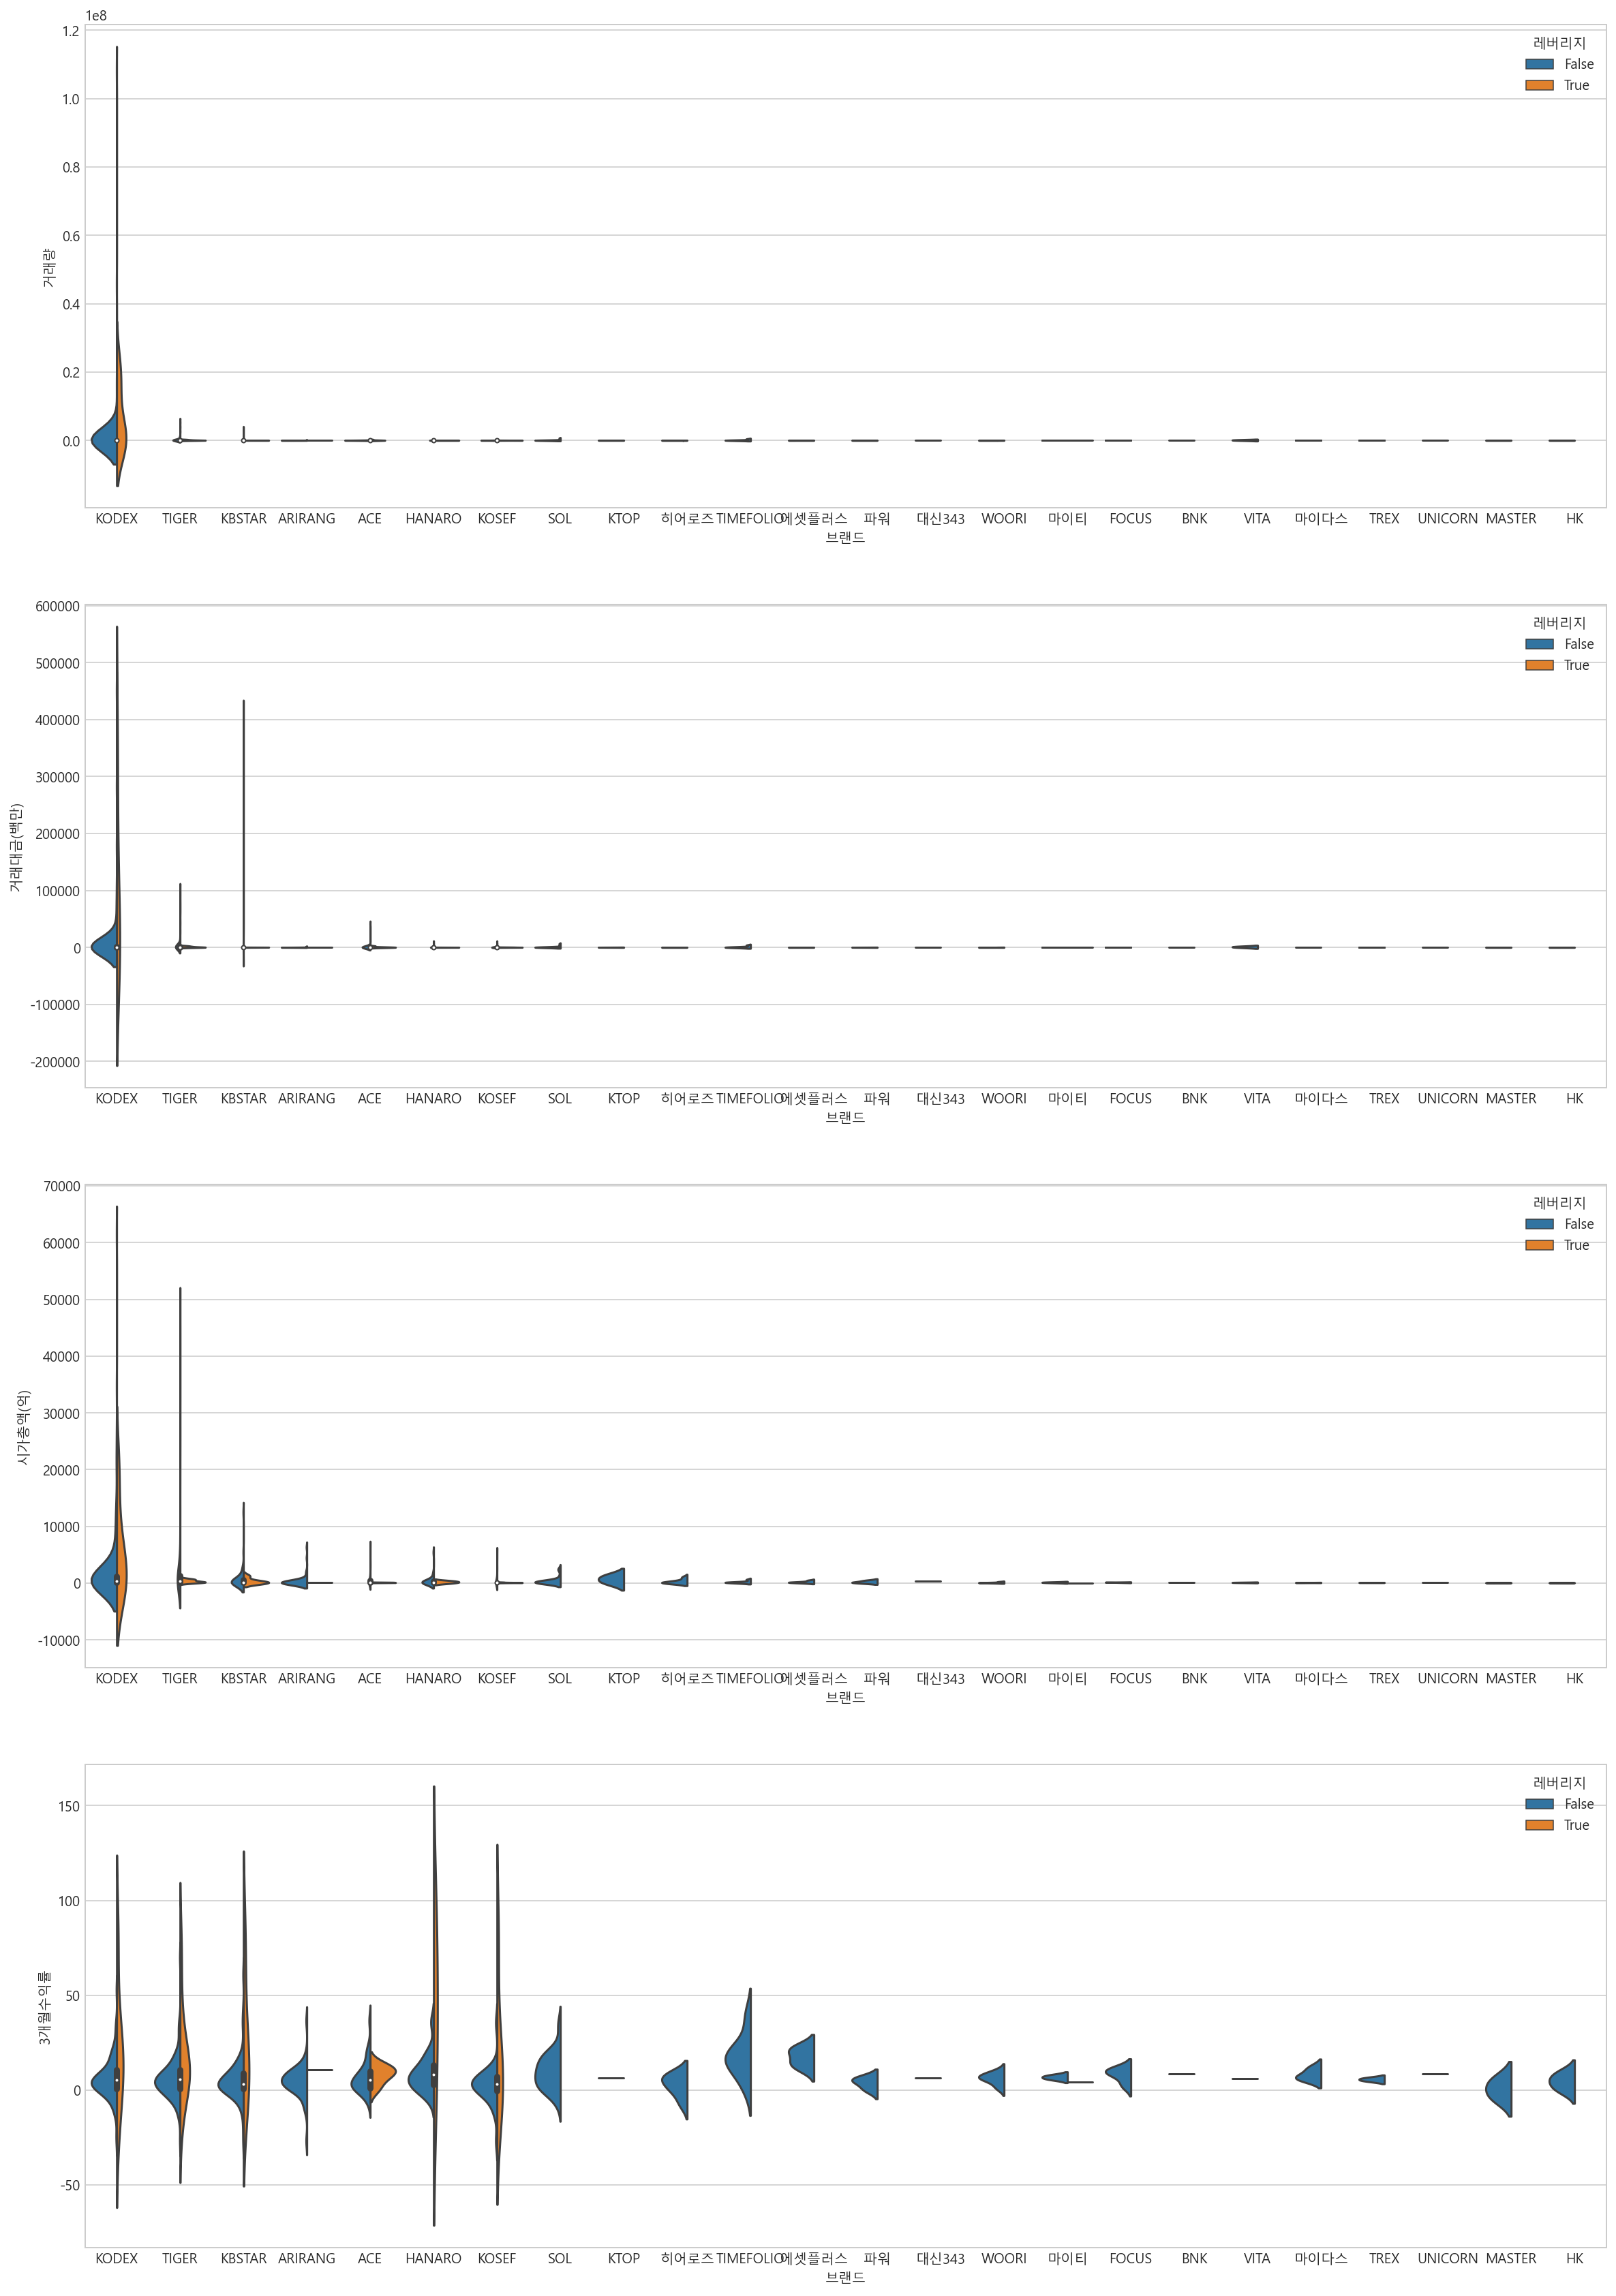

In [92]:
# 브랜드에 따른 여러 수치변수의 violinplot 을 subplots으로 그리기 : hue="레버리지"
fig, axes = plt.subplots(nrows=len(row_cols), figsize = (20,30))
for i, rcol in enumerate(row_cols):
    sns.violinplot(data= df, x="브랜드", y=rcol, ax = axes[i], hue="레버리지",
                  split=True)


## FacetGrid 를 통한 범주형 변수에 대한 서브플롯 그리기

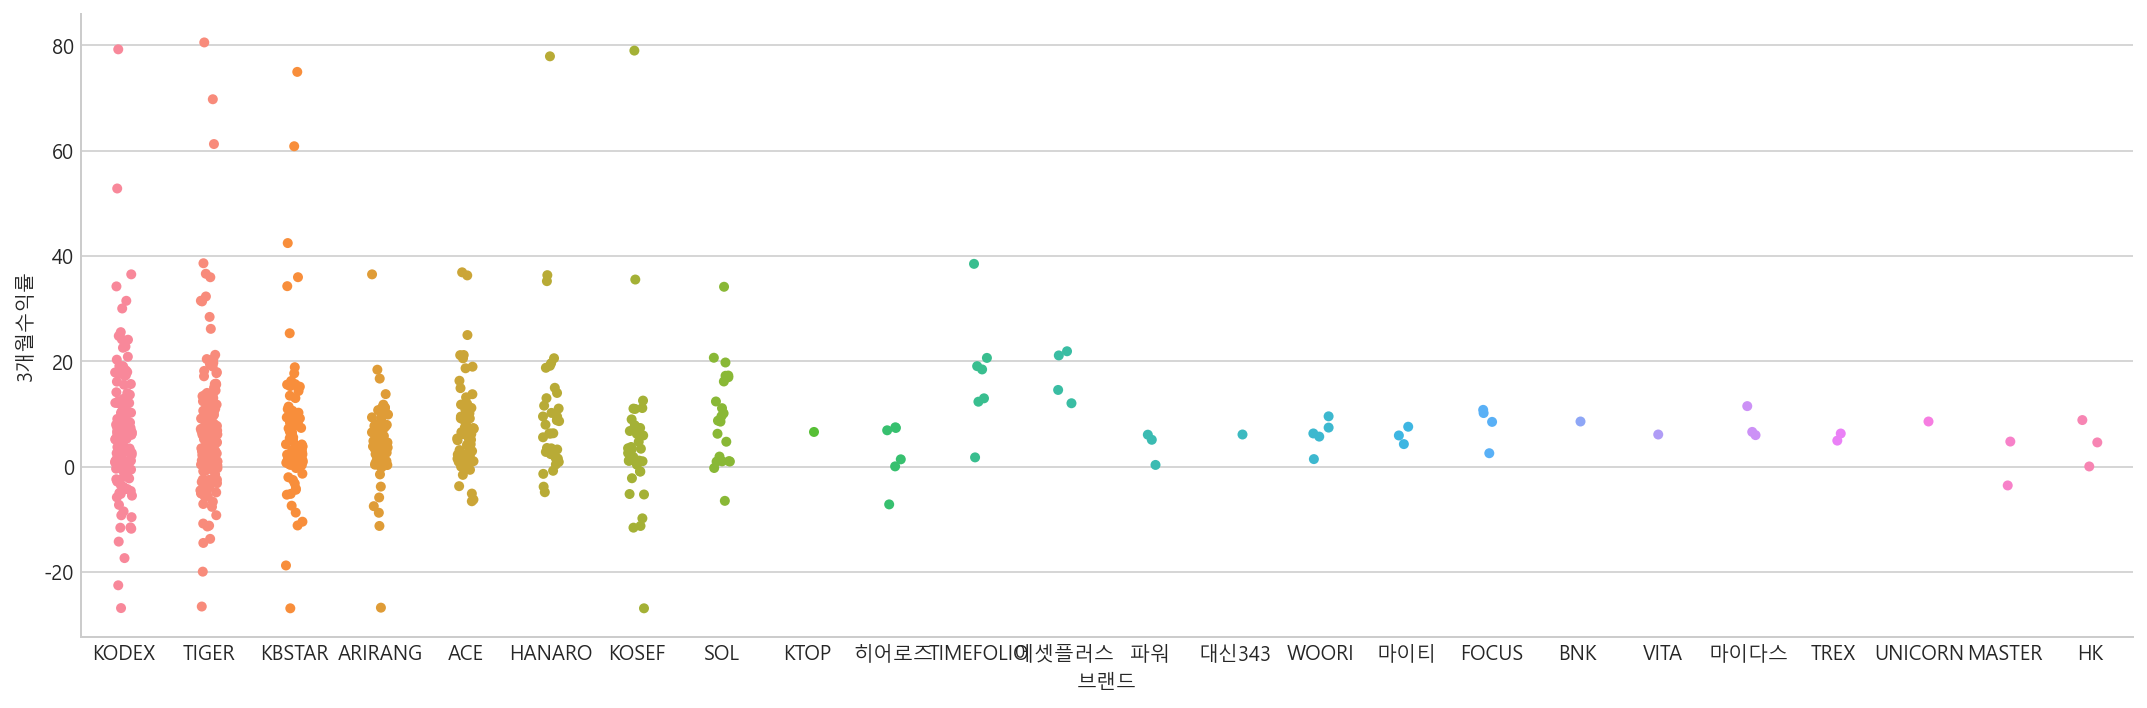

In [93]:
# catplot 을 통한 브랜드별 3개월 수익률
sns.catplot(data=df, x="브랜드", y="3개월수익률", aspect=3)

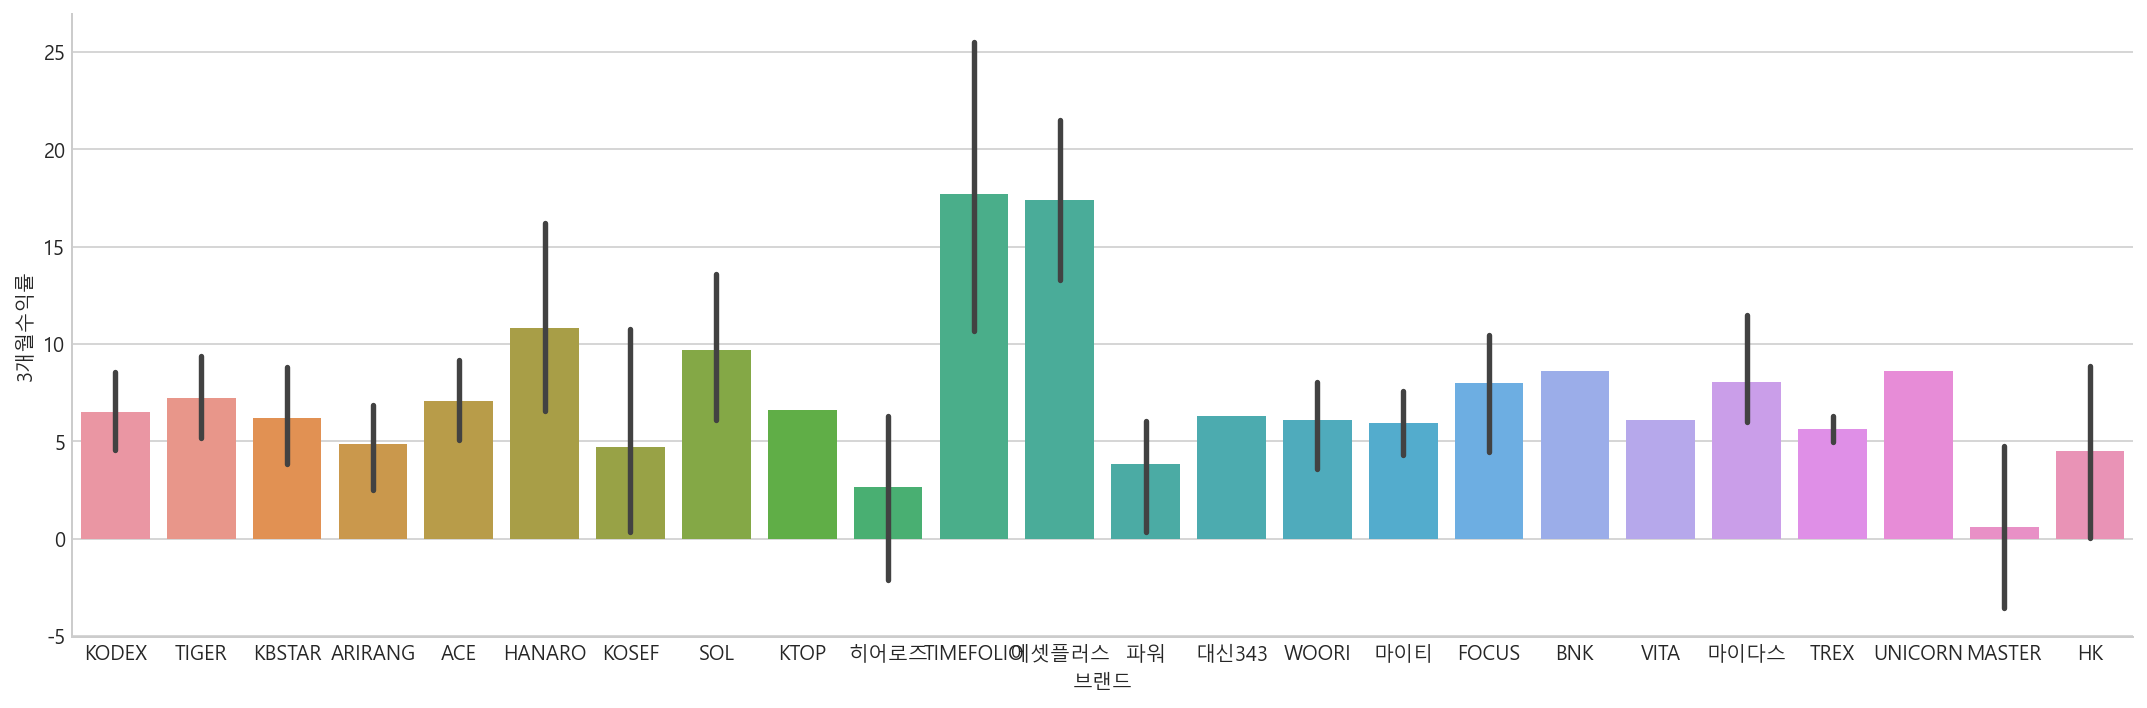

In [94]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="bar"
sns.catplot(data=df, x="브랜드", y="3개월수익률",kind="bar",aspect=3)

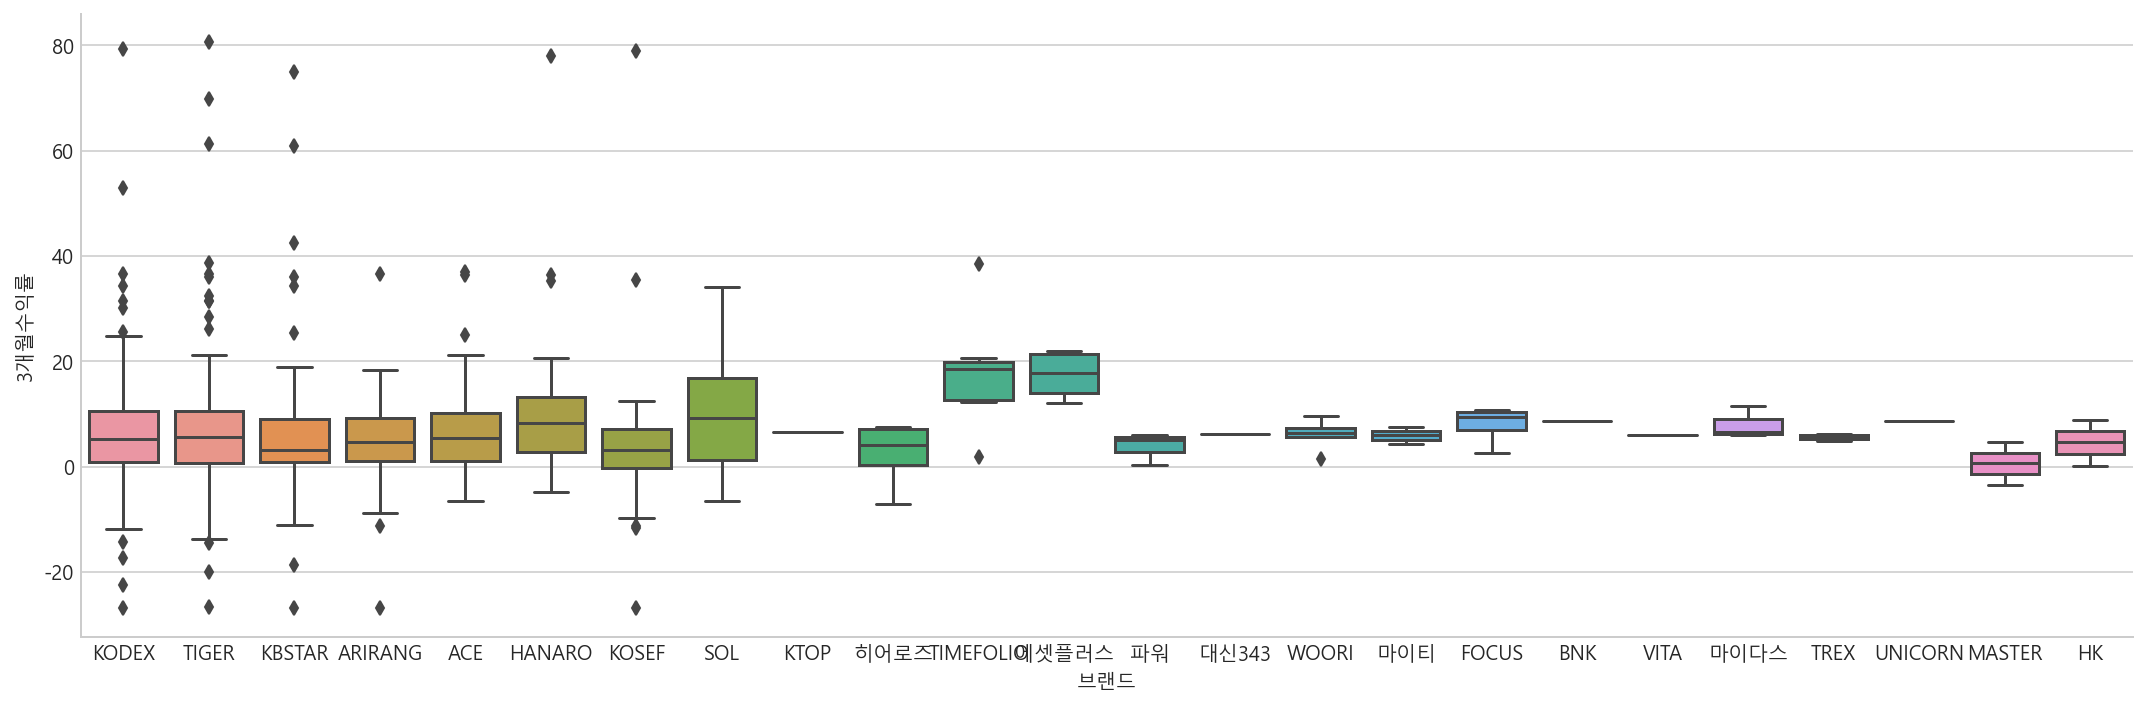

In [95]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="box"
sns.catplot(data=df, x="브랜드", y="3개월수익률",kind="box",aspect=3)

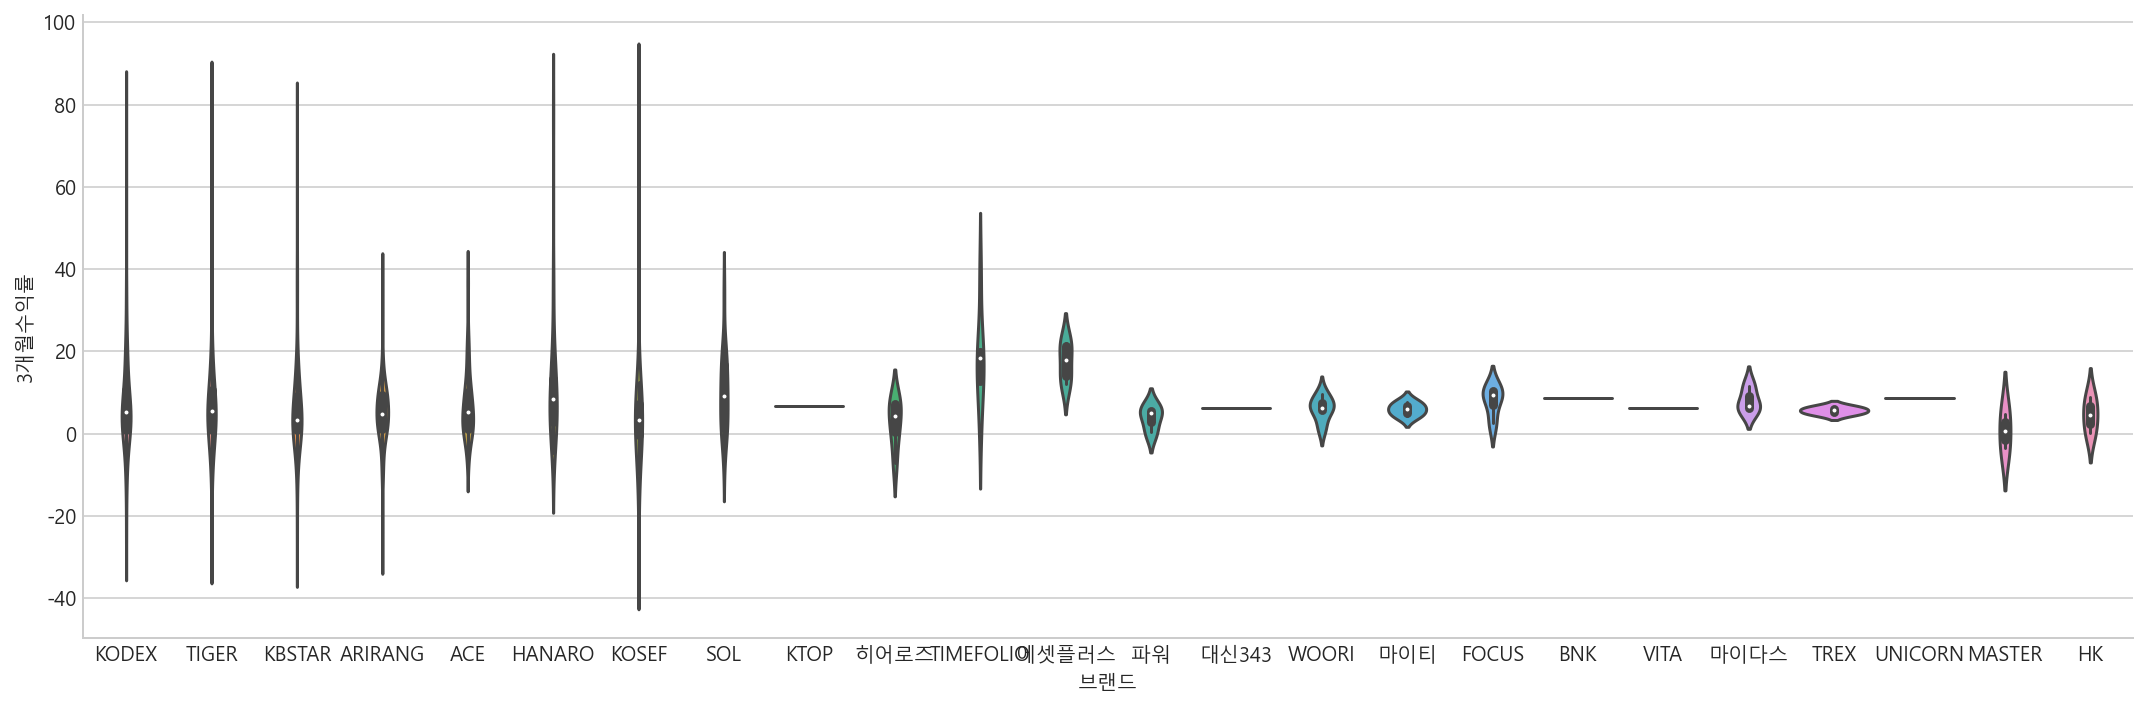

In [96]:
# catplot 을 통한 브랜드별 3개월 수익률 : kind="violin"
sns.catplot(data=df, x="브랜드", y="3개월수익률",kind="violin",aspect=3)

### 특정 범주형 변수에 대한 서브플롯 그리기 - catplot
#### 브랜드 별 빈도수 - countplot

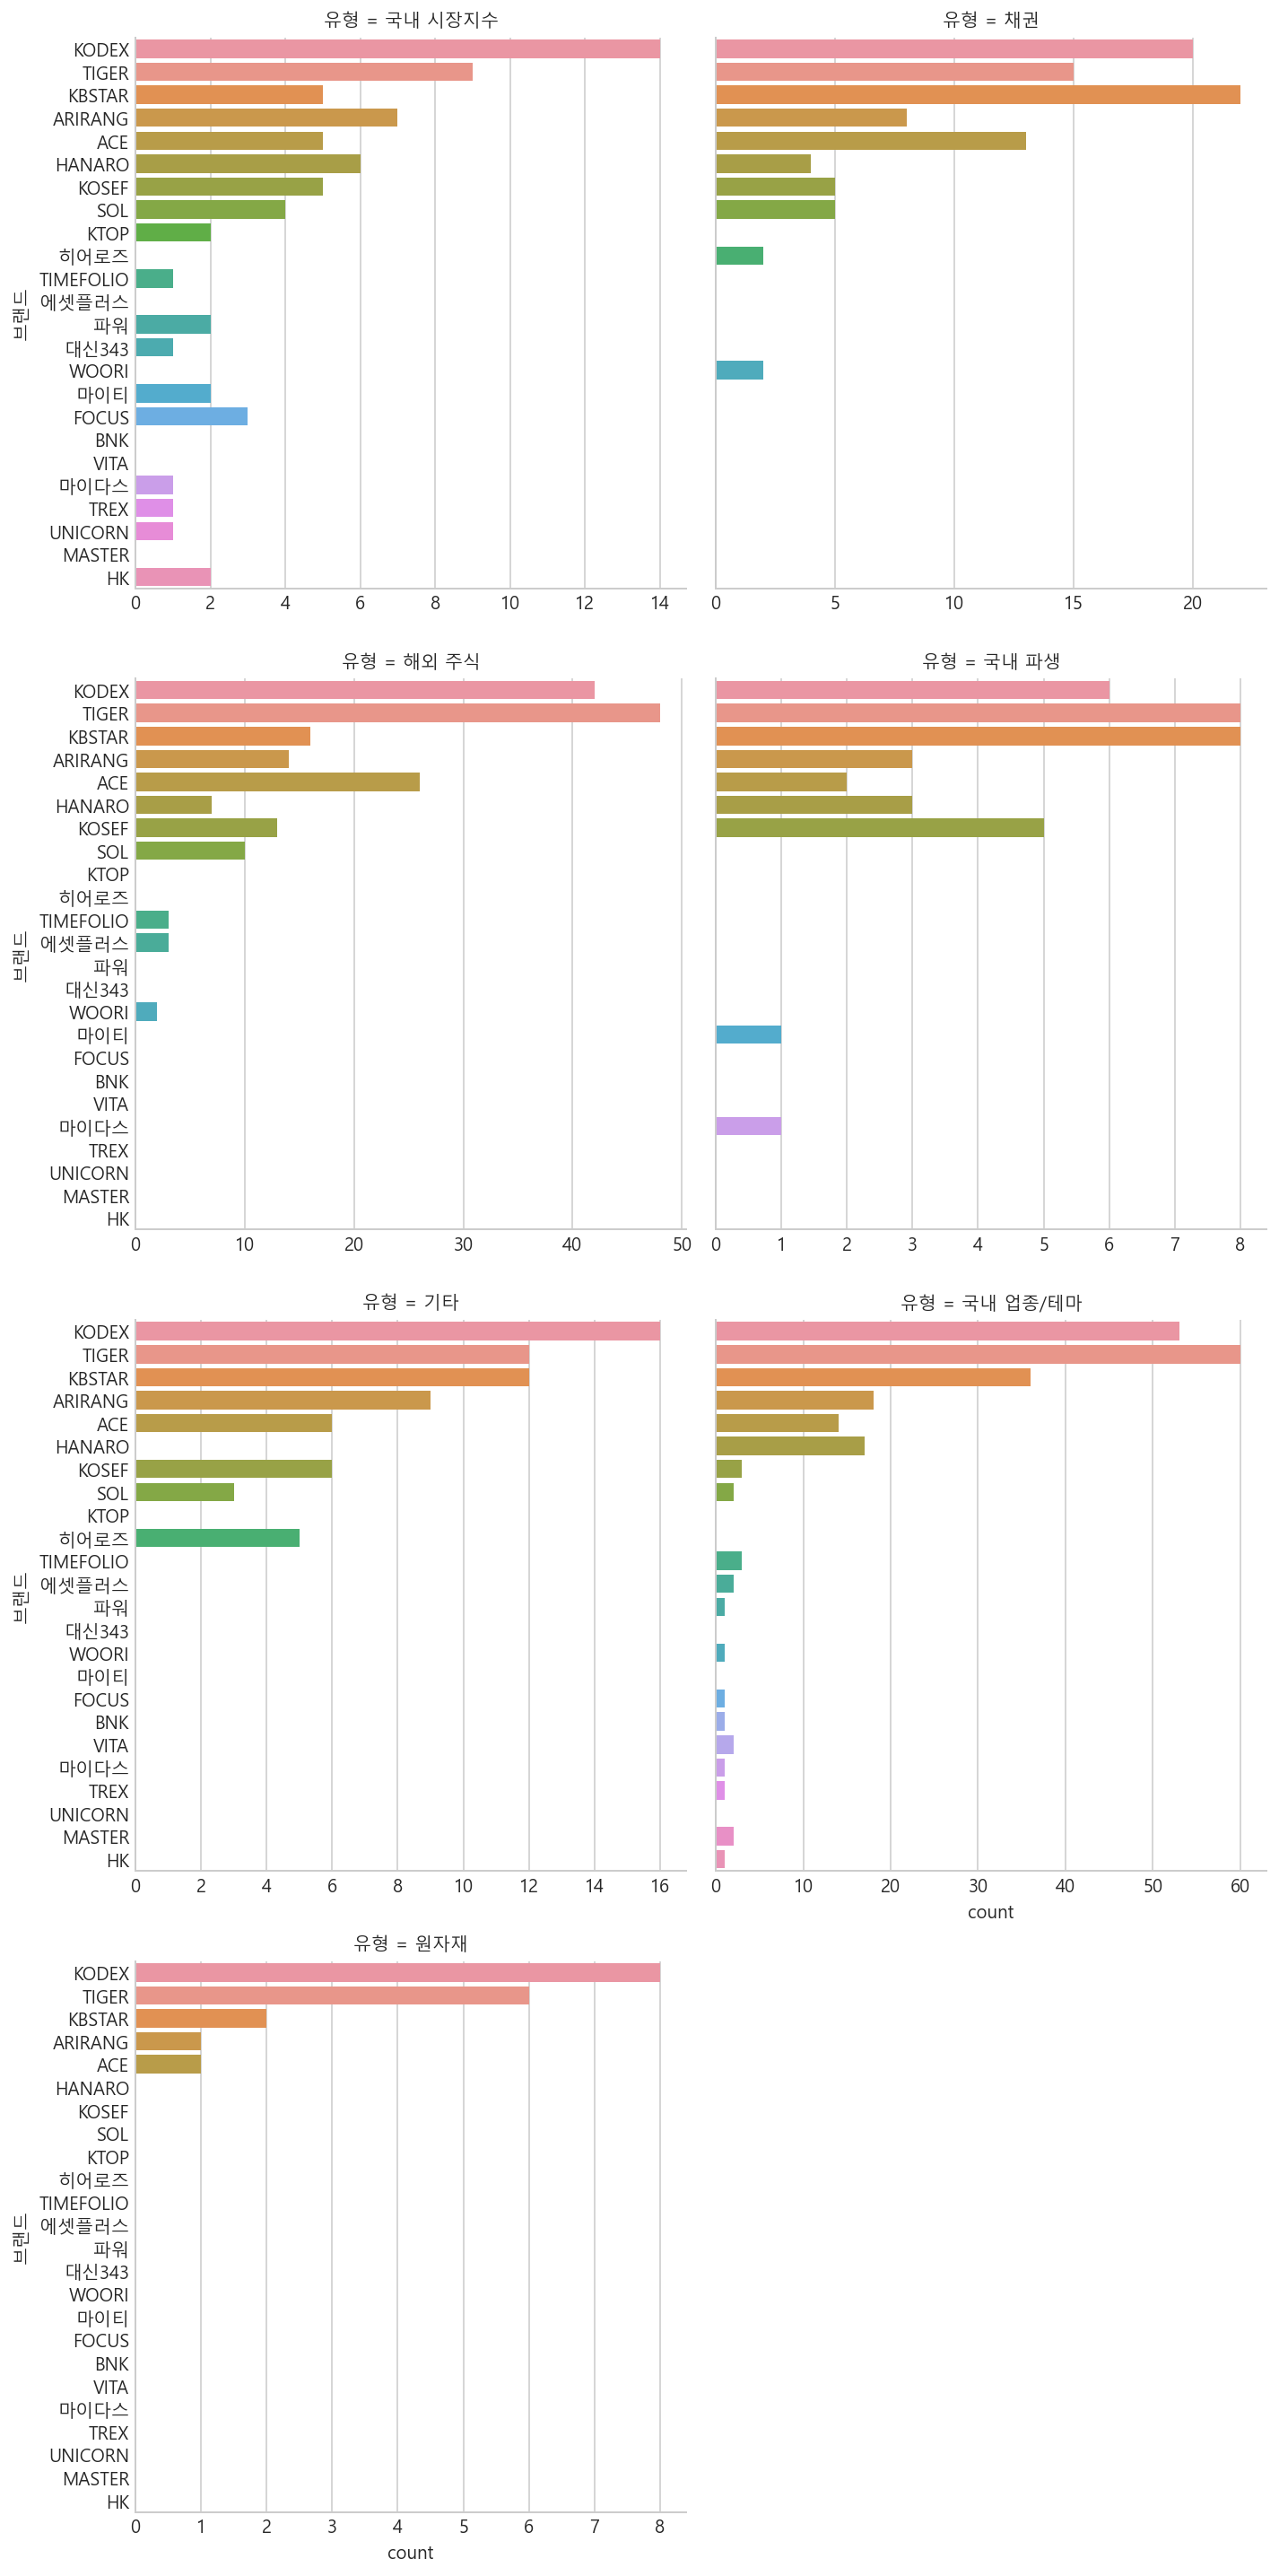

In [97]:
sns.catplot(data=df, y="브랜드", kind="count", sharex=False,
           col="유형", col_wrap=2)

#### 브랜드별 3개월 수익률 - barplot

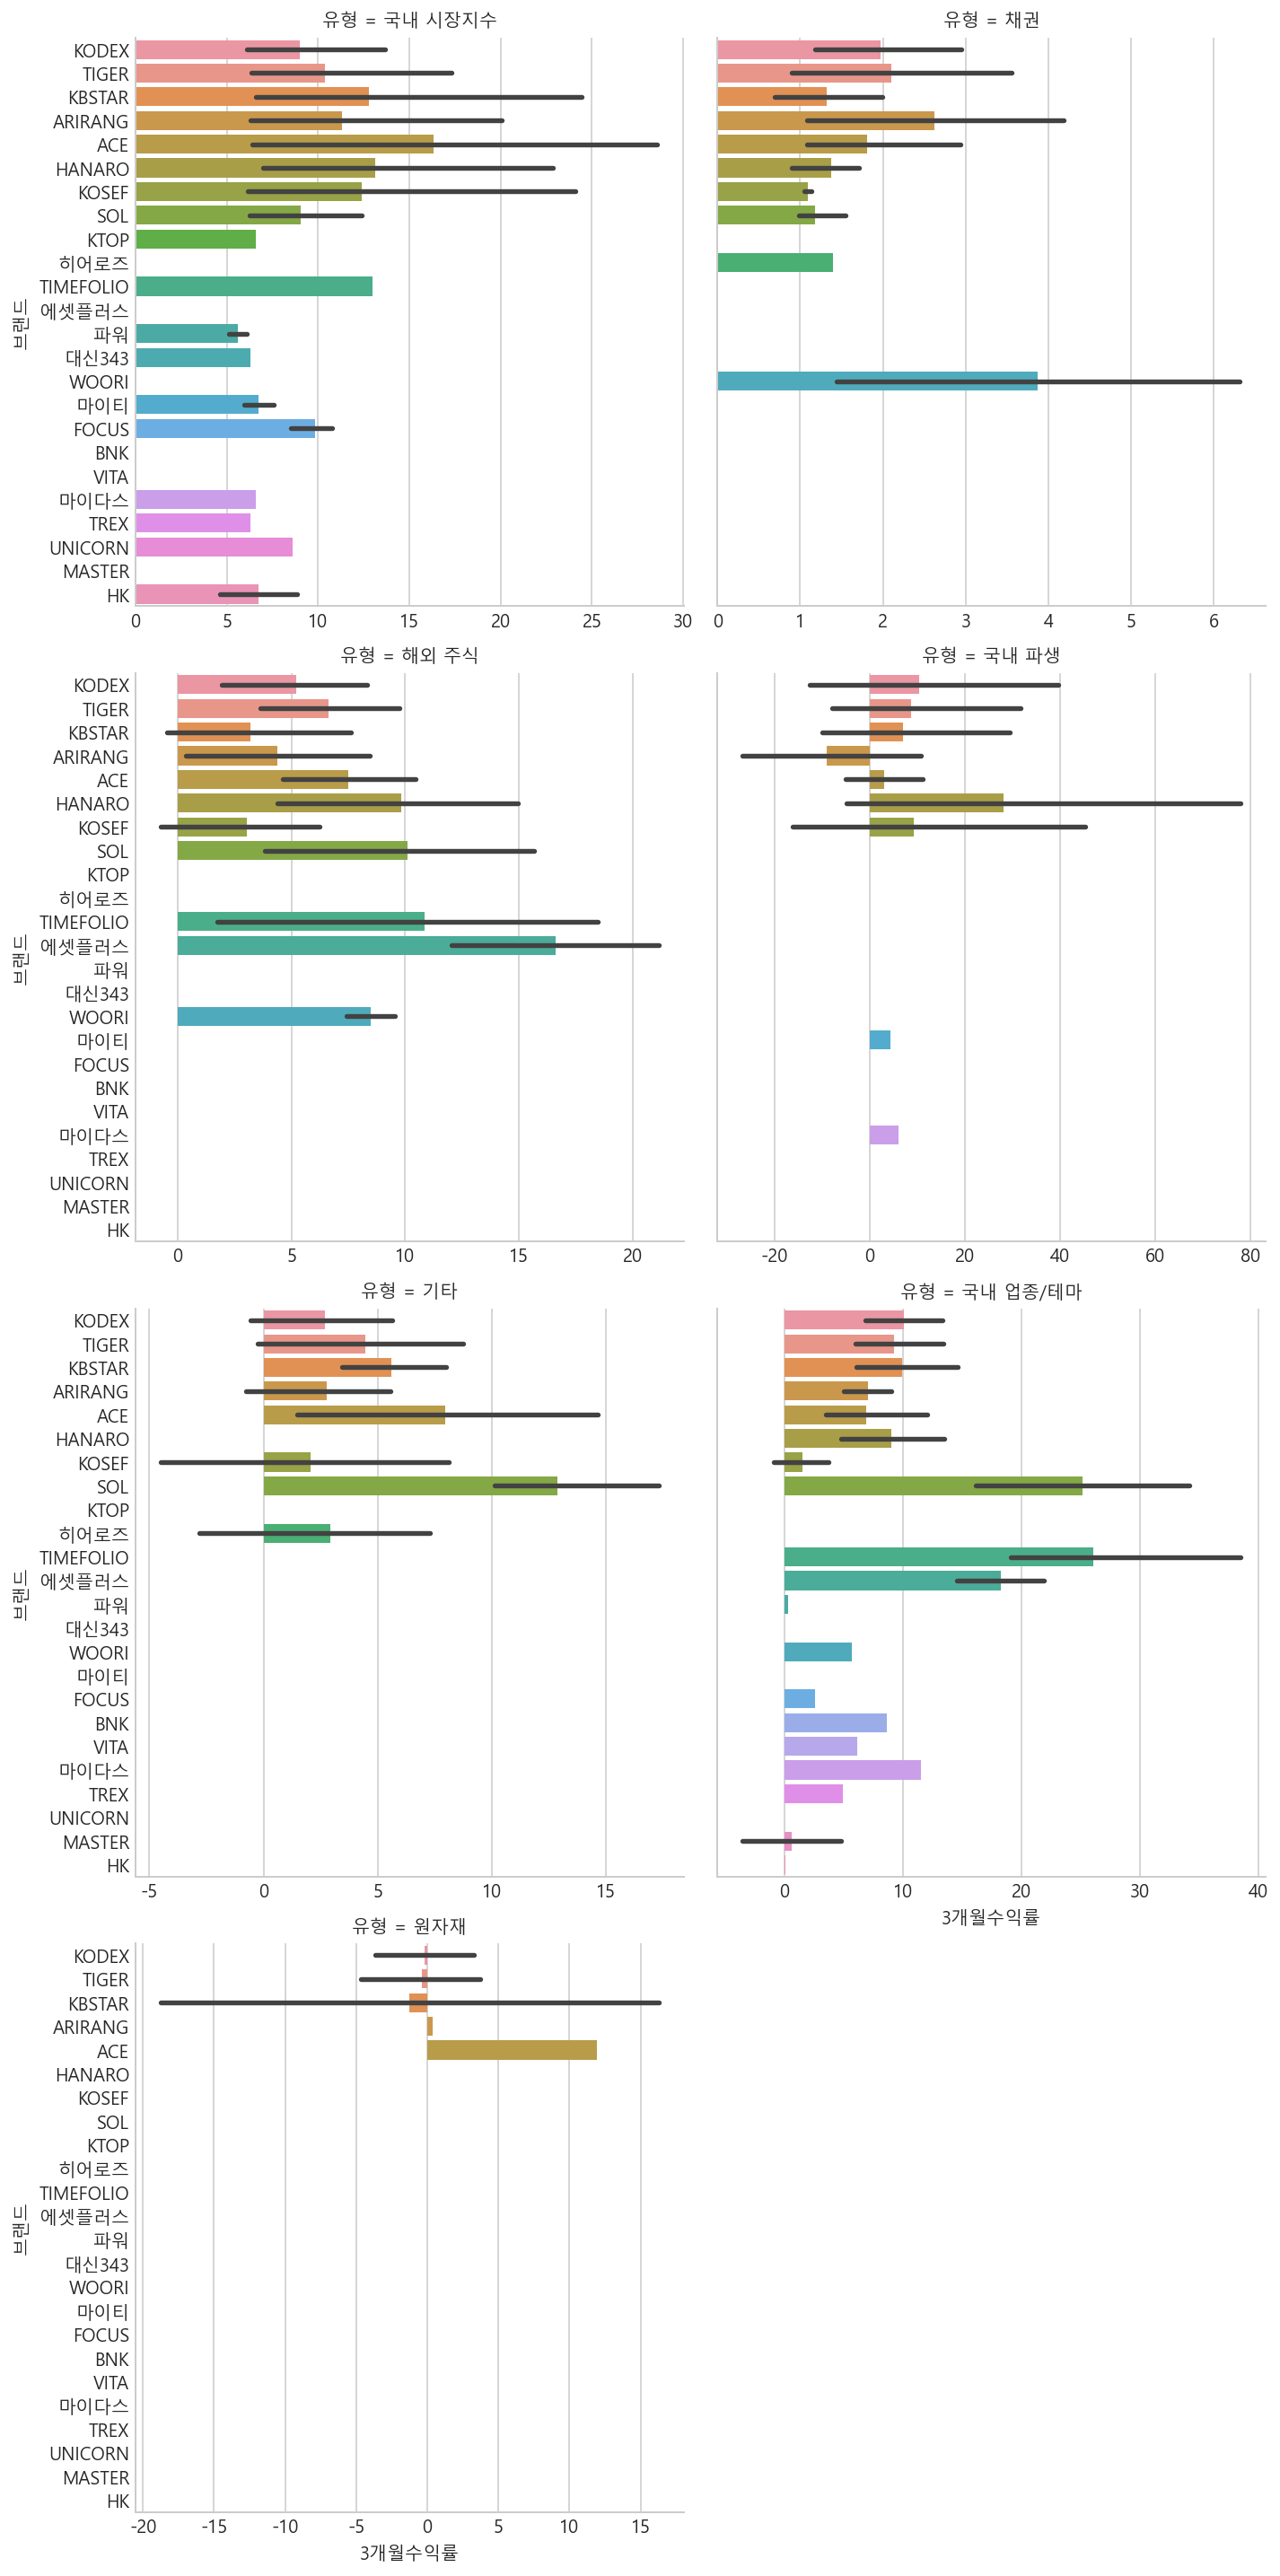

In [98]:
sns.catplot(data=df, y="브랜드",x="3개월수익률", kind="bar", sharex=False,
           col="유형", col_wrap=2)

#### 브랜드별 거래량 - barplot

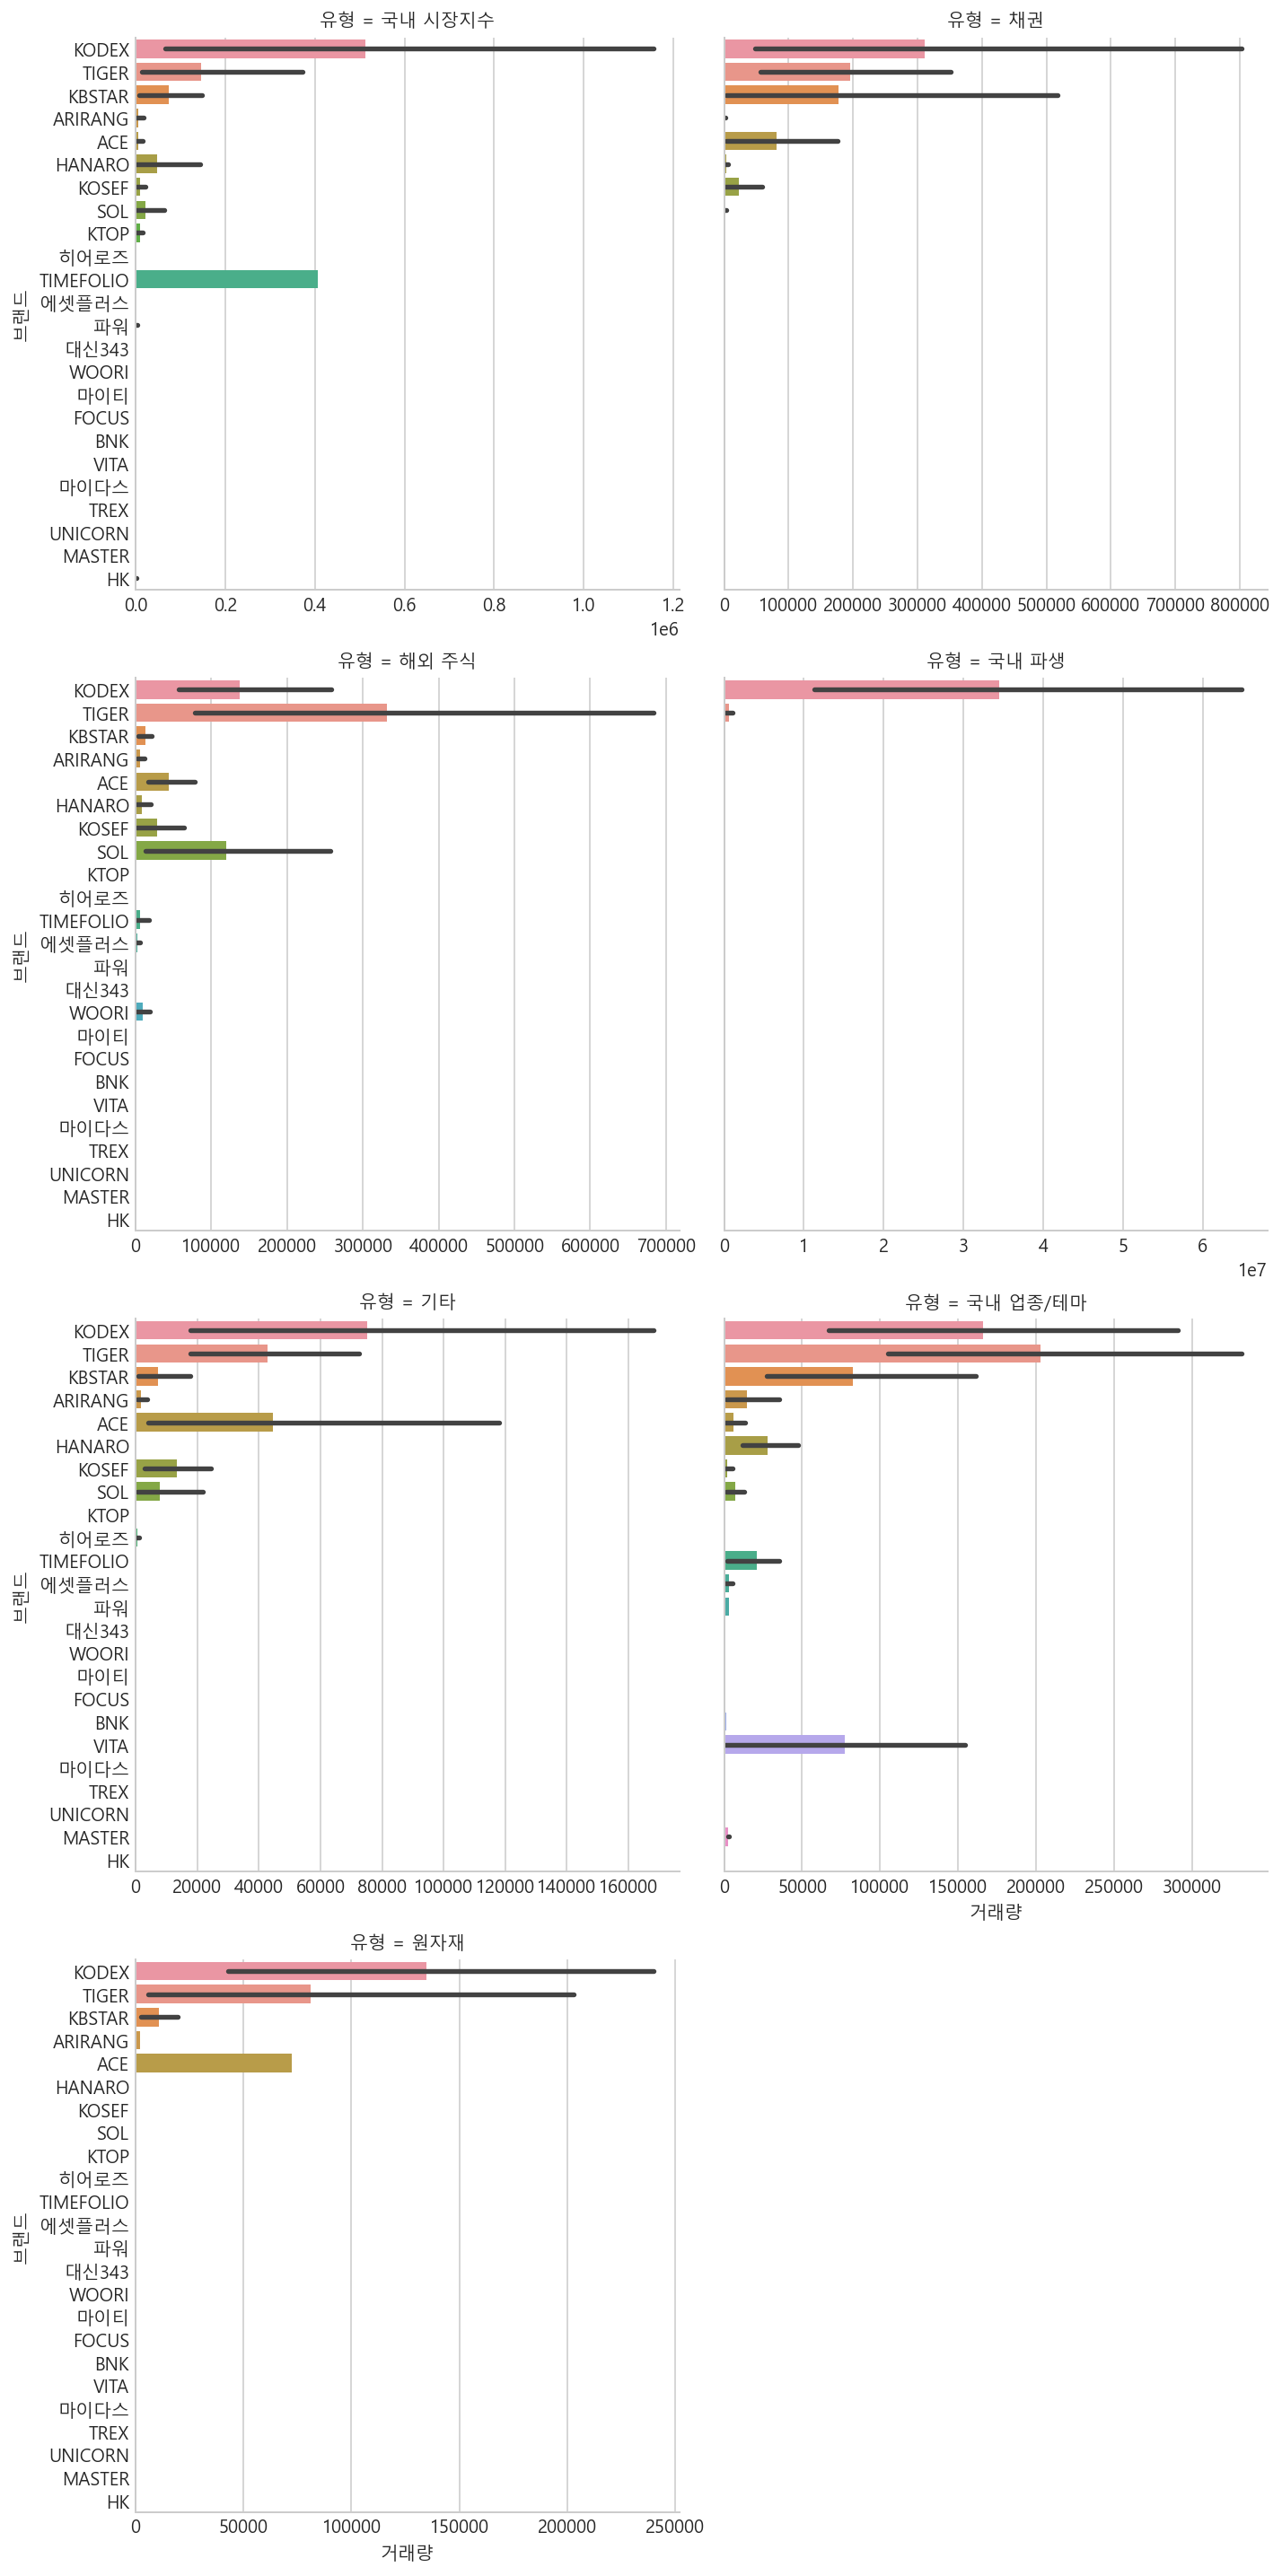

In [99]:
sns.catplot(data=df, y="브랜드",x="거래량", kind="bar", sharex=False,
           col="유형", col_wrap=2)

## 해외 주식 ETF

In [100]:
# 유형이 "해외 주식"인 ETF만 가져옵니다.
oversea = df[df["유형"] == "해외 주식"]

<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

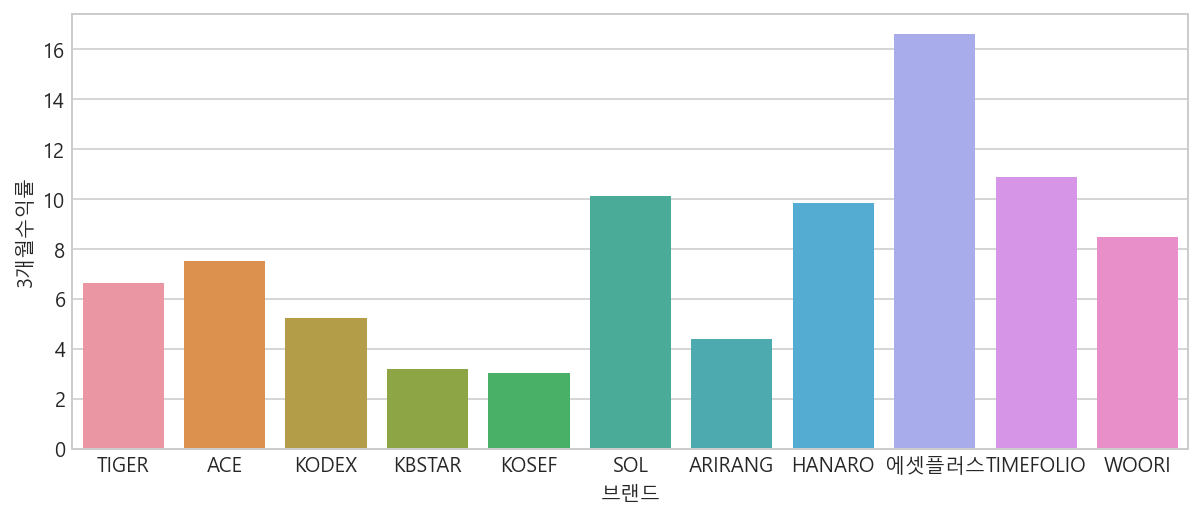

In [101]:
# "해외 주식"ETF의 브랜드별 "3개월수익률"을 시각화 합니다.
plt.figure(figsize=(10,4))
sns.barplot(data=oversea, x="브랜드", y="3개월수익률", ci=None)

<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

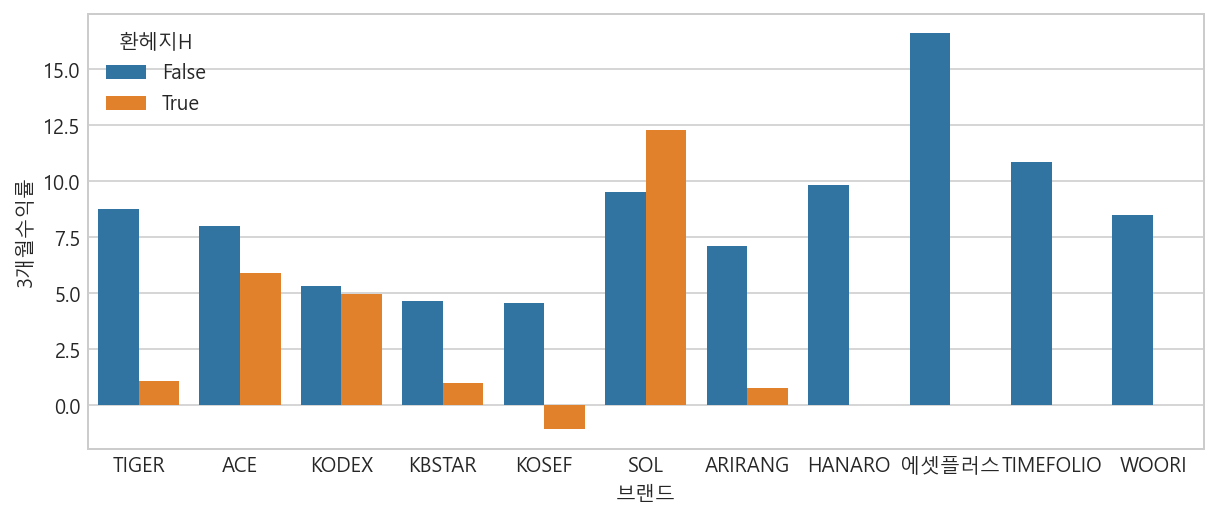

In [102]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 hue="환헤지H"로 시각화 합니다.
plt.figure(figsize=(10,4))
sns.barplot(data=oversea, x="브랜드", y="3개월수익률", ci=None,
           hue="환헤지H")

<AxesSubplot:xlabel='브랜드', ylabel='3개월수익률'>

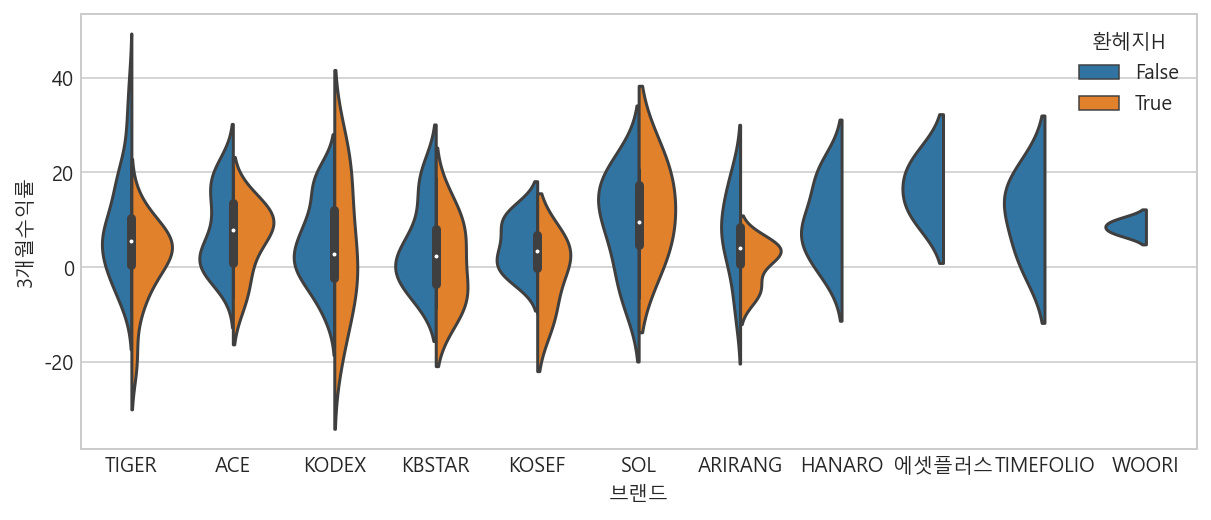

In [103]:
# "해외 주식"ETF의 브랜드별 평균 "3개월수익률"을 violinplot으로 시각화 합니다.
plt.figure(figsize=(10,4))
sns.violinplot(data=oversea, x="브랜드", y="3개월수익률", ci=None,
           hue="환헤지H", split=True)

C:\Users\Vector\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


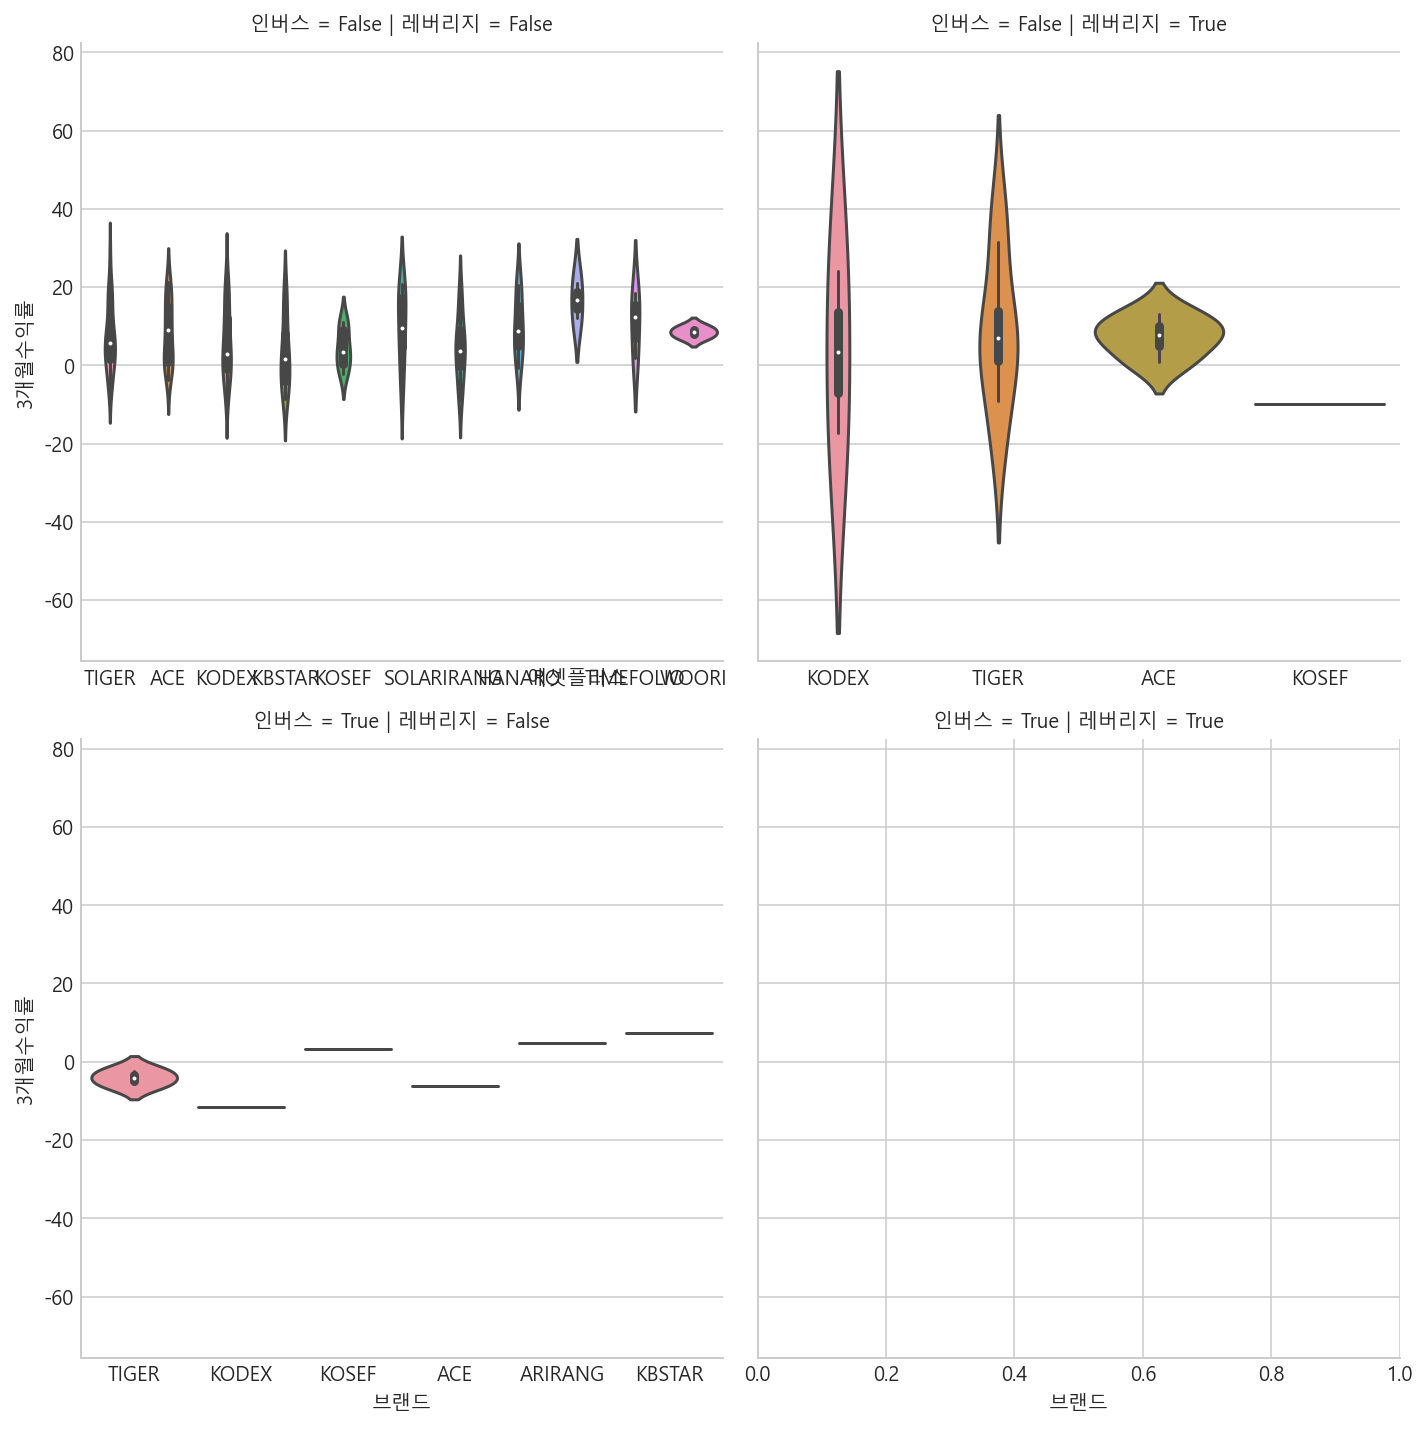

In [104]:
# 위에서 그린 그래프를 catplot을 통해 그리며  col="레버리지", row="인버스"로 시각화 합니다.
sns.catplot(data=oversea, x="브랜드", y="3개월수익률", kind="violin", 
           sharex=False, col="레버리지", row="인버스")


## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [106]:
# 전체 데이터프레임에 대한 상관계수를 구합니다.
corr = df.corr()

In [109]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 만듬

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

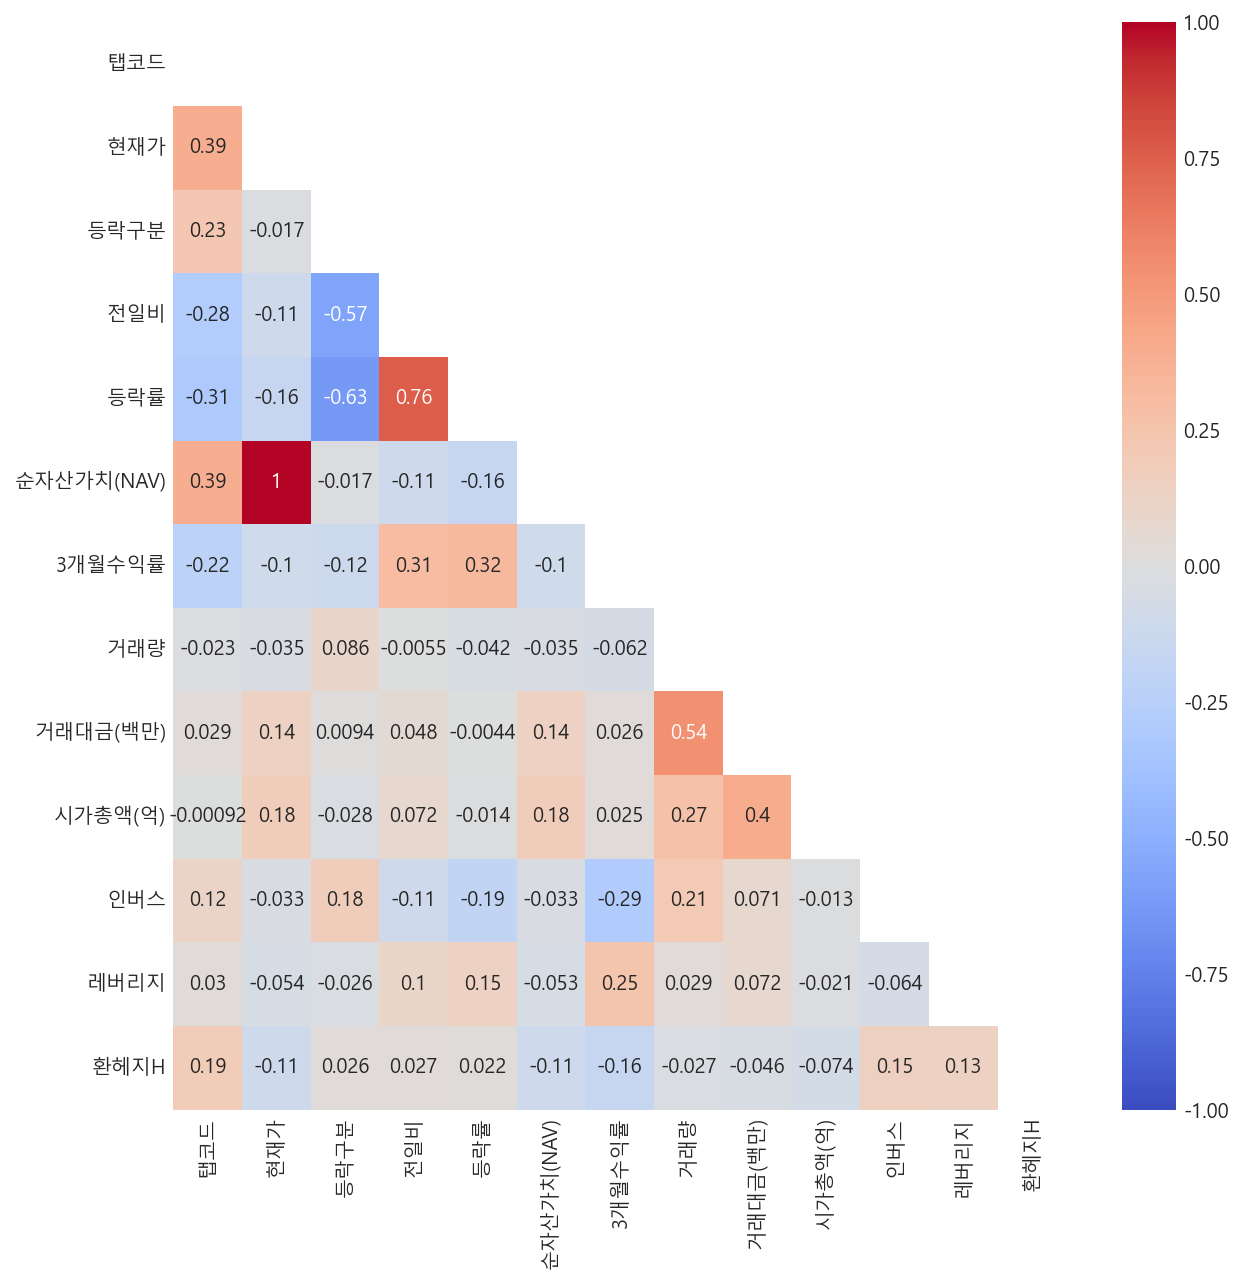

In [111]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm", vmax=1, vmin = -1,
            mask=mask, annot=True)

### 양 혹은 음의 상관 계수가 높은 변수끼리의 regplot 그리기

<AxesSubplot:xlabel='전일비', ylabel='등락률'>

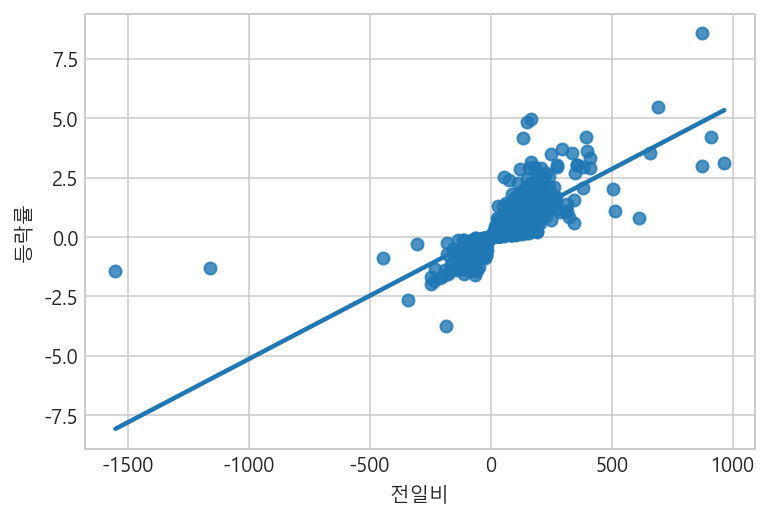

In [113]:
# regplot을 통해 양의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="전일비", y="등락률", ci=None)

<AxesSubplot:xlabel='등락률', ylabel='등락구분'>

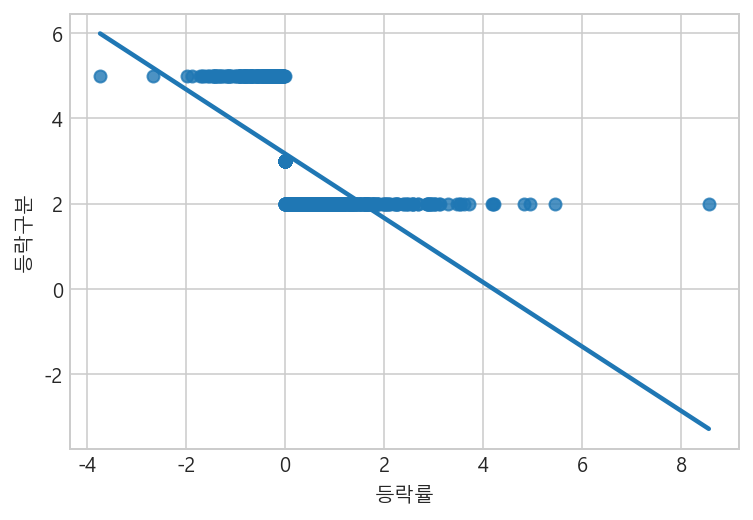

In [115]:
# regplot을 통해 음의 상관 계수가 높은 변수끼리 시각화 합니다.
sns.regplot(data=df, x="등락률", y="등락구분", ci=None)

### 종목별 상관 계수

In [120]:
# select_dtypes 를 통해 object 타입을 제외한 타입을 제외하고 가져오록 합니다.
# 종목명을 인덱스로 만들어 줍니다.
df_num = df.select_dtypes(include=np.number).copy()
df_num["종목명"] = df["종목명"]
df_num = df_num.set_index("종목명")

In [123]:
# transpose 로 행과 열을 바꿉니다.
df_t = df_num.T

In [127]:
# df_t의 데이터 타입을 float 으로 변경하고 상관 계수 구하기
etf_corr = df_t.astype(float).corr()

* "KODEX 200" 과 상관계수가 높은 ETF 상위 10개

In [130]:
# "KODEX 200" 과 상관계수가 높은 ETF 상위 10개
etf_corr["KODEX 200"].sort_values(ascending=False).head(10)

종목명
KODEX 200                1.000000
TIGER 2차전지테마             0.999882
KODEX 2차전지산업             0.999878
TIGER 미국S&P500           0.999769
TIGER 미국필라델피아반도체나스닥      0.999729
KODEX 레버리지               0.999719
TIGER 차이나전기차SOLACTIVE    0.999709
KODEX 코스닥150             0.999708
TIGER KRX2차전지K-뉴딜        0.999681
KODEX 차이나CSI300          0.999675
Name: KODEX 200, dtype: float64

* "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개

In [133]:
# "KODEX 200" 과 상관계수가 낮은 ETF 하위 10개
etf_corr["KODEX 200"].sort_values().head(10)

종목명
TIGER 종합채권(AA-이상)액티브     -0.186754
HANARO KOFR금리액티브(합성)     -0.186676
히어로즈 종합채권(AA-이상)액티브      -0.186624
SOL 코스닥150               -0.181898
ARIRANG KOFR금리           -0.180602
ARIRANG 국고채30년액티브        -0.178758
HANARO MSCI Korea TR     -0.171934
KBSTAR 종합채권(A-이상)액티브     -0.171423
ARIRANG 종합채권(AA-이상)액티브   -0.166514
SOL 종합채권(AA-이상)액티브       -0.164834
Name: KODEX 200, dtype: float64

### 2X ETF의 상관계수

In [135]:
# 2X가 들어가는 ETF의 상관 계수만 가져오기
etf_corr_2x = etf_corr.filter(regex="2X").filter(regex="2X", axis=0)

In [138]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_2x = np.triu(np.ones_like(etf_corr_2x))

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

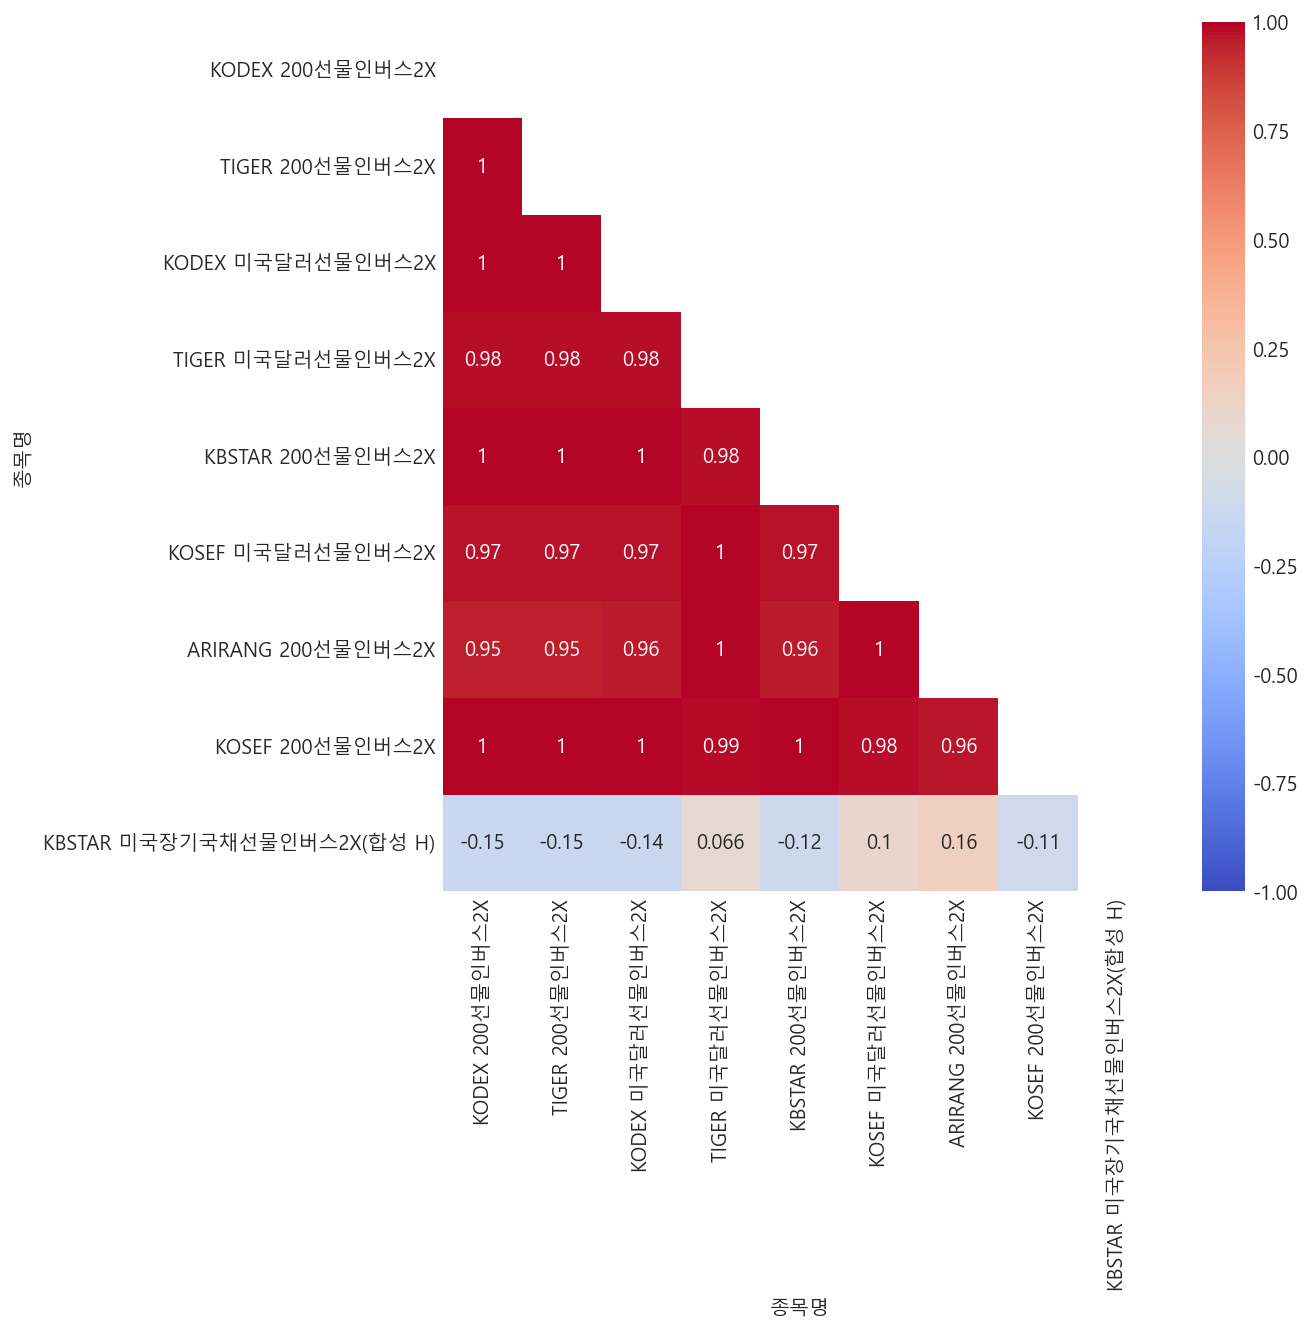

In [143]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(8,8))
sns.heatmap(etf_corr_2x,annot=True, cmap="coolwarm",
            vmax=1, vmin = -1, mask=mask_2x)

### 원유와 관련된 ETF의 상관계수 보기

In [148]:
# 원유가 들어가는 상관계수만 가져오기
etf_corr_oil = etf_corr.filter(regex="원유").filter(regex="원유", axis=0)

In [149]:
# np.ones_like로 heatmap의 마스크값 구하기
mask_oil = np.triu(np.ones_like(etf_corr_oil))

<AxesSubplot:xlabel='종목명', ylabel='종목명'>

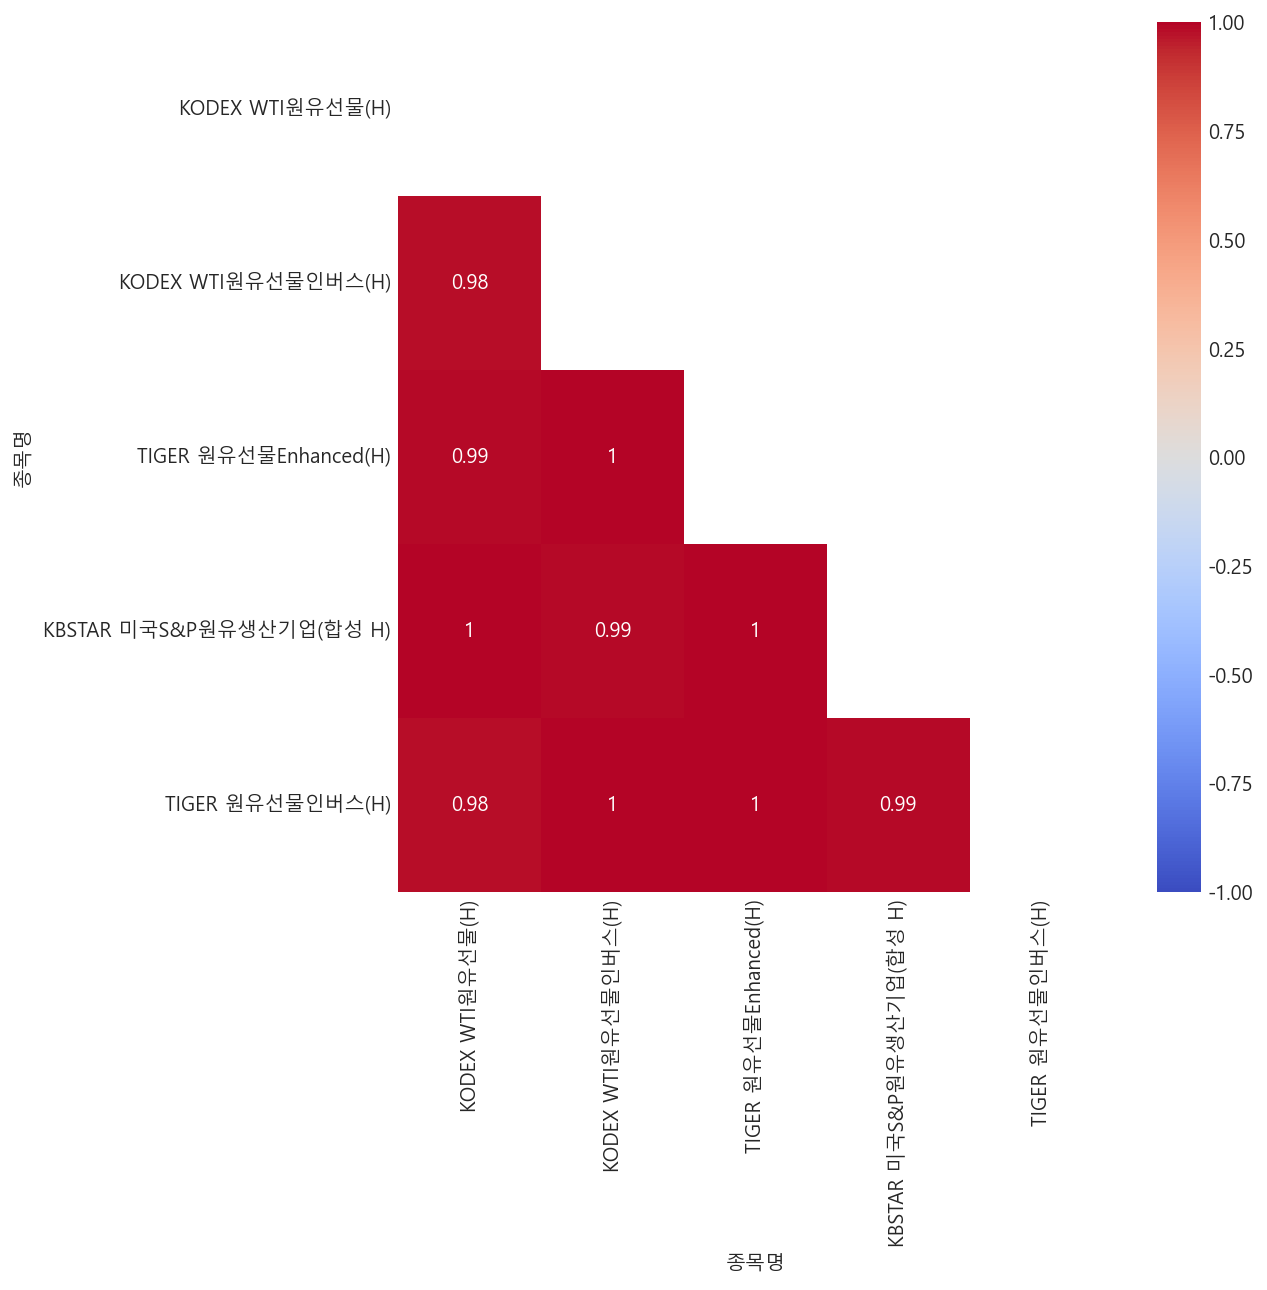

In [150]:
# seaborn 의 heatmap으로 상관 계수 시각화 하기
plt.figure(figsize=(8,8))
sns.heatmap(etf_corr_oil,annot=True, cmap="coolwarm",
            vmax=1, vmin = -1, mask=mask_oil)